#Importing Libraries

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd

#List of NSE 482 Stock Symbols

In [2]:
nse_companies = ['360ONE.NS', '3MINDIA.NS', 'ABB.NS', 'ACC.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AADHARHFC.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABBOTINDIA.NS', 'ACE.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ATGL.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABREL.NS', 'ABSLAMC.NS', 'AEGISLOG.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'APLLTD.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALOKINDS.NS', 'AMBER.NS', 'AMBUJACEM.NS', 'ANANTRAJ.NS', 'ANGELONE.NS', 'APARINDS.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'APTUS.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ASTRAL.NS', 'ATUL.NS', 'AUROPHARMA.NS', 'AVANTIFEED.NS', 'DMART.NS', 'AXISBANK.NS', 'BASF.NS', 'BEML.NS', 'BLS.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALAMINES.NS', 'BALKRISIND.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BERGEPAINT.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BHARTIHEXA.NS', 'BIOCON.NS', 'BIRLACORPN.NS', 'BSOFT.NS', 'BLUEDART.NS', 'BLUESTARCO.NS', 'BBTC.NS', 'BOSCHLTD.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'CCL.NS', 'CESC.NS', 'CGPOWER.NS', 'CIEINDIA.NS', 'CRISIL.NS', 'CANFINHOME.NS', 'CANBK.NS', 'CAPLIPOINT.NS', 'CGCL.NS', 'CARBORUNIV.NS', 'CASTROLIND.NS', 'CEATLTD.NS', 'CELLO.NS', 'CENTRALBK.NS', 'CDSL.NS', 'CENTURYPLY.NS', 'CERA.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 'CHEMPLASTS.NS', 'CHENNPETRO.NS', 'CHOLAHLDNG.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'CUB.NS', 'CLEAN.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'COLPAL.NS', 'CAMS.NS', 'CONCOR.NS', 'COROMANDEL.NS', 'CRAFTSMAN.NS', 'CREDITACC.NS', 'CROMPTON.NS', 'CUMMINSIND.NS', 'CYIENT.NS', 'DLF.NS', 'DOMS.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DATAPATTNS.NS', 'DEEPAKFERT.NS', 'DEEPAKNTR.NS', 'DELHIVERY.NS', 'DEVYANI.NS', 'DIVISLAB.NS', 'DIXON.NS', 'LALPATHLAB.NS', 'DRREDDY.NS', 'EIDPARRY.NS', 'EIHOTEL.NS', 'EASEMYTRIP.NS', 'EICHERMOT.NS', 'ELECON.NS', 'ELGIEQUIP.NS', 'EMAMILTD.NS', 'ENDURANCE.NS', 'ENGINERSIN.NS', 'EQUITASBNK.NS', 'ERIS.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'NYKAA.NS', 'FEDERALBNK.NS', 'FACT.NS', 'FINEORG.NS', 'FINCABLES.NS', 'FINPIPE.NS', 'FSL.NS', 'FIVESTAR.NS', 'FORTIS.NS', 'GRINFRA.NS', 'GAIL.NS', 'GET&D.NS', 'GMRINFRA.NS', 'GRSE.NS', 'GICRE.NS', 'GILLETTE.NS', 'GLAND.NS', 'GLAXO.NS', 'GLENMARK.NS', 'MEDANTA.NS', 'GODIGIT.NS', 'GPIL.NS', 'GODFRYPHLP.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GRANULES.NS', 'GRAPHITE.NS', 'GRASIM.NS', 'GESHIP.NS', 'GRINDWELL.NS', 'GAEL.NS', 'FLUOROCHEM.NS', 'GUJGASLTD.NS', 'GMDCLTD.NS', 'GNFC.NS', 'GPPL.NS', 'GSFC.NS', 'GSPL.NS', 'HEG.NS', 'HBLPOWER.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HFCL.NS', 'HAPPSTMNDS.NS', 'HAVELLS.NS', 'HEROMOTOCO.NS', 'HSCL.NS', 'HINDALCO.NS', 'HAL.NS', 'HINDCOPPER.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'POWERINDIA.NS', 'HOMEFIRST.NS', 'HONASA.NS', 'HONAUT.NS', 'HUDCO.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'ISEC.NS', 'IDBI.NS', 'IDFCFIRSTB.NS', 'IFCI.NS', 'IIFL.NS', 'INOXINDIA.NS', 'IRB.NS', 'IRCON.NS', 'ITC.NS', 'ITI.NS', 'INDGN.NS', 'INDIACEM.NS', 'INDIAMART.NS', 'INDIANB.NS', 'IEX.NS', 'INDHOTEL.NS', 'IOC.NS', 'IOB.NS', 'IRCTC.NS', 'IRFC.NS', 'IREDA.NS', 'IGL.NS', 'INDUSTOWER.NS', 'INDUSINDBK.NS', 'NAUKRI.NS', 'INFY.NS', 'INOXWIND.NS', 'INTELLECT.NS', 'INDIGO.NS', 'IPCALAB.NS', 'JBCHEPHARM.NS', 'JKCEMENT.NS', 'JBMA.NS', 'JKLAKSHMI.NS', 'JKTYRE.NS', 'JMFINANCIL.NS', 'JSWENERGY.NS', 'JSWINFRA.NS', 'JSWSTEEL.NS', 'JPPOWER.NS', 'J&KBANK.NS', 'JINDALSAW.NS', 'JSL.NS', 'JINDALSTEL.NS', 'JIOFIN.NS', 'JUBLFOOD.NS', 'JUBLINGREA.NS', 'JUBLPHARMA.NS', 'JWL.NS', 'JUSTDIAL.NS', 'JYOTHYLAB.NS', 'JYOTICNC.NS', 'KPRMILL.NS', 'KEI.NS', 'KNRCON.NS', 'KPITTECH.NS', 'KSB.NS', 'KAJARIACER.NS', 'KPIL.NS', 'KALYANKJIL.NS', 'KANSAINER.NS', 'KARURVYSYA.NS', 'KAYNES.NS', 'KEC.NS', 'KIRLOSBROS.NS', 'KIRLOSENG.NS', 'KOTAKBANK.NS', 'KIMS.NS', 'LTF.NS', 'LTTS.NS', 'LICHSGFIN.NS', 'LTIM.NS', 'LT.NS', 'LATENTVIEW.NS', 'LAURUSLABS.NS', 'LEMONTREE.NS', 'LICI.NS', 'LINDEINDIA.NS', 'LUPIN.NS', 'MMTC.NS', 'MRF.NS', 'LODHA.NS', 'MGL.NS', 'MAHSEAMLES.NS', 'M&MFIN.NS', 'M&M.NS', 'MAHLIFE.NS', 'MANAPPURAM.NS', 'MRPL.NS',  'MARICO.NS', 'MARUTI.NS', 'MASTEK.NS', 'MFSL.NS', 'MAXHEALTH.NS', 'MAZDOCK.NS', 'METROBRAND.NS', 'METROPOLIS.NS', 'MINDACORP.NS', 'MSUMI.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MCX.NS', 'MUTHOOTFIN.NS', 'NATCOPHARM.NS', 'NBCC.NS', 'NCC.NS', 'NHPC.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NSLNISP.NS', 'NTPC.NS', 'NH.NS', 'NATIONALUM.NS', 'NAVINFLUOR.NS', 'NESTLEIND.NS', 'NETWORK18.NS', 'NEWGEN.NS', 'NAM-INDIA.NS', 'NUVAMA.NS', 'NUVOCO.NS', 'OBEROIRLTY.NS', 'ONGC.NS', 'OIL.NS', 'OLECTRA.NS', 'PAYTM.NS', 'OFSS.NS', 'POLICYBZR.NS', 'PCBL.NS', 'PIIND.NS', 'PNBHOUSING.NS', 'PNCINFRA.NS', 'PTCIL.NS', 'PVRINOX.NS', 'PAGEIND.NS', 'PATANJALI.NS', 'PERSISTENT.NS', 'PETRONET.NS', 'PFIZER.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PEL.NS', 'PPLPHARMA.NS', 'POLYMED.NS', 'POLYCAB.NS', 'POONAWALLA.NS', 'PFC.NS', 'POWERGRID.NS', 'PRAJIND.NS', 'PRESTIGE.NS', 'PGHH.NS', 'PNB.NS', 'QUESS.NS', 'RBLBANK.NS', 'RECLTD.NS', 'RHIM.NS', 'RITES.NS', 'RADICO.NS', 'RVNL.NS', 'RAILTEL.NS', 'RAJESHEXPO.NS', 'RKFORGE.NS', 'RCF.NS', 'RATNAMANI.NS', 'RTNINDIA.NS', 'RAYMOND.NS', 'REDINGTON.NS', 'RELIANCE.NS', 'ROUTE.NS', 'SBFC.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SRF.NS', 'SAMMAANCAP.NS', 'MOTHERSON.NS', 'SANOFI.NS', 'SAPPHIRE.NS', 'SAREGAMA.NS', 'SCHAEFFLER.NS', 'SCHNEIDER.NS', 'SCI.NS', 'SHREECEM.NS', 'RENUKA.NS', 'SHRIRAMFIN.NS', 'SHYAMMETL.NS', 'SIEMENS.NS', 'SIGNATURE.NS', 'SOBHA.NS', 'SOLARINDS.NS', 'SONACOMS.NS', 'SONATSOFTW.NS', 'SBIN.NS', 'SAIL.NS', 'SWSOLAR.NS', 'SUMICHEM.NS', 'SPARC.NS', 'SUNPHARMA.NS', 'SUNTV.NS', 'SUNDARMFIN.NS', 'SUNDRMFAST.NS', 'SUPREMEIND.NS', 'SUVENPHAR.NS', 'SUZLON.NS', 'SWANENERGY.NS', 'SYNGENE.NS', 'TBOTEK.NS', 'TVSMOTOR.NS', 'TVSSCS.NS', 'TANLA.NS', 'TATACHEM.NS', 'TATACOMM.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 'TATAINVEST.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TTML.NS', 'TECHM.NS', 'TECHNOE.NS', 'TEJASNET.NS', 'NIACL.NS', 'RAMCOCEM.NS', 'THERMAX.NS', 'TIMKEN.NS', 'TITAGARH.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TRENT.NS', 'TRIDENT.NS', 'TRIVENI.NS', 'TRITURBINE.NS', 'TIINDIA.NS', 'UCOBANK.NS', 'UNOMINDA.NS', 'UPL.NS', 'UTIAMC.NS', 'UJJIVANSFB.NS', 'ULTRACEMCO.NS', 'UNIONBANK.NS', 'UBL.NS', 'UNITDSPR.NS', 'USHAMART.NS', 'VGUARD.NS', 'VIPIND.NS', 'DBREALTY.NS', 'VTL.NS', 'VARROC.NS', 'VBL.NS', 'MANYAVAR.NS', 'VEDL.NS', 'VIJAYA.NS', 'VINATIORGA.NS', 'IDEA.NS', 'VOLTAS.NS', 'WELCORP.NS', 'WELSPUNLIV.NS', 'WESTLIFE.NS', 'WHIRLPOOL.NS', 'WIPRO.NS', 'YESBANK.NS', 'ZFCVINDIA.NS', 'ZEEL.NS', 'ZENSARTECH.NS', 'ZOMATO.NS', 'ZYDUSLIFE.NS', 'ECLERX.NS']
print(nse_companies)

['360ONE.NS', '3MINDIA.NS', 'ABB.NS', 'ACC.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AADHARHFC.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABBOTINDIA.NS', 'ACE.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ATGL.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABREL.NS', 'ABSLAMC.NS', 'AEGISLOG.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'APLLTD.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALOKINDS.NS', 'AMBER.NS', 'AMBUJACEM.NS', 'ANANTRAJ.NS', 'ANGELONE.NS', 'APARINDS.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'APTUS.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ASTRAL.NS', 'ATUL.NS', 'AUROPHARMA.NS', 'AVANTIFEED.NS', 'DMART.NS', 'AXISBANK.NS', 'BASF.NS', 'BEML.NS', 'BLS.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALAMINES.NS', 'BALKRISIND.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BERGEPAINT.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS'

#Fetching & Storing fundamental data for Fundamental Analysis

1.   Company Name
2. Symbol at stock exchange
3. Sector of the company
4. Market Cap
5. P/E Ratio
6. Price-to-Book Ratio                
7. Revenue (TTM)
8. Net Income (TTM)
9. ROE
10. Industry P/E
11. Debt/Equity
12. EPS
13. Volume
14. Share Price  
15. List item



In [3]:
def fetch_stock_fundamentals(symbols):
    fundamentals_list = []

    for symbol in symbols:
        try:
            stock = yf.Ticker(symbol)
            stock_info = stock.info

            # Append the fundamental data to the list
            fundamentals_list.append({
                "Company": stock_info.get('shortName'),
                "Symbol": symbol,
                "Sector": stock_info.get('sector'),
                "Industry": stock_info.get('industry'),
                "Market Cap": stock_info.get('marketCap'),
                "P/E Ratio": stock_info.get('trailingPE'),
                "Price-to-Book Ratio": stock_info.get('priceToBook'),
                "Revenue (TTM)": stock_info.get('totalRevenue'),
                "Net Income (TTM)": stock_info.get('netIncomeToCommon'),
                "ROE": stock_info.get('returnOnEquity'),          # Add ROE
                "Industry P/E": stock_info.get('forwardPE'),      # Add Industry P/E
                "Debt/Equity": stock_info.get('debtToEquity'),    # Add Debt-to-Equity
                "EPS": stock_info.get('trailingEps'),              # Add EPS
                "Volume": stock_info.get('volume'),                 # Add Total Volume
                "Share Price": stock_info.get('currentPrice')      # Add Share Price
            })

        except Exception as e:
            print(f"Could not fetch data for {symbol}: {e}")

    # Create a DataFrame from the collected data
    fundamentals_df = pd.DataFrame(fundamentals_list)
    return fundamentals_df

#Splitting Companies in Large, Mid and Small Cap

In [4]:
# Call the function and get the DataFrame
fundamentals_df = fetch_stock_fundamentals(nse_companies)
fundamentals_df = fundamentals_df.sort_values(by='Market Cap', ascending=False)

total_stocks = len(fundamentals_df)

# Determine the number of stocks for each segment based on the ratio
large_cap_count = int(total_stocks * 0.30)  # 30% for large cap
mid_cap_count = int(total_stocks * 0.30)    # 30% for mid cap
small_cap_count = total_stocks - (large_cap_count + mid_cap_count)  # 40% for small cap

# Divide the sorted DataFrame into three segments
large_cap_stocks = fundamentals_df.iloc[:large_cap_count]
mid_cap_stocks = fundamentals_df.iloc[large_cap_count:large_cap_count + mid_cap_count]
small_cap_stocks = fundamentals_df.iloc[large_cap_count + mid_cap_count:]

# Convert the segments to DataFrames if they are not already
large_cap_df = pd.DataFrame(large_cap_stocks)
mid_cap_df = pd.DataFrame(mid_cap_stocks)
small_cap_df = pd.DataFrame(small_cap_stocks)

# Display the categorized DataFrames
print("\nLarge Cap Count:", large_cap_count)
print("\nMid Cap Count:", mid_cap_count)
print("\nSmall Cap Count:", small_cap_count)


Large Cap Count: 144

Mid Cap Count: 144

Small Cap Count: 193


#Applying Fundamental Filters to shoetlist good companies in each categories according to market cap

In [5]:
def filter_companies(df, pe, pb, roe, eps, de):
    pe_filter = df['P/E Ratio'] >= pe
    pb_filter = df['Price-to-Book Ratio'] < pb
    roe_filter = df['ROE'] > roe
    eps_filter = df['EPS'] > eps
    de_filter = (df['Debt/Equity'] < de) | (df['Debt/Equity'].isna())
    filtered_df = df[pe_filter & pb_filter & roe_filter & eps_filter & de_filter]
    filtered_companies = filtered_df.to_numpy()
    return filtered_companies


filtered_largecapcomp=filter_companies(large_cap_df, -10, 10, 0, 10, 70)
print("Length of filtered large cap: ", len(filtered_largecapcomp))
filtered_midcapcomp=filter_companies(mid_cap_df, -10, 12, 0, 6, 70)
print("Length of filtered mid cap: ", len(filtered_midcapcomp))
filtered_smallcapcomp=filter_companies(small_cap_df, 15, 50, 0, 3, 60)
print("Length of filtered small cap: ", len(filtered_smallcapcomp))


print("\nList of Large cap compamies: \n",filtered_largecapcomp[:, 0])
print("\n\nList of Mid cap compamies: \n",filtered_midcapcomp[:, 0])
print("\n\nList of Small cap compamies: \n",filtered_smallcapcomp[:, 0])

Length of filtered large cap:  50
Length of filtered mid cap:  59
Length of filtered small cap:  73

List of Large cap compamies: 
 ['RELIANCE INDUSTRIES LTD' 'HDFC BANK LTD' 'ICICI BANK LTD.'
 'STATE BANK OF INDIA' 'ITC LTD' 'SUN PHARMACEUTICAL IND L'
 'AXIS BANK LIMITED' 'KOTAK MAHINDRA BANK LTD' 'MARUTI SUZUKI INDIA LTD.'
 'ULTRATECH CEMENT LIMITED' 'OIL AND NATURAL GAS CORP.' 'WIPRO LTD'
 'BAJAJ AUTO LIMITED' 'COAL INDIA LTD' 'DLF LIMITED' 'LTIMINDTREE LIMITED'
 'ADANI POWER LTD' 'TECH MAHINDRA LIMITED' 'SBI LIFE INSURANCE CO LTD'
 'HINDALCO  INDUSTRIES  LTD' 'EICHER MOTORS LTD' 'GAIL (INDIA) LTD'
 'MACROTECH DEVELOPERS LTD' 'AMBUJA CEMENTS LTD' 'BANK OF BARODA'
 'CIPLA LTD' 'BAJAJ HOLDINGS & INVS LTD' 'PUNJAB NATIONAL BANK'
 'INFO EDGE (I) LTD' 'BOSCH LIMITED' 'DR. REDDY S LABORATORIES'
 'ZYDUS LIFESCIENCES LTD' 'LUPIN LIMITED' 'TATA CONSUMER PRODUCT LTD'
 'ICICI LOMBARD GIC LIMITED' 'DABUR INDIA LTD' 'SHREE CEMENT LIMITED'
 'JINDAL STEEL & POWER LTD' 'CANARA BANK' 'UNION BANK OF 

#Check if GPU is available

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Define company symbol arrays for large, mid and small cap companies

In [7]:
companies_1 = filtered_largecapcomp[:, 1]  # LargeCap
companies_2 = filtered_midcapcomp[:, 1]    # MidCap
companies_3 = filtered_smallcapcomp[:, 1]  # SmallCap

#Define date range

In [8]:
begin_date = "2014-01-01"
end_date = "2024-01-01"

#Define new columns for storing additional metrics

In [9]:
columns = [
    'Company',
    'Test Start Price', 'Test End Price',
    'Test Difference', 'Test Change %',
    'Actual Start Price', 'Actual End Price',
    'Actual Difference', 'Actual Change %'
]

# Initialize empty dataframes with new columns
results_1 = pd.DataFrame(columns=columns)
results_2 = pd.DataFrame(columns=columns)
results_3 = pd.DataFrame(columns=columns)

#Data Splitting

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        dataX.append(dataset[i:(i + time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

#LSTM Model

[*********************100%***********************]  1 of 1 completed


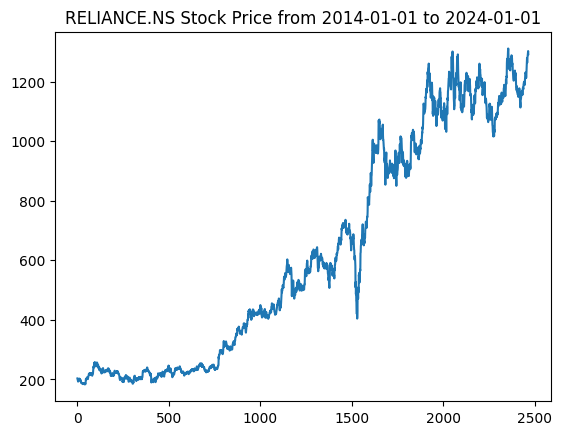

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0110, Validation Loss: 0.0020
Epoch [2/33], Loss: 0.1673, Validation Loss: 0.4786
Epoch [3/33], Loss: 0.0785, Validation Loss: 0.2962
Epoch [4/33], Loss: 0.0798, Validation Loss: 0.1065
Epoch [5/33], Loss: 0.0551, Validation Loss: 0.0057
Epoch [6/33], Loss: 0.0273, Validation Loss: 0.0291
Epoch [7/33], Loss: 0.0164, Validation Loss: 0.0026
Epoch [8/33], Loss: 0.0169, Validation Loss: 0.0179
Epoch [9/33], Loss: 0.0192, Validation Loss: 0.0184
Epoch [10/33], Loss: 0.0242, Validation Loss: 0.0014
Epoch [11/33], Loss: 0.0149, Validation Loss: 0.0153
Epoch [12/33], Loss: 0.0125, Validation Loss: 0.0023
Epoch [13/33], Loss: 0.0116, Validation Loss: 0.0166
Epoch [14/33], Loss: 0.0134, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0066, Validation Loss: 0.0113
Epoch [16/33], Loss: 0.0090, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0049, Validation Loss: 0.0068
Epoch [18/33], Loss: 0.0085, Validation Loss: 0.0012
Epoch [19/33], Loss: 0.0034, Validation Loss: 0.0047
Ep

<ipython-input-11-55953d5f2d50>:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  locals()[results_name] = pd.concat([locals()[results_name], new_row], ignore_index=True)
[*********************100%***********************]  1 of 1 completed


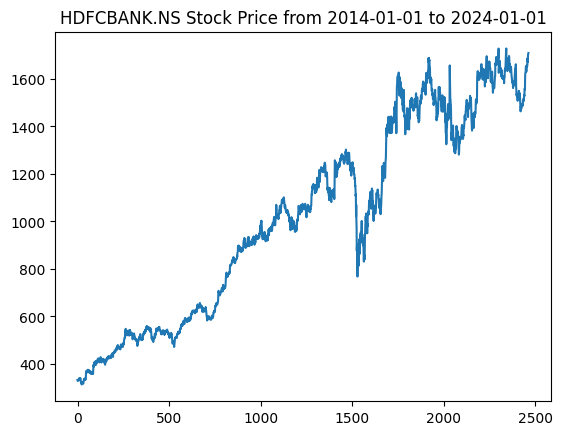

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0109, Validation Loss: 0.0459
Epoch [2/33], Loss: 0.1866, Validation Loss: 0.1760
Epoch [3/33], Loss: 0.0755, Validation Loss: 0.0359
Epoch [4/33], Loss: 0.0736, Validation Loss: 0.0063
Epoch [5/33], Loss: 0.0480, Validation Loss: 0.0242
Epoch [6/33], Loss: 0.0221, Validation Loss: 0.0007
Epoch [7/33], Loss: 0.0022, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0019, Validation Loss: 0.0011
Epoch [9/33], Loss: 0.0031, Validation Loss: 0.0014
Epoch [10/33], Loss: 0.0021, Validation Loss: 0.0007
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0018, Validation Loss: 0.0008
Epoch [13/33], Loss: 0.0030, Validation Loss: 0.0009
Epoch [14/33], Loss: 0.0032, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0018, Validation Loss: 0.0009
Epoch [17/33], Loss: 0.0021, Validation Loss: 0.0016
Epoch [18/33], Loss: 0.0025, Validation Loss: 0.0017
Epoch [19/33], Loss: 0.0065, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


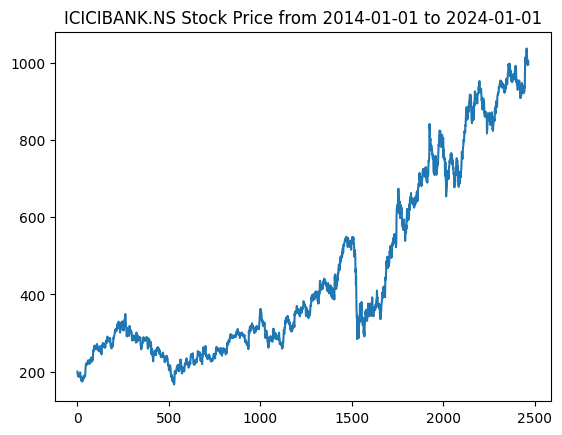

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0168, Validation Loss: 0.0219
Epoch [2/33], Loss: 0.0955, Validation Loss: 0.3667
Epoch [3/33], Loss: 0.0324, Validation Loss: 0.2429
Epoch [4/33], Loss: 0.0421, Validation Loss: 0.2549
Epoch [5/33], Loss: 0.0235, Validation Loss: 0.0103
Epoch [6/33], Loss: 0.0129, Validation Loss: 0.0200
Epoch [7/33], Loss: 0.0155, Validation Loss: 0.0253
Epoch [8/33], Loss: 0.0101, Validation Loss: 0.0026
Epoch [9/33], Loss: 0.0143, Validation Loss: 0.0282
Epoch [10/33], Loss: 0.0017, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0042, Validation Loss: 0.0044
Epoch [13/33], Loss: 0.0053, Validation Loss: 0.0015
Epoch [14/33], Loss: 0.0085, Validation Loss: 0.0252
Epoch [15/33], Loss: 0.0076, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0061, Validation Loss: 0.0248
Epoch [17/33], Loss: 0.0060, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0018, Validation Loss: 0.0047
Epoch [19/33], Loss: 0.0027, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


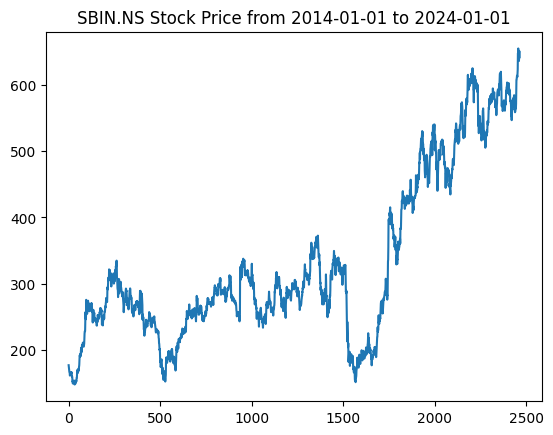

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0292, Validation Loss: 0.1174
Epoch [2/33], Loss: 0.0375, Validation Loss: 0.2040
Epoch [3/33], Loss: 0.0271, Validation Loss: 0.1746
Epoch [4/33], Loss: 0.0201, Validation Loss: 0.0636
Epoch [5/33], Loss: 0.0107, Validation Loss: 0.0020
Epoch [6/33], Loss: 0.0040, Validation Loss: 0.0043
Epoch [7/33], Loss: 0.0015, Validation Loss: 0.0008
Epoch [8/33], Loss: 0.0018, Validation Loss: 0.0012
Epoch [9/33], Loss: 0.0012, Validation Loss: 0.0018
Epoch [10/33], Loss: 0.0017, Validation Loss: 0.0018
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0023
Epoch [12/33], Loss: 0.0037, Validation Loss: 0.0037
Epoch [13/33], Loss: 0.0017, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0013, Validation Loss: 0.0019
Epoch [15/33], Loss: 0.0026, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0017
Epoch [17/33], Loss: 0.0025, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0016, Validation Loss: 0.0009
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


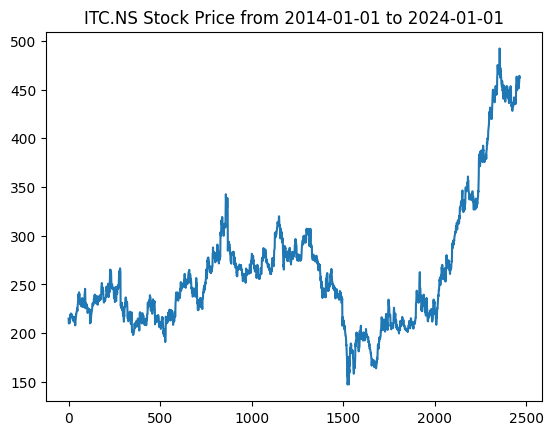

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0196, Validation Loss: 0.1059
Epoch [2/33], Loss: 0.0283, Validation Loss: 0.0592
Epoch [3/33], Loss: 0.0186, Validation Loss: 0.0425
Epoch [4/33], Loss: 0.0155, Validation Loss: 0.0392
Epoch [5/33], Loss: 0.0146, Validation Loss: 0.0377
Epoch [6/33], Loss: 0.0143, Validation Loss: 0.0346
Epoch [7/33], Loss: 0.0138, Validation Loss: 0.0283
Epoch [8/33], Loss: 0.0130, Validation Loss: 0.0092
Epoch [9/33], Loss: 0.0100, Validation Loss: 0.0485
Epoch [10/33], Loss: 0.0127, Validation Loss: 0.0150
Epoch [11/33], Loss: 0.0066, Validation Loss: 0.0153
Epoch [12/33], Loss: 0.0052, Validation Loss: 0.0037
Epoch [13/33], Loss: 0.0027, Validation Loss: 0.0122
Epoch [14/33], Loss: 0.0026, Validation Loss: 0.0090
Epoch [15/33], Loss: 0.0021, Validation Loss: 0.0081
Epoch [16/33], Loss: 0.0017, Validation Loss: 0.0093
Epoch [17/33], Loss: 0.0016, Validation Loss: 0.0069
Epoch [18/33], Loss: 0.0016, Validation Loss: 0.0086
Epoch [19/33], Loss: 0.0014, Validation Loss: 0.0075
Ep

[*********************100%***********************]  1 of 1 completed


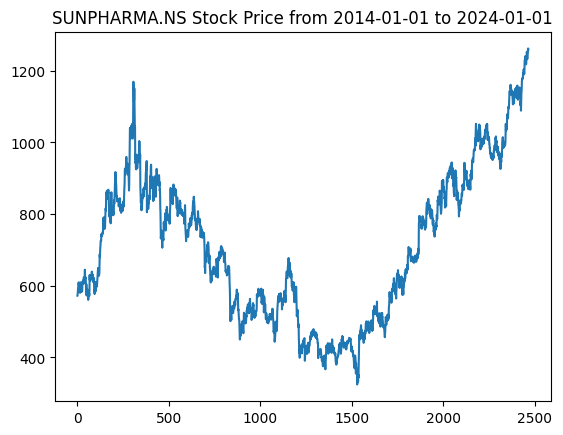

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0709, Validation Loss: 0.2628
Epoch [2/33], Loss: 0.0681, Validation Loss: 0.1808
Epoch [3/33], Loss: 0.0534, Validation Loss: 0.1483
Epoch [4/33], Loss: 0.0462, Validation Loss: 0.1344
Epoch [5/33], Loss: 0.0413, Validation Loss: 0.1136
Epoch [6/33], Loss: 0.0303, Validation Loss: 0.0631
Epoch [7/33], Loss: 0.0144, Validation Loss: 0.0387
Epoch [8/33], Loss: 0.0075, Validation Loss: 0.0138
Epoch [9/33], Loss: 0.0050, Validation Loss: 0.0107
Epoch [10/33], Loss: 0.0045, Validation Loss: 0.0116
Epoch [11/33], Loss: 0.0044, Validation Loss: 0.0144
Epoch [12/33], Loss: 0.0048, Validation Loss: 0.0175
Epoch [13/33], Loss: 0.0057, Validation Loss: 0.0129
Epoch [14/33], Loss: 0.0047, Validation Loss: 0.0145
Epoch [15/33], Loss: 0.0044, Validation Loss: 0.0085
Epoch [16/33], Loss: 0.0043, Validation Loss: 0.0106
Epoch [17/33], Loss: 0.0041, Validation Loss: 0.0119
Epoch [18/33], Loss: 0.0041, Validation Loss: 0.0122
Epoch [19/33], Loss: 0.0047, Validation Loss: 0.0142
Ep

[*********************100%***********************]  1 of 1 completed


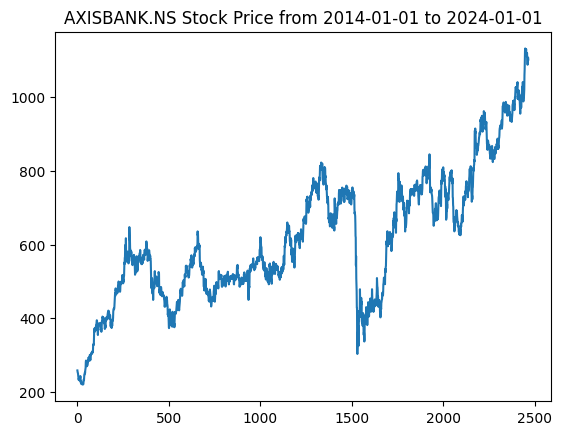

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0212, Validation Loss: 0.0195
Epoch [2/33], Loss: 0.0266, Validation Loss: 0.0139
Epoch [3/33], Loss: 0.0280, Validation Loss: 0.0192
Epoch [4/33], Loss: 0.0215, Validation Loss: 0.0033
Epoch [5/33], Loss: 0.0160, Validation Loss: 0.0034
Epoch [6/33], Loss: 0.0148, Validation Loss: 0.0016
Epoch [7/33], Loss: 0.0073, Validation Loss: 0.0013
Epoch [8/33], Loss: 0.0029, Validation Loss: 0.0013
Epoch [9/33], Loss: 0.0015, Validation Loss: 0.0009
Epoch [10/33], Loss: 0.0010, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0010, Validation Loss: 0.0012
Epoch [12/33], Loss: 0.0010, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0012, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0017
Epoch [15/33], Loss: 0.0019, Validation Loss: 0.0013
Epoch [16/33], Loss: 0.0013, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0013, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0012, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0010, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


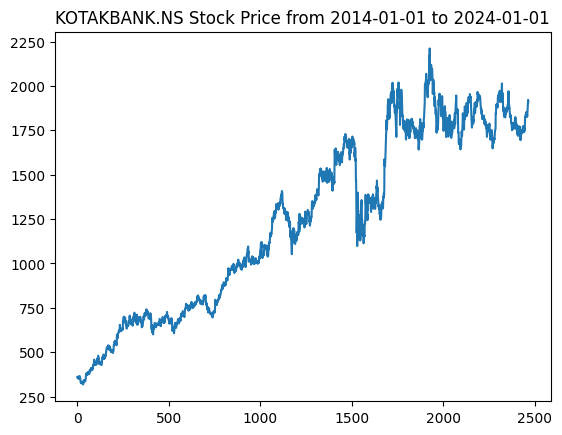

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0104, Validation Loss: 0.0147
Epoch [2/33], Loss: 0.1566, Validation Loss: 0.1694
Epoch [3/33], Loss: 0.0641, Validation Loss: 0.0364
Epoch [4/33], Loss: 0.0700, Validation Loss: 0.0308
Epoch [5/33], Loss: 0.1757, Validation Loss: 0.0251
Epoch [6/33], Loss: 0.0158, Validation Loss: 0.0029
Epoch [7/33], Loss: 0.0060, Validation Loss: 0.0015
Epoch [8/33], Loss: 0.0044, Validation Loss: 0.0032
Epoch [9/33], Loss: 0.0151, Validation Loss: 0.0003
Epoch [10/33], Loss: 0.0095, Validation Loss: 0.0034
Epoch [11/33], Loss: 0.0030, Validation Loss: 0.0025
Epoch [12/33], Loss: 0.0028, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0098, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0047, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0018, Validation Loss: 0.0007
Epoch [17/33], Loss: 0.0016, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0026, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0033, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


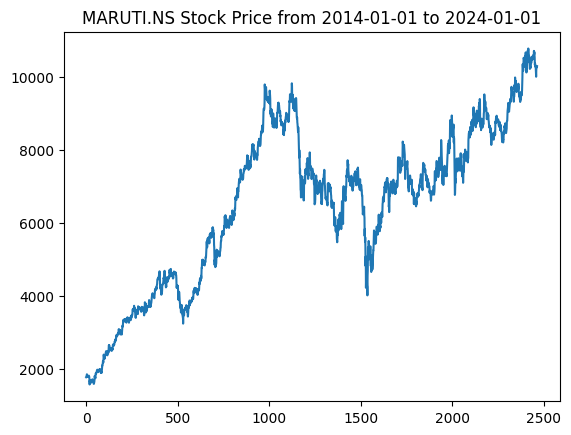

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0486, Validation Loss: 0.1321
Epoch [2/33], Loss: 0.0498, Validation Loss: 0.0171
Epoch [3/33], Loss: 0.0796, Validation Loss: 0.0039
Epoch [4/33], Loss: 0.0766, Validation Loss: 0.0021
Epoch [5/33], Loss: 0.0493, Validation Loss: 0.0116
Epoch [6/33], Loss: 0.0099, Validation Loss: 0.0171
Epoch [7/33], Loss: 0.0082, Validation Loss: 0.0138
Epoch [8/33], Loss: 0.0095, Validation Loss: 0.0099
Epoch [9/33], Loss: 0.0094, Validation Loss: 0.0080
Epoch [10/33], Loss: 0.0047, Validation Loss: 0.0075
Epoch [11/33], Loss: 0.0038, Validation Loss: 0.0055
Epoch [12/33], Loss: 0.0033, Validation Loss: 0.0020
Epoch [13/33], Loss: 0.0018, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0022, Validation Loss: 0.0016
Epoch [16/33], Loss: 0.0022, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0021, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0031, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


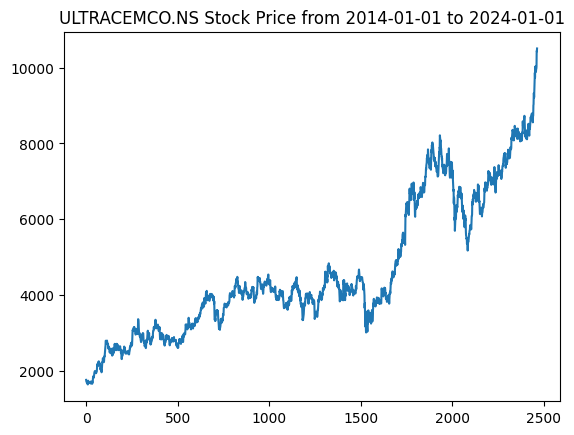

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0111, Validation Loss: 0.0188
Epoch [2/33], Loss: 0.0702, Validation Loss: 0.0811
Epoch [3/33], Loss: 0.0283, Validation Loss: 0.0566
Epoch [4/33], Loss: 0.0305, Validation Loss: 0.0571
Epoch [5/33], Loss: 0.0242, Validation Loss: 0.0265
Epoch [6/33], Loss: 0.0109, Validation Loss: 0.0026
Epoch [7/33], Loss: 0.0084, Validation Loss: 0.0049
Epoch [8/33], Loss: 0.0135, Validation Loss: 0.0356
Epoch [9/33], Loss: 0.0054, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0169, Validation Loss: 0.0578
Epoch [11/33], Loss: 0.0233, Validation Loss: 0.0405
Epoch [12/33], Loss: 0.0331, Validation Loss: 0.0469
Epoch [13/33], Loss: 0.0227, Validation Loss: 0.0340
Epoch [14/33], Loss: 0.0084, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0053, Validation Loss: 0.0063
Epoch [16/33], Loss: 0.0034, Validation Loss: 0.0032
Epoch [17/33], Loss: 0.0057, Validation Loss: 0.0019
Epoch [18/33], Loss: 0.0052, Validation Loss: 0.0032
Epoch [19/33], Loss: 0.0067, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


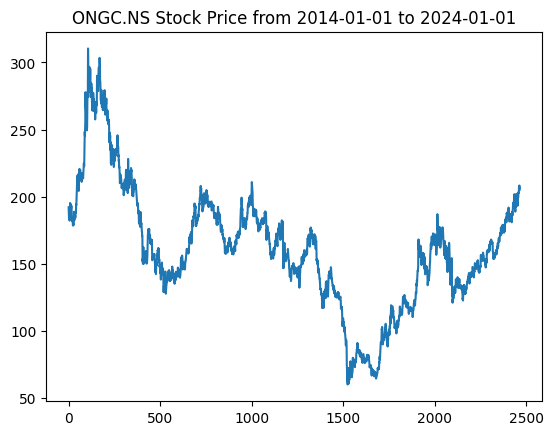

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0834, Validation Loss: 0.0327
Epoch [2/33], Loss: 0.0723, Validation Loss: 0.0180
Epoch [3/33], Loss: 0.0696, Validation Loss: 0.0042
Epoch [4/33], Loss: 0.0382, Validation Loss: 0.0180
Epoch [5/33], Loss: 0.0287, Validation Loss: 0.0075
Epoch [6/33], Loss: 0.0191, Validation Loss: 0.0062
Epoch [7/33], Loss: 0.0127, Validation Loss: 0.0010
Epoch [8/33], Loss: 0.0053, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0024, Validation Loss: 0.0013
Epoch [10/33], Loss: 0.0026, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0018, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0007
Epoch [13/33], Loss: 0.0019, Validation Loss: 0.0007
Epoch [14/33], Loss: 0.0026, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0030, Validation Loss: 0.0028
Epoch [16/33], Loss: 0.0046, Validation Loss: 0.0019
Epoch [17/33], Loss: 0.0029, Validation Loss: 0.0017
Epoch [18/33], Loss: 0.0051, Validation Loss: 0.0029
Epoch [19/33], Loss: 0.0022, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


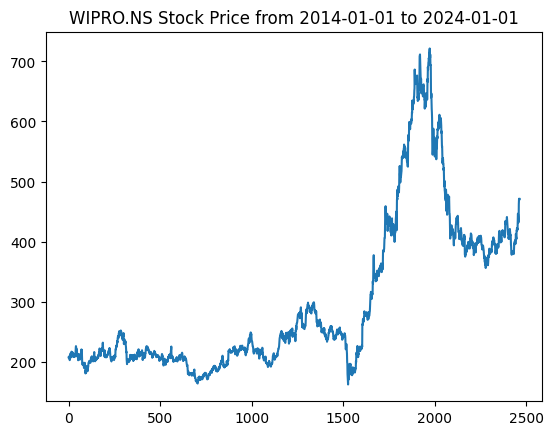

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0410, Validation Loss: 0.0154
Epoch [2/33], Loss: 0.1296, Validation Loss: 0.1537
Epoch [3/33], Loss: 0.0644, Validation Loss: 0.0945
Epoch [4/33], Loss: 0.0566, Validation Loss: 0.0416
Epoch [5/33], Loss: 0.2037, Validation Loss: 0.0603
Epoch [6/33], Loss: 0.0813, Validation Loss: 0.1562
Epoch [7/33], Loss: 0.0596, Validation Loss: 0.0857
Epoch [8/33], Loss: 0.0451, Validation Loss: 0.0293
Epoch [9/33], Loss: 0.0239, Validation Loss: 0.0328
Epoch [10/33], Loss: 0.0342, Validation Loss: 0.0416
Epoch [11/33], Loss: 0.0097, Validation Loss: 0.0057
Epoch [12/33], Loss: 0.0059, Validation Loss: 0.0028
Epoch [13/33], Loss: 0.0046, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0085, Validation Loss: 0.0036
Epoch [15/33], Loss: 0.0163, Validation Loss: 0.0123
Epoch [16/33], Loss: 0.0085, Validation Loss: 0.0046
Epoch [17/33], Loss: 0.0061, Validation Loss: 0.0010
Epoch [18/33], Loss: 0.0053, Validation Loss: 0.0052
Epoch [19/33], Loss: 0.0030, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


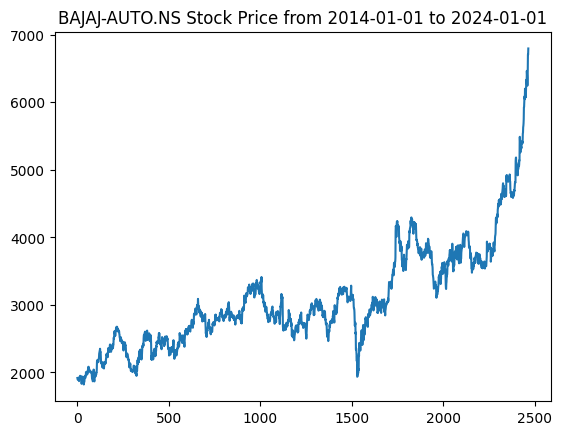

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0106, Validation Loss: 0.0082
Epoch [2/33], Loss: 0.0167, Validation Loss: 0.0011
Epoch [3/33], Loss: 0.0230, Validation Loss: 0.0129
Epoch [4/33], Loss: 0.0171, Validation Loss: 0.0250
Epoch [5/33], Loss: 0.0116, Validation Loss: 0.0151
Epoch [6/33], Loss: 0.0092, Validation Loss: 0.0005
Epoch [7/33], Loss: 0.0138, Validation Loss: 0.0170
Epoch [8/33], Loss: 0.0100, Validation Loss: 0.0129
Epoch [9/33], Loss: 0.0065, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0035, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0022, Validation Loss: 0.0006
Epoch [12/33], Loss: 0.0014, Validation Loss: 0.0002
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0006, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0005, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0005, Validation Loss: 0.0002
Epoch [17/33], Loss: 0.0005, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0005, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


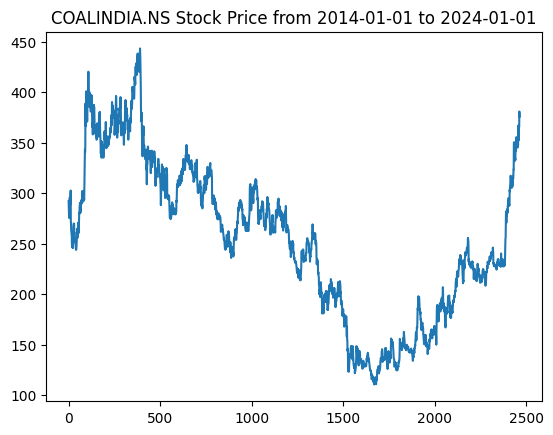

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1014, Validation Loss: 0.0184
Epoch [2/33], Loss: 0.1217, Validation Loss: 0.0082
Epoch [3/33], Loss: 0.1098, Validation Loss: 0.0031
Epoch [4/33], Loss: 0.0399, Validation Loss: 0.0077
Epoch [5/33], Loss: 0.0253, Validation Loss: 0.0024
Epoch [6/33], Loss: 0.0226, Validation Loss: 0.0039
Epoch [7/33], Loss: 0.0173, Validation Loss: 0.0093
Epoch [8/33], Loss: 0.0148, Validation Loss: 0.0100
Epoch [9/33], Loss: 0.0107, Validation Loss: 0.0023
Epoch [10/33], Loss: 0.0039, Validation Loss: 0.0028
Epoch [11/33], Loss: 0.0024, Validation Loss: 0.0017
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0018
Epoch [13/33], Loss: 0.0020, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0020, Validation Loss: 0.0012
Epoch [16/33], Loss: 0.0022, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0014
Epoch [18/33], Loss: 0.0022, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


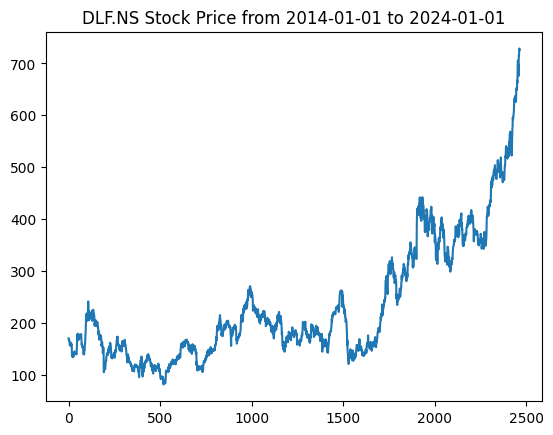

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0135, Validation Loss: 0.0203
Epoch [2/33], Loss: 0.0254, Validation Loss: 0.0768
Epoch [3/33], Loss: 0.0180, Validation Loss: 0.0784
Epoch [4/33], Loss: 0.0150, Validation Loss: 0.0721
Epoch [5/33], Loss: 0.0155, Validation Loss: 0.0678
Epoch [6/33], Loss: 0.0132, Validation Loss: 0.0393
Epoch [7/33], Loss: 0.0073, Validation Loss: 0.0015
Epoch [8/33], Loss: 0.0094, Validation Loss: 0.0112
Epoch [9/33], Loss: 0.0078, Validation Loss: 0.0077
Epoch [10/33], Loss: 0.0024, Validation Loss: 0.0064
Epoch [11/33], Loss: 0.0093, Validation Loss: 0.0419
Epoch [12/33], Loss: 0.0082, Validation Loss: 0.0128
Epoch [13/33], Loss: 0.0031, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0048, Validation Loss: 0.0145
Epoch [15/33], Loss: 0.0030, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0011, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0010, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0014, Validation Loss: 0.0037
Epoch [19/33], Loss: 0.0012, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


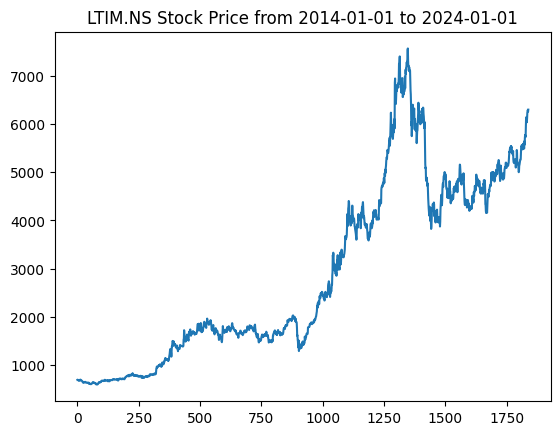

Epoch [1/33], Loss: 0.0410, Validation Loss: 0.0321
Epoch [2/33], Loss: 0.1664, Validation Loss: 0.1764
Epoch [3/33], Loss: 0.0619, Validation Loss: 0.0756
Epoch [4/33], Loss: 0.0611, Validation Loss: 0.0208
Epoch [5/33], Loss: 0.0751, Validation Loss: 0.1145
Epoch [6/33], Loss: 0.0607, Validation Loss: 0.1014
Epoch [7/33], Loss: 0.0376, Validation Loss: 0.0273
Epoch [8/33], Loss: 0.0100, Validation Loss: 0.0043
Epoch [9/33], Loss: 0.0067, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0130, Validation Loss: 0.0276
Epoch [11/33], Loss: 0.0211, Validation Loss: 0.0157
Epoch [12/33], Loss: 0.0165, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0038, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0097, Validation Loss: 0.0024
Epoch [15/33], Loss: 0.0065, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0024, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0035, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0025, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0036, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


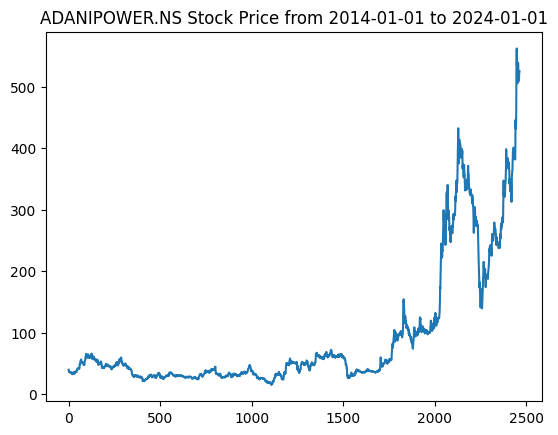

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0024, Validation Loss: 0.1754
Epoch [2/33], Loss: 0.0033, Validation Loss: 0.1790
Epoch [3/33], Loss: 0.0047, Validation Loss: 0.2307
Epoch [4/33], Loss: 0.0040, Validation Loss: 0.2457
Epoch [5/33], Loss: 0.0032, Validation Loss: 0.2436
Epoch [6/33], Loss: 0.0030, Validation Loss: 0.2440
Epoch [7/33], Loss: 0.0029, Validation Loss: 0.2430
Epoch [8/33], Loss: 0.0028, Validation Loss: 0.2438
Epoch [9/33], Loss: 0.0028, Validation Loss: 0.2432
Epoch [10/33], Loss: 0.0028, Validation Loss: 0.2433
Epoch [11/33], Loss: 0.0029, Validation Loss: 0.2432
Epoch [12/33], Loss: 0.0027, Validation Loss: 0.2435
Epoch [13/33], Loss: 0.0028, Validation Loss: 0.2433
Epoch [14/33], Loss: 0.0028, Validation Loss: 0.2432
Epoch [15/33], Loss: 0.0027, Validation Loss: 0.2429
Epoch [16/33], Loss: 0.0027, Validation Loss: 0.2432
Epoch [17/33], Loss: 0.0026, Validation Loss: 0.2430
Epoch [18/33], Loss: 0.0028, Validation Loss: 0.2430
Epoch [19/33], Loss: 0.0027, Validation Loss: 0.2433
Ep

[*********************100%***********************]  1 of 1 completed


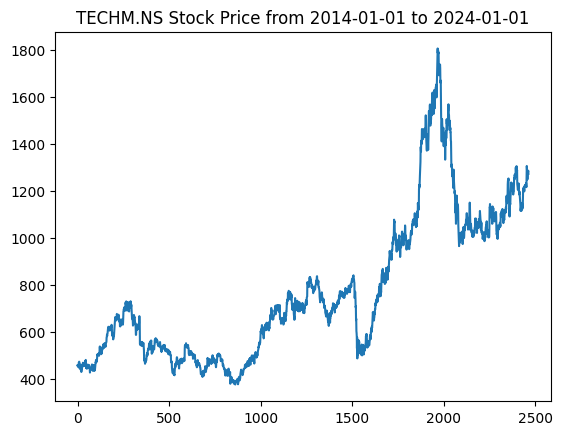

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0412, Validation Loss: 0.0093
Epoch [2/33], Loss: 0.0933, Validation Loss: 0.1383
Epoch [3/33], Loss: 0.0516, Validation Loss: 0.0950
Epoch [4/33], Loss: 0.0545, Validation Loss: 0.0812
Epoch [5/33], Loss: 0.0249, Validation Loss: 0.0052
Epoch [6/33], Loss: 0.0251, Validation Loss: 0.0082
Epoch [7/33], Loss: 0.0108, Validation Loss: 0.0297
Epoch [8/33], Loss: 0.0351, Validation Loss: 0.0618
Epoch [9/33], Loss: 0.0075, Validation Loss: 0.0016
Epoch [10/33], Loss: 0.0017, Validation Loss: 0.0009
Epoch [11/33], Loss: 0.0044, Validation Loss: 0.0014
Epoch [12/33], Loss: 0.0080, Validation Loss: 0.0150
Epoch [13/33], Loss: 0.0311, Validation Loss: 0.0515
Epoch [14/33], Loss: 0.0170, Validation Loss: 0.0020
Epoch [15/33], Loss: 0.0074, Validation Loss: 0.0077
Epoch [16/33], Loss: 0.0242, Validation Loss: 0.0317
Epoch [17/33], Loss: 0.0127, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0066, Validation Loss: 0.0023
Epoch [19/33], Loss: 0.0171, Validation Loss: 0.0190
Ep

[*********************100%***********************]  1 of 1 completed


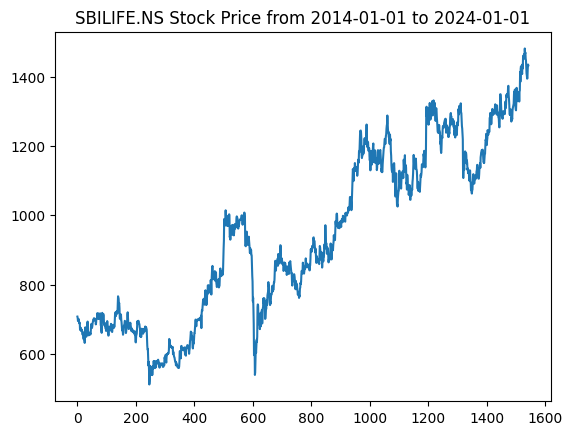

Epoch [1/33], Loss: 0.0239, Validation Loss: 0.0176
Epoch [2/33], Loss: 0.1378, Validation Loss: 0.2205
Epoch [3/33], Loss: 0.0406, Validation Loss: 0.0354
Epoch [4/33], Loss: 0.0825, Validation Loss: 0.1137
Epoch [5/33], Loss: 0.0309, Validation Loss: 0.0034
Epoch [6/33], Loss: 0.0461, Validation Loss: 0.0105
Epoch [7/33], Loss: 0.0135, Validation Loss: 0.0034
Epoch [8/33], Loss: 0.0042, Validation Loss: 0.0019
Epoch [9/33], Loss: 0.0075, Validation Loss: 0.0016
Epoch [10/33], Loss: 0.0026, Validation Loss: 0.0013
Epoch [11/33], Loss: 0.0038, Validation Loss: 0.0011
Epoch [12/33], Loss: 0.0020, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0026, Validation Loss: 0.0009
Epoch [14/33], Loss: 0.0022, Validation Loss: 0.0012
Epoch [15/33], Loss: 0.0035, Validation Loss: 0.0017
Epoch [16/33], Loss: 0.0033, Validation Loss: 0.0017
Epoch [17/33], Loss: 0.0059, Validation Loss: 0.0020
Epoch [18/33], Loss: 0.0034, Validation Loss: 0.0018
Epoch [19/33], Loss: 0.0066, Validation Loss: 0.0011
Ep

[*********************100%***********************]  1 of 1 completed


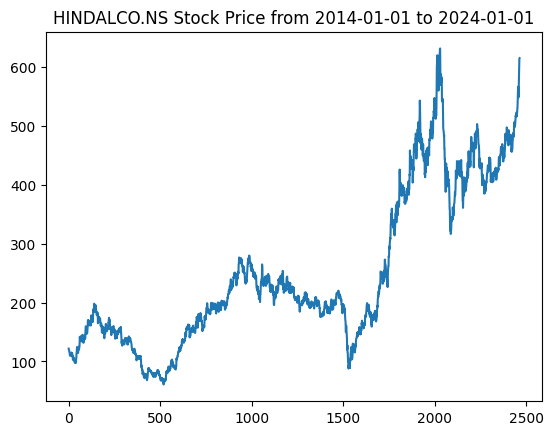

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0290, Validation Loss: 0.0485
Epoch [2/33], Loss: 0.0606, Validation Loss: 0.1813
Epoch [3/33], Loss: 0.0352, Validation Loss: 0.1430
Epoch [4/33], Loss: 0.0315, Validation Loss: 0.0651
Epoch [5/33], Loss: 0.0122, Validation Loss: 0.0398
Epoch [6/33], Loss: 0.0082, Validation Loss: 0.0166
Epoch [7/33], Loss: 0.0108, Validation Loss: 0.0151
Epoch [8/33], Loss: 0.0126, Validation Loss: 0.0270
Epoch [9/33], Loss: 0.0200, Validation Loss: 0.0806
Epoch [10/33], Loss: 0.0152, Validation Loss: 0.0081
Epoch [11/33], Loss: 0.0064, Validation Loss: 0.0064
Epoch [12/33], Loss: 0.0126, Validation Loss: 0.0461
Epoch [13/33], Loss: 0.0078, Validation Loss: 0.0018
Epoch [14/33], Loss: 0.0016, Validation Loss: 0.0013
Epoch [15/33], Loss: 0.0011, Validation Loss: 0.0011
Epoch [16/33], Loss: 0.0014, Validation Loss: 0.0010
Epoch [17/33], Loss: 0.0009, Validation Loss: 0.0010
Epoch [18/33], Loss: 0.0009, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


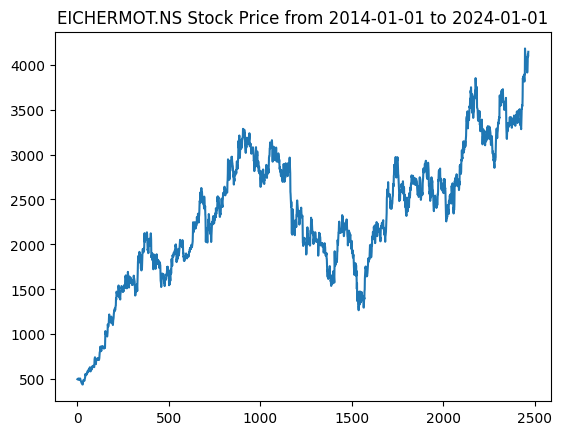

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0392, Validation Loss: 0.1509
Epoch [2/33], Loss: 0.0352, Validation Loss: 0.1225
Epoch [3/33], Loss: 0.0352, Validation Loss: 0.0647
Epoch [4/33], Loss: 0.0358, Validation Loss: 0.0390
Epoch [5/33], Loss: 0.0331, Validation Loss: 0.0343
Epoch [6/33], Loss: 0.0223, Validation Loss: 0.0342
Epoch [7/33], Loss: 0.0049, Validation Loss: 0.0112
Epoch [8/33], Loss: 0.0109, Validation Loss: 0.0159
Epoch [9/33], Loss: 0.0065, Validation Loss: 0.0028
Epoch [10/33], Loss: 0.0050, Validation Loss: 0.0075
Epoch [11/33], Loss: 0.0055, Validation Loss: 0.0092
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0010
Epoch [13/33], Loss: 0.0020, Validation Loss: 0.0015
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0025, Validation Loss: 0.0026
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0033
Epoch [17/33], Loss: 0.0049, Validation Loss: 0.0107
Epoch [18/33], Loss: 0.0027, Validation Loss: 0.0021
Epoch [19/33], Loss: 0.0043, Validation Loss: 0.0074
Ep

[*********************100%***********************]  1 of 1 completed


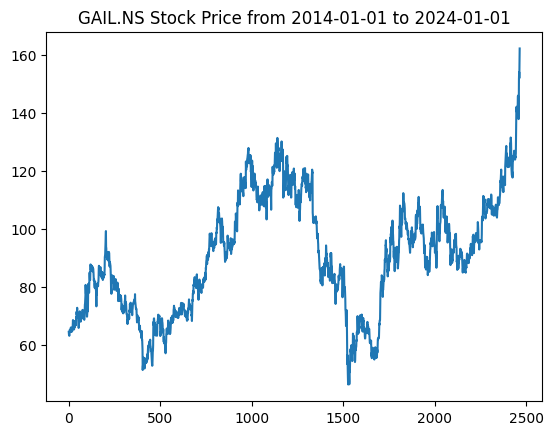

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0572, Validation Loss: 0.0446
Epoch [2/33], Loss: 0.0468, Validation Loss: 0.0033
Epoch [3/33], Loss: 0.0386, Validation Loss: 0.0031
Epoch [4/33], Loss: 0.0352, Validation Loss: 0.0020
Epoch [5/33], Loss: 0.0270, Validation Loss: 0.0026
Epoch [6/33], Loss: 0.0232, Validation Loss: 0.0015
Epoch [7/33], Loss: 0.0177, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0075, Validation Loss: 0.0007
Epoch [9/33], Loss: 0.0043, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [11/33], Loss: 0.0014, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0013, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0015, Validation Loss: 0.0009
Epoch [16/33], Loss: 0.0016, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0014, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0012, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0014, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0013, Validation Loss: 0.0006


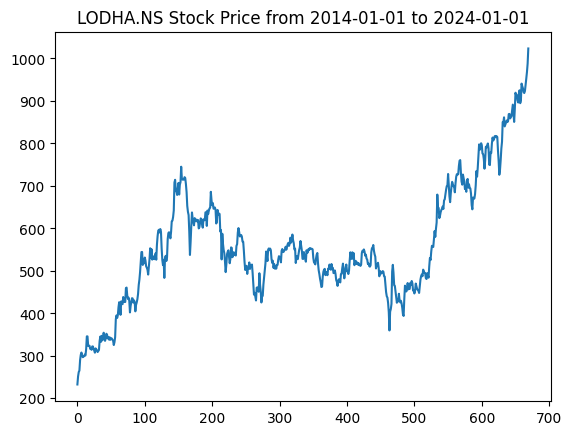

Epoch [1/33], Loss: 0.0641, Validation Loss: 0.0348
Epoch [2/33], Loss: 0.0099, Validation Loss: 0.0925
Epoch [3/33], Loss: 0.0121, Validation Loss: 0.0693
Epoch [4/33], Loss: 0.0105, Validation Loss: 0.0611
Epoch [5/33], Loss: 0.0088, Validation Loss: 0.0749
Epoch [6/33], Loss: 0.0096, Validation Loss: 0.0625
Epoch [7/33], Loss: 0.0090, Validation Loss: 0.0623
Epoch [8/33], Loss: 0.0090, Validation Loss: 0.0605
Epoch [9/33], Loss: 0.0081, Validation Loss: 0.0510
Epoch [10/33], Loss: 0.0080, Validation Loss: 0.0456
Epoch [11/33], Loss: 0.0068, Validation Loss: 0.0248
Epoch [12/33], Loss: 0.0051, Validation Loss: 0.0045
Epoch [13/33], Loss: 0.0039, Validation Loss: 0.0204
Epoch [14/33], Loss: 0.0042, Validation Loss: 0.0131
Epoch [15/33], Loss: 0.0035, Validation Loss: 0.0024
Epoch [16/33], Loss: 0.0024, Validation Loss: 0.0026
Epoch [17/33], Loss: 0.0033, Validation Loss: 0.0215
Epoch [18/33], Loss: 0.0045, Validation Loss: 0.0244
Epoch [19/33], Loss: 0.0049, Validation Loss: 0.0066
Ep

[*********************100%***********************]  1 of 1 completed


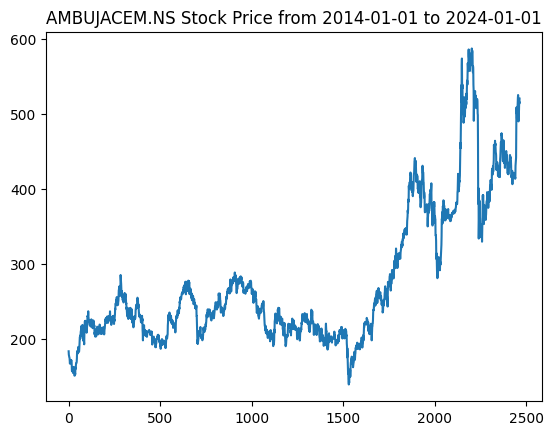

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0244, Validation Loss: 0.1935
Epoch [2/33], Loss: 0.0236, Validation Loss: 0.2137
Epoch [3/33], Loss: 0.0214, Validation Loss: 0.2113
Epoch [4/33], Loss: 0.0190, Validation Loss: 0.1896
Epoch [5/33], Loss: 0.0101, Validation Loss: 0.0423
Epoch [6/33], Loss: 0.0128, Validation Loss: 0.0266
Epoch [7/33], Loss: 0.0114, Validation Loss: 0.0987
Epoch [8/33], Loss: 0.0220, Validation Loss: 0.2349
Epoch [9/33], Loss: 0.0144, Validation Loss: 0.1575
Epoch [10/33], Loss: 0.0050, Validation Loss: 0.0179
Epoch [11/33], Loss: 0.0048, Validation Loss: 0.0203
Epoch [12/33], Loss: 0.0013, Validation Loss: 0.0047
Epoch [13/33], Loss: 0.0009, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0008, Validation Loss: 0.0021
Epoch [15/33], Loss: 0.0008, Validation Loss: 0.0046
Epoch [16/33], Loss: 0.0026, Validation Loss: 0.0106
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0063
Epoch [18/33], Loss: 0.0079, Validation Loss: 0.0648
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0027
Ep

[*********************100%***********************]  1 of 1 completed


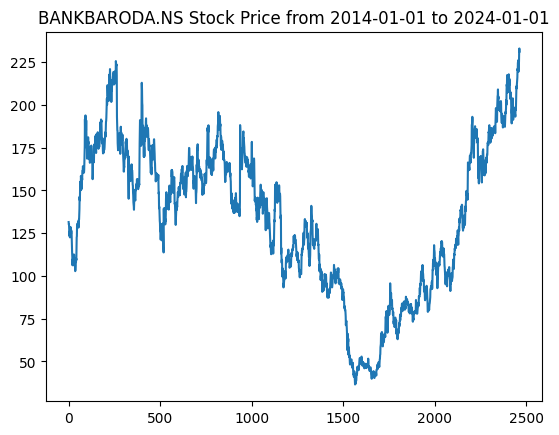

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0848, Validation Loss: 0.0985
Epoch [2/33], Loss: 0.1122, Validation Loss: 0.0619
Epoch [3/33], Loss: 0.1069, Validation Loss: 0.0222
Epoch [4/33], Loss: 0.0449, Validation Loss: 0.0394
Epoch [5/33], Loss: 0.0410, Validation Loss: 0.0167
Epoch [6/33], Loss: 0.0185, Validation Loss: 0.0124
Epoch [7/33], Loss: 0.0110, Validation Loss: 0.0104
Epoch [8/33], Loss: 0.0091, Validation Loss: 0.0150
Epoch [9/33], Loss: 0.0093, Validation Loss: 0.0128
Epoch [10/33], Loss: 0.0093, Validation Loss: 0.0103
Epoch [11/33], Loss: 0.0101, Validation Loss: 0.0227
Epoch [12/33], Loss: 0.0114, Validation Loss: 0.0112
Epoch [13/33], Loss: 0.0083, Validation Loss: 0.0094
Epoch [14/33], Loss: 0.0072, Validation Loss: 0.0098
Epoch [15/33], Loss: 0.0075, Validation Loss: 0.0126
Epoch [16/33], Loss: 0.0078, Validation Loss: 0.0113
Epoch [17/33], Loss: 0.0070, Validation Loss: 0.0083
Epoch [18/33], Loss: 0.0061, Validation Loss: 0.0107
Epoch [19/33], Loss: 0.0061, Validation Loss: 0.0062
Ep

[*********************100%***********************]  1 of 1 completed


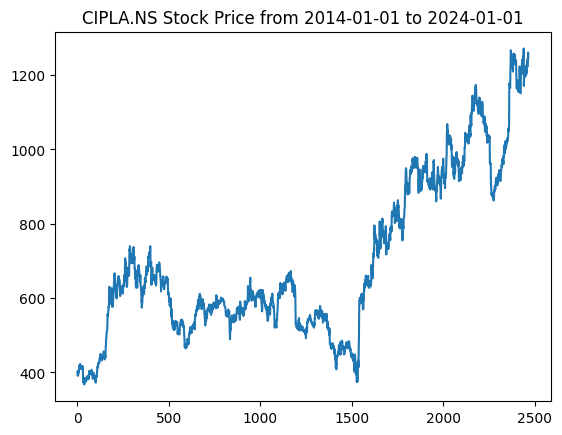

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0380, Validation Loss: 0.1761
Epoch [2/33], Loss: 0.0409, Validation Loss: 0.2325
Epoch [3/33], Loss: 0.0321, Validation Loss: 0.1823
Epoch [4/33], Loss: 0.0152, Validation Loss: 0.0021
Epoch [5/33], Loss: 0.0295, Validation Loss: 0.1598
Epoch [6/33], Loss: 0.0080, Validation Loss: 0.0107
Epoch [7/33], Loss: 0.0111, Validation Loss: 0.0030
Epoch [8/33], Loss: 0.0075, Validation Loss: 0.0401
Epoch [9/33], Loss: 0.0098, Validation Loss: 0.0261
Epoch [10/33], Loss: 0.0038, Validation Loss: 0.0068
Epoch [11/33], Loss: 0.0064, Validation Loss: 0.0151
Epoch [12/33], Loss: 0.0040, Validation Loss: 0.0034
Epoch [13/33], Loss: 0.0061, Validation Loss: 0.0158
Epoch [14/33], Loss: 0.0033, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0042, Validation Loss: 0.0112
Epoch [16/33], Loss: 0.0030, Validation Loss: 0.0014
Epoch [17/33], Loss: 0.0027, Validation Loss: 0.0059
Epoch [18/33], Loss: 0.0021, Validation Loss: 0.0013
Epoch [19/33], Loss: 0.0032, Validation Loss: 0.0038
Ep

[*********************100%***********************]  1 of 1 completed


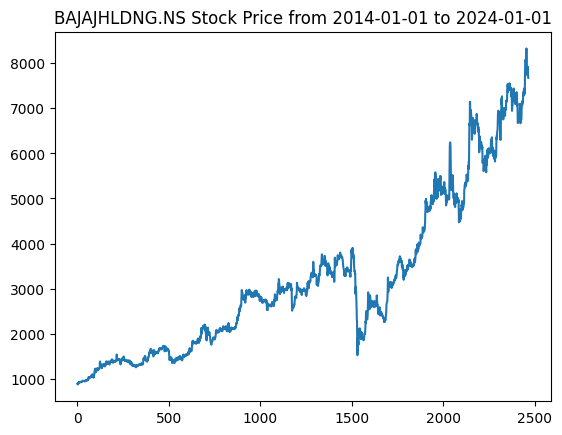

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0117, Validation Loss: 0.1124
Epoch [2/33], Loss: 0.0338, Validation Loss: 0.0829
Epoch [3/33], Loss: 0.0383, Validation Loss: 0.1472
Epoch [4/33], Loss: 0.0242, Validation Loss: 0.0948
Epoch [5/33], Loss: 0.0160, Validation Loss: 0.0211
Epoch [6/33], Loss: 0.0139, Validation Loss: 0.0158
Epoch [7/33], Loss: 0.0090, Validation Loss: 0.0027
Epoch [8/33], Loss: 0.0026, Validation Loss: 0.0014
Epoch [9/33], Loss: 0.0010, Validation Loss: 0.0010
Epoch [10/33], Loss: 0.0016, Validation Loss: 0.0007
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0034
Epoch [12/33], Loss: 0.0030, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0011, Validation Loss: 0.0007
Epoch [14/33], Loss: 0.0007, Validation Loss: 0.0011
Epoch [15/33], Loss: 0.0006, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0009, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0017, Validation Loss: 0.0059
Epoch [18/33], Loss: 0.0028, Validation Loss: 0.0013
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0023
Ep

[*********************100%***********************]  1 of 1 completed


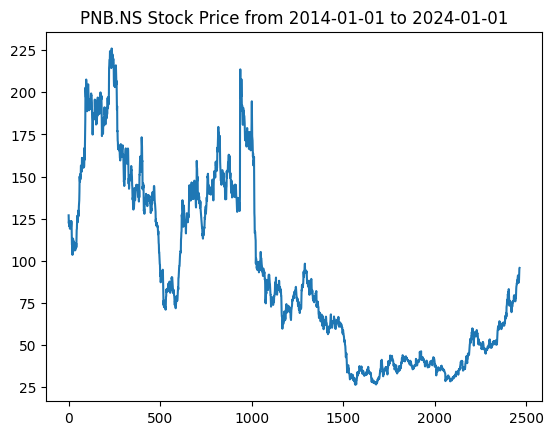

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1071, Validation Loss: 0.0022
Epoch [2/33], Loss: 0.1442, Validation Loss: 0.0302
Epoch [3/33], Loss: 0.0596, Validation Loss: 0.0020
Epoch [4/33], Loss: 0.0469, Validation Loss: 0.0006
Epoch [5/33], Loss: 0.0172, Validation Loss: 0.0003
Epoch [6/33], Loss: 0.0136, Validation Loss: 0.0003
Epoch [7/33], Loss: 0.0135, Validation Loss: 0.0003
Epoch [8/33], Loss: 0.0085, Validation Loss: 0.0001
Epoch [9/33], Loss: 0.0046, Validation Loss: 0.0001
Epoch [10/33], Loss: 0.0034, Validation Loss: 0.0002
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0001
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0001
Epoch [13/33], Loss: 0.0021, Validation Loss: 0.0001
Epoch [14/33], Loss: 0.0022, Validation Loss: 0.0004
Epoch [15/33], Loss: 0.0027, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0030, Validation Loss: 0.0014
Epoch [17/33], Loss: 0.0024, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0022, Validation Loss: 0.0001
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0001
Ep

[*********************100%***********************]  1 of 1 completed


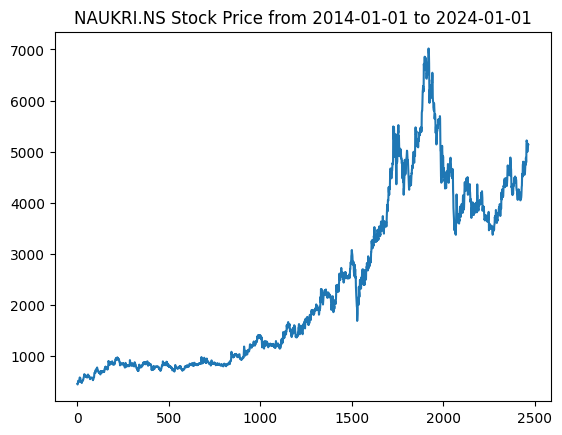

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0140, Validation Loss: 0.2114
Epoch [2/33], Loss: 0.1667, Validation Loss: 0.1906
Epoch [3/33], Loss: 0.0645, Validation Loss: 0.0922
Epoch [4/33], Loss: 0.0796, Validation Loss: 0.1029
Epoch [5/33], Loss: 0.0618, Validation Loss: 0.0445
Epoch [6/33], Loss: 0.0402, Validation Loss: 0.0421
Epoch [7/33], Loss: 0.0310, Validation Loss: 0.0068
Epoch [8/33], Loss: 0.0142, Validation Loss: 0.0247
Epoch [9/33], Loss: 0.0242, Validation Loss: 0.0108
Epoch [10/33], Loss: 0.0183, Validation Loss: 0.0537
Epoch [11/33], Loss: 0.0445, Validation Loss: 0.0606
Epoch [12/33], Loss: 0.0191, Validation Loss: 0.0025
Epoch [13/33], Loss: 0.0081, Validation Loss: 0.0024
Epoch [14/33], Loss: 0.0191, Validation Loss: 0.0119
Epoch [15/33], Loss: 0.0105, Validation Loss: 0.0015
Epoch [16/33], Loss: 0.0032, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0054, Validation Loss: 0.0012
Epoch [18/33], Loss: 0.0044, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0056, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


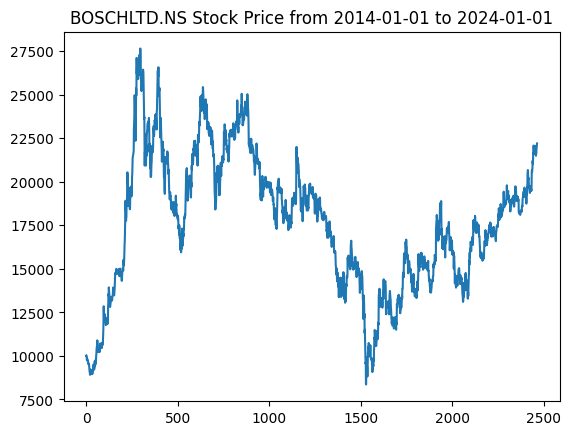

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0464, Validation Loss: 0.0294
Epoch [2/33], Loss: 0.0775, Validation Loss: 0.0220
Epoch [3/33], Loss: 0.0993, Validation Loss: 0.0052
Epoch [4/33], Loss: 0.0657, Validation Loss: 0.0045
Epoch [5/33], Loss: 0.0527, Validation Loss: 0.0035
Epoch [6/33], Loss: 0.0270, Validation Loss: 0.0030
Epoch [7/33], Loss: 0.0206, Validation Loss: 0.0106
Epoch [8/33], Loss: 0.0261, Validation Loss: 0.0025
Epoch [9/33], Loss: 0.0208, Validation Loss: 0.0046
Epoch [10/33], Loss: 0.0062, Validation Loss: 0.0025
Epoch [11/33], Loss: 0.0041, Validation Loss: 0.0021
Epoch [12/33], Loss: 0.0037, Validation Loss: 0.0016
Epoch [13/33], Loss: 0.0035, Validation Loss: 0.0018
Epoch [14/33], Loss: 0.0040, Validation Loss: 0.0021
Epoch [15/33], Loss: 0.0039, Validation Loss: 0.0021
Epoch [16/33], Loss: 0.0042, Validation Loss: 0.0025
Epoch [17/33], Loss: 0.0046, Validation Loss: 0.0024
Epoch [18/33], Loss: 0.0046, Validation Loss: 0.0026
Epoch [19/33], Loss: 0.0050, Validation Loss: 0.0029
Ep

[*********************100%***********************]  1 of 1 completed


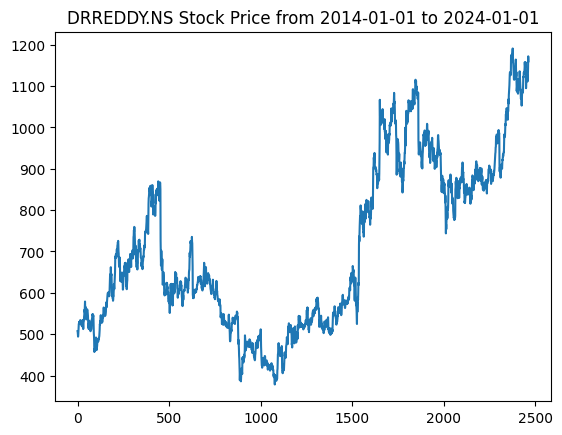

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1021, Validation Loss: 0.1341
Epoch [2/33], Loss: 0.0824, Validation Loss: 0.1022
Epoch [3/33], Loss: 0.0544, Validation Loss: 0.0010
Epoch [4/33], Loss: 0.0406, Validation Loss: 0.0193
Epoch [5/33], Loss: 0.0083, Validation Loss: 0.0011
Epoch [6/33], Loss: 0.0038, Validation Loss: 0.0033
Epoch [7/33], Loss: 0.0027, Validation Loss: 0.0008
Epoch [8/33], Loss: 0.0018, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0020, Validation Loss: 0.0018
Epoch [10/33], Loss: 0.0021, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0020, Validation Loss: 0.0015
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0027
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0020
Epoch [14/33], Loss: 0.0024, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0020, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0028, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0031, Validation Loss: 0.0078
Epoch [18/33], Loss: 0.0035, Validation Loss: 0.0057
Epoch [19/33], Loss: 0.0027, Validation Loss: 0.0023
Ep

[*********************100%***********************]  1 of 1 completed


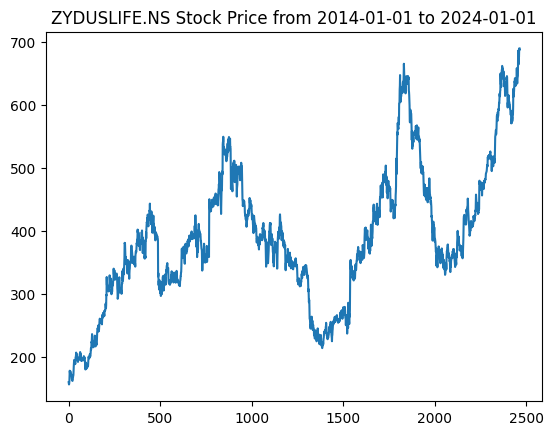

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0533, Validation Loss: 0.0102
Epoch [2/33], Loss: 0.0423, Validation Loss: 0.0062
Epoch [3/33], Loss: 0.0238, Validation Loss: 0.0035
Epoch [4/33], Loss: 0.0283, Validation Loss: 0.0007
Epoch [5/33], Loss: 0.0079, Validation Loss: 0.0349
Epoch [6/33], Loss: 0.0159, Validation Loss: 0.0245
Epoch [7/33], Loss: 0.0109, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0033, Validation Loss: 0.0005
Epoch [9/33], Loss: 0.0022, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0023, Validation Loss: 0.0014
Epoch [11/33], Loss: 0.0021, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0016, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0019, Validation Loss: 0.0024
Epoch [15/33], Loss: 0.0029, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0024, Validation Loss: 0.0020
Epoch [17/33], Loss: 0.0035, Validation Loss: 0.0019
Epoch [18/33], Loss: 0.0052, Validation Loss: 0.0012
Epoch [19/33], Loss: 0.0062, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


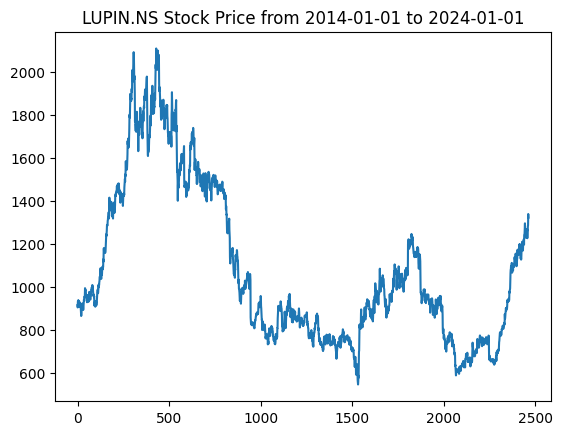

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0754, Validation Loss: 0.0020
Epoch [2/33], Loss: 0.1108, Validation Loss: 0.0293
Epoch [3/33], Loss: 0.0849, Validation Loss: 0.0268
Epoch [4/33], Loss: 0.0773, Validation Loss: 0.0136
Epoch [5/33], Loss: 0.0469, Validation Loss: 0.0019
Epoch [6/33], Loss: 0.0443, Validation Loss: 0.0039
Epoch [7/33], Loss: 0.0082, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0147, Validation Loss: 0.0002
Epoch [9/33], Loss: 0.0048, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0073, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0047, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0047, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0048, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0051, Validation Loss: 0.0004
Epoch [15/33], Loss: 0.0055, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0055, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0060, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0050, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0045, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


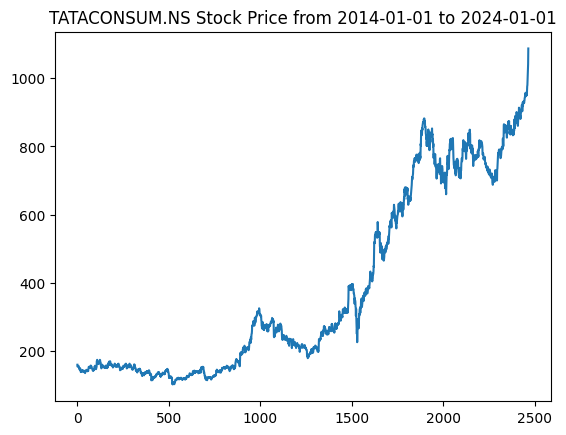

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0119, Validation Loss: 0.1260
Epoch [2/33], Loss: 0.1434, Validation Loss: 0.3239
Epoch [3/33], Loss: 0.0491, Validation Loss: 0.2526
Epoch [4/33], Loss: 0.0508, Validation Loss: 0.2282
Epoch [5/33], Loss: 0.0437, Validation Loss: 0.1290
Epoch [6/33], Loss: 0.0109, Validation Loss: 0.0138
Epoch [7/33], Loss: 0.0422, Validation Loss: 0.1893
Epoch [8/33], Loss: 0.0484, Validation Loss: 0.2538
Epoch [9/33], Loss: 0.0389, Validation Loss: 0.1744
Epoch [10/33], Loss: 0.0224, Validation Loss: 0.0152
Epoch [11/33], Loss: 0.0151, Validation Loss: 0.0396
Epoch [12/33], Loss: 0.0118, Validation Loss: 0.0114
Epoch [13/33], Loss: 0.0136, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0121, Validation Loss: 0.0250
Epoch [15/33], Loss: 0.0079, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0041, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0067, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0066, Validation Loss: 0.0137
Epoch [19/33], Loss: 0.0064, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


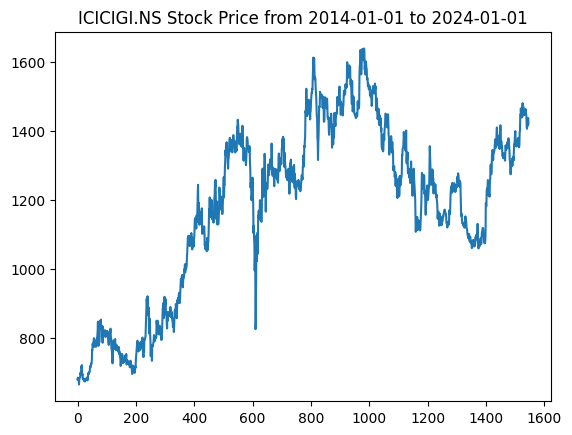

Epoch [1/33], Loss: 0.0346, Validation Loss: 0.0371
Epoch [2/33], Loss: 0.1995, Validation Loss: 0.0177
Epoch [3/33], Loss: 0.0510, Validation Loss: 0.1006
Epoch [4/33], Loss: 0.1404, Validation Loss: 0.0060
Epoch [5/33], Loss: 0.0412, Validation Loss: 0.0568
Epoch [6/33], Loss: 0.0546, Validation Loss: 0.0030
Epoch [7/33], Loss: 0.0044, Validation Loss: 0.0022
Epoch [8/33], Loss: 0.0050, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0054, Validation Loss: 0.0054
Epoch [10/33], Loss: 0.0083, Validation Loss: 0.0012
Epoch [11/33], Loss: 0.0044, Validation Loss: 0.0034
Epoch [12/33], Loss: 0.0066, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0044, Validation Loss: 0.0031
Epoch [14/33], Loss: 0.0069, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0057, Validation Loss: 0.0046
Epoch [16/33], Loss: 0.0077, Validation Loss: 0.0030
Epoch [17/33], Loss: 0.0053, Validation Loss: 0.0067
Epoch [18/33], Loss: 0.0051, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0058, Validation Loss: 0.0060
Ep

[*********************100%***********************]  1 of 1 completed


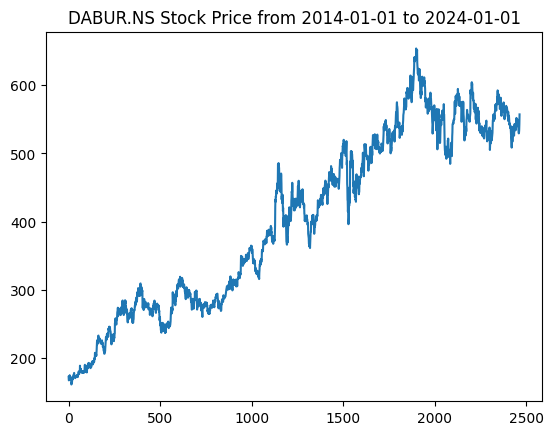

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0117, Validation Loss: 0.0546
Epoch [2/33], Loss: 0.1781, Validation Loss: 0.1936
Epoch [3/33], Loss: 0.0529, Validation Loss: 0.0114
Epoch [4/33], Loss: 0.0898, Validation Loss: 0.0376
Epoch [5/33], Loss: 0.0851, Validation Loss: 0.0160
Epoch [6/33], Loss: 0.0098, Validation Loss: 0.0018
Epoch [7/33], Loss: 0.0027, Validation Loss: 0.0010
Epoch [8/33], Loss: 0.0022, Validation Loss: 0.0017
Epoch [9/33], Loss: 0.0023, Validation Loss: 0.0010
Epoch [10/33], Loss: 0.0045, Validation Loss: 0.0009
Epoch [11/33], Loss: 0.0020, Validation Loss: 0.0014
Epoch [12/33], Loss: 0.0018, Validation Loss: 0.0011
Epoch [13/33], Loss: 0.0034, Validation Loss: 0.0016
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0031, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0017
Epoch [18/33], Loss: 0.0018, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0036, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


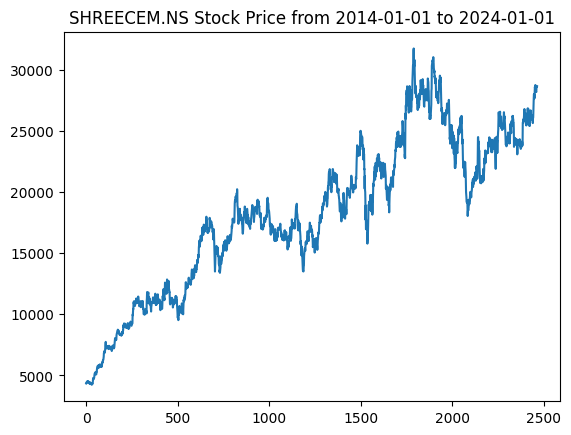

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0210, Validation Loss: 0.2163
Epoch [2/33], Loss: 0.1715, Validation Loss: 0.0544
Epoch [3/33], Loss: 0.0390, Validation Loss: 0.0119
Epoch [4/33], Loss: 0.0679, Validation Loss: 0.0036
Epoch [5/33], Loss: 0.0711, Validation Loss: 0.0152
Epoch [6/33], Loss: 0.0190, Validation Loss: 0.0076
Epoch [7/33], Loss: 0.0052, Validation Loss: 0.0005
Epoch [8/33], Loss: 0.0032, Validation Loss: 0.0013
Epoch [9/33], Loss: 0.0061, Validation Loss: 0.0055
Epoch [10/33], Loss: 0.0028, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0048, Validation Loss: 0.0024
Epoch [12/33], Loss: 0.0026, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0033, Validation Loss: 0.0032
Epoch [14/33], Loss: 0.0073, Validation Loss: 0.0067
Epoch [15/33], Loss: 0.0031, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0055, Validation Loss: 0.0063
Epoch [17/33], Loss: 0.0039, Validation Loss: 0.0041
Epoch [18/33], Loss: 0.0079, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0028, Validation Loss: 0.0046
Ep

[*********************100%***********************]  1 of 1 completed


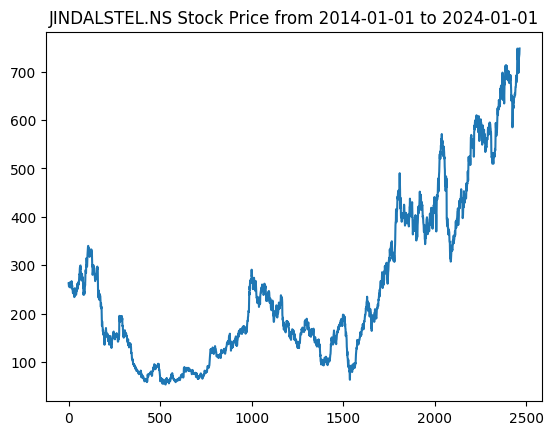

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0314, Validation Loss: 0.1124
Epoch [2/33], Loss: 0.0395, Validation Loss: 0.1802
Epoch [3/33], Loss: 0.0269, Validation Loss: 0.1514
Epoch [4/33], Loss: 0.0227, Validation Loss: 0.0585
Epoch [5/33], Loss: 0.0070, Validation Loss: 0.0023
Epoch [6/33], Loss: 0.0051, Validation Loss: 0.0017
Epoch [7/33], Loss: 0.0048, Validation Loss: 0.0107
Epoch [8/33], Loss: 0.0042, Validation Loss: 0.0025
Epoch [9/33], Loss: 0.0024, Validation Loss: 0.0040
Epoch [10/33], Loss: 0.0014, Validation Loss: 0.0019
Epoch [11/33], Loss: 0.0013, Validation Loss: 0.0029
Epoch [12/33], Loss: 0.0013, Validation Loss: 0.0019
Epoch [13/33], Loss: 0.0010, Validation Loss: 0.0012
Epoch [14/33], Loss: 0.0006, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0006, Validation Loss: 0.0013
Epoch [16/33], Loss: 0.0006, Validation Loss: 0.0016
Epoch [17/33], Loss: 0.0006, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0006, Validation Loss: 0.0009
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed


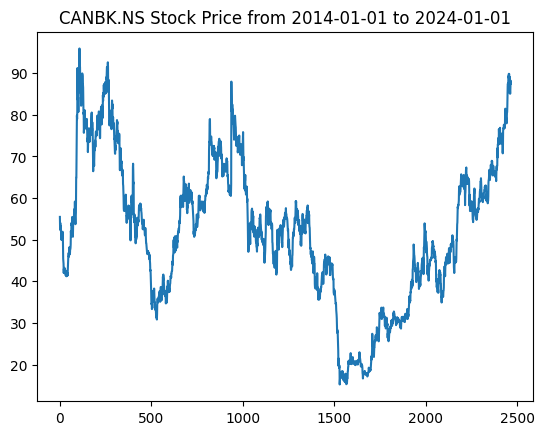

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1003, Validation Loss: 0.0729
Epoch [2/33], Loss: 0.1055, Validation Loss: 0.0306
Epoch [3/33], Loss: 0.0778, Validation Loss: 0.0187
Epoch [4/33], Loss: 0.0361, Validation Loss: 0.0232
Epoch [5/33], Loss: 0.0198, Validation Loss: 0.0049
Epoch [6/33], Loss: 0.0129, Validation Loss: 0.0141
Epoch [7/33], Loss: 0.0104, Validation Loss: 0.0040
Epoch [8/33], Loss: 0.0067, Validation Loss: 0.0011
Epoch [9/33], Loss: 0.0035, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0022, Validation Loss: 0.0005
Epoch [11/33], Loss: 0.0023, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0022, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0023, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0022, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0010
Epoch [16/33], Loss: 0.0023, Validation Loss: 0.0005
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0016
Epoch [18/33], Loss: 0.0025, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0030, Validation Loss: 0.0045
Ep

[*********************100%***********************]  1 of 1 completed


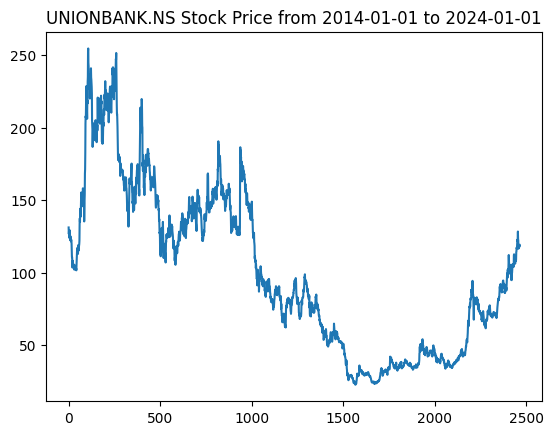

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0865, Validation Loss: 0.0055
Epoch [2/33], Loss: 0.1321, Validation Loss: 0.0242
Epoch [3/33], Loss: 0.0846, Validation Loss: 0.0115
Epoch [4/33], Loss: 0.0503, Validation Loss: 0.0053
Epoch [5/33], Loss: 0.0346, Validation Loss: 0.0053
Epoch [6/33], Loss: 0.0135, Validation Loss: 0.0007
Epoch [7/33], Loss: 0.0082, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0087, Validation Loss: 0.0005
Epoch [9/33], Loss: 0.0069, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0040, Validation Loss: 0.0002
Epoch [11/33], Loss: 0.0021, Validation Loss: 0.0002
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0002
Epoch [13/33], Loss: 0.0028, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0050, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0042, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0022, Validation Loss: 0.0002
Epoch [17/33], Loss: 0.0018, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0016, Validation Loss: 0.0001
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


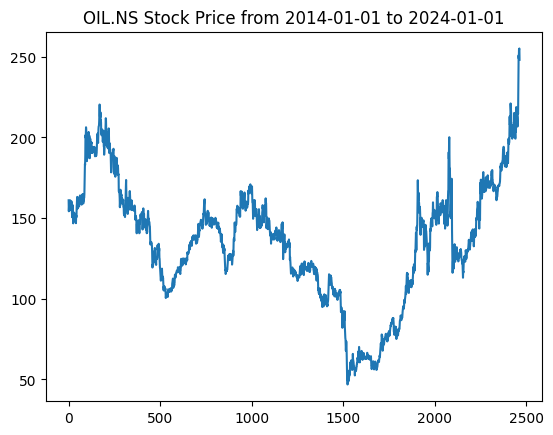

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0589, Validation Loss: 0.0525
Epoch [2/33], Loss: 0.0509, Validation Loss: 0.0460
Epoch [3/33], Loss: 0.0518, Validation Loss: 0.0233
Epoch [4/33], Loss: 0.0281, Validation Loss: 0.0386
Epoch [5/33], Loss: 0.0241, Validation Loss: 0.0326
Epoch [6/33], Loss: 0.0160, Validation Loss: 0.0080
Epoch [7/33], Loss: 0.0084, Validation Loss: 0.0047
Epoch [8/33], Loss: 0.0050, Validation Loss: 0.0021
Epoch [9/33], Loss: 0.0024, Validation Loss: 0.0013
Epoch [10/33], Loss: 0.0018, Validation Loss: 0.0013
Epoch [11/33], Loss: 0.0016, Validation Loss: 0.0013
Epoch [12/33], Loss: 0.0015, Validation Loss: 0.0011
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0011
Epoch [14/33], Loss: 0.0016, Validation Loss: 0.0014
Epoch [15/33], Loss: 0.0022, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0020, Validation Loss: 0.0015
Epoch [17/33], Loss: 0.0017, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0019, Validation Loss: 0.0012
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0011
Ep

[*********************100%***********************]  1 of 1 completed


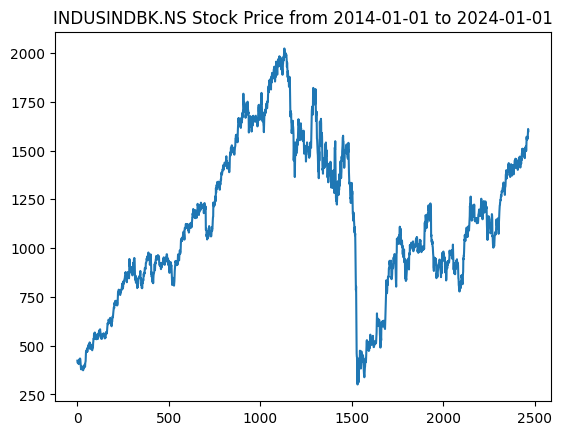

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0256, Validation Loss: 0.0373
Epoch [2/33], Loss: 0.1118, Validation Loss: 0.0075
Epoch [3/33], Loss: 0.1045, Validation Loss: 0.0102
Epoch [4/33], Loss: 0.0753, Validation Loss: 0.0096
Epoch [5/33], Loss: 0.0491, Validation Loss: 0.0061
Epoch [6/33], Loss: 0.0196, Validation Loss: 0.0011
Epoch [7/33], Loss: 0.0044, Validation Loss: 0.0005
Epoch [8/33], Loss: 0.0041, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0024, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0026, Validation Loss: 0.0011
Epoch [11/33], Loss: 0.0035, Validation Loss: 0.0013
Epoch [12/33], Loss: 0.0040, Validation Loss: 0.0015
Epoch [13/33], Loss: 0.0047, Validation Loss: 0.0018
Epoch [14/33], Loss: 0.0056, Validation Loss: 0.0021
Epoch [15/33], Loss: 0.0075, Validation Loss: 0.0023
Epoch [16/33], Loss: 0.0088, Validation Loss: 0.0019
Epoch [17/33], Loss: 0.0084, Validation Loss: 0.0014
Epoch [18/33], Loss: 0.0072, Validation Loss: 0.0011
Epoch [19/33], Loss: 0.0059, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed


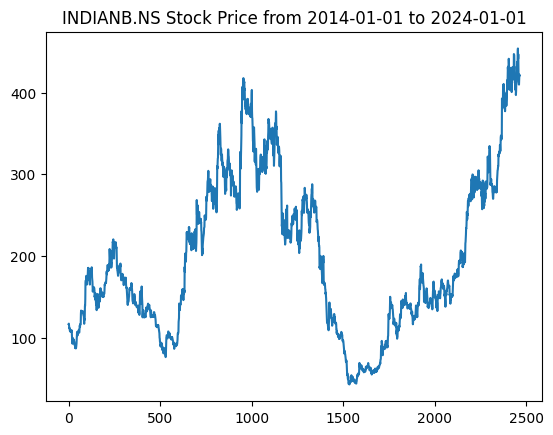

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0710, Validation Loss: 0.0540
Epoch [2/33], Loss: 0.0876, Validation Loss: 0.0163
Epoch [3/33], Loss: 0.0632, Validation Loss: 0.0107
Epoch [4/33], Loss: 0.0501, Validation Loss: 0.0312
Epoch [5/33], Loss: 0.0095, Validation Loss: 0.0040
Epoch [6/33], Loss: 0.0040, Validation Loss: 0.0039
Epoch [7/33], Loss: 0.0023, Validation Loss: 0.0015
Epoch [8/33], Loss: 0.0028, Validation Loss: 0.0014
Epoch [9/33], Loss: 0.0021, Validation Loss: 0.0011
Epoch [10/33], Loss: 0.0020, Validation Loss: 0.0019
Epoch [11/33], Loss: 0.0023, Validation Loss: 0.0019
Epoch [12/33], Loss: 0.0026, Validation Loss: 0.0020
Epoch [13/33], Loss: 0.0028, Validation Loss: 0.0030
Epoch [14/33], Loss: 0.0034, Validation Loss: 0.0033
Epoch [15/33], Loss: 0.0031, Validation Loss: 0.0029
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0018
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0021, Validation Loss: 0.0013
Epoch [19/33], Loss: 0.0020, Validation Loss: 0.0021
Ep

[*********************100%***********************]  1 of 1 completed


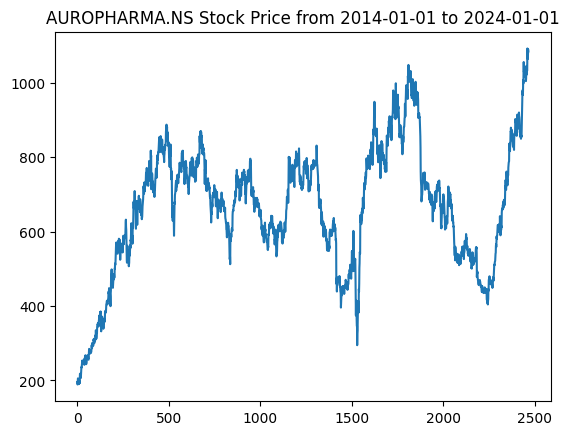

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0416, Validation Loss: 0.1188
Epoch [2/33], Loss: 0.0455, Validation Loss: 0.0726
Epoch [3/33], Loss: 0.0318, Validation Loss: 0.0393
Epoch [4/33], Loss: 0.0148, Validation Loss: 0.0091
Epoch [5/33], Loss: 0.0061, Validation Loss: 0.0089
Epoch [6/33], Loss: 0.0044, Validation Loss: 0.0009
Epoch [7/33], Loss: 0.0028, Validation Loss: 0.0009
Epoch [8/33], Loss: 0.0026, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0025, Validation Loss: 0.0011
Epoch [10/33], Loss: 0.0032, Validation Loss: 0.0024
Epoch [11/33], Loss: 0.0024, Validation Loss: 0.0014
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0011
Epoch [13/33], Loss: 0.0022, Validation Loss: 0.0016
Epoch [14/33], Loss: 0.0027, Validation Loss: 0.0013
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0049, Validation Loss: 0.0048
Epoch [17/33], Loss: 0.0028, Validation Loss: 0.0048
Epoch [18/33], Loss: 0.0044, Validation Loss: 0.0016
Epoch [19/33], Loss: 0.0023, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


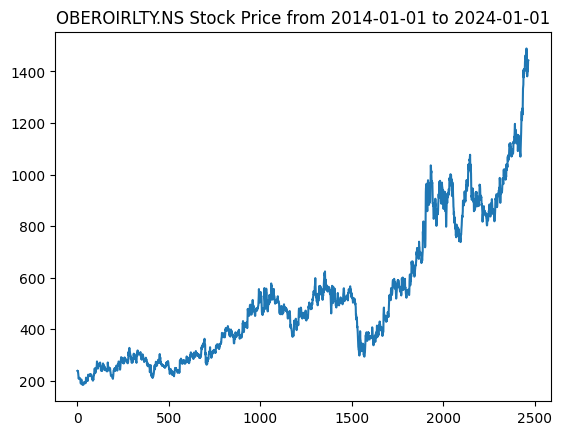

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0132, Validation Loss: 0.0869
Epoch [2/33], Loss: 0.0275, Validation Loss: 0.0916
Epoch [3/33], Loss: 0.0262, Validation Loss: 0.1071
Epoch [4/33], Loss: 0.0230, Validation Loss: 0.1043
Epoch [5/33], Loss: 0.0169, Validation Loss: 0.0413
Epoch [6/33], Loss: 0.0252, Validation Loss: 0.0342
Epoch [7/33], Loss: 0.0209, Validation Loss: 0.1188
Epoch [8/33], Loss: 0.0060, Validation Loss: 0.0018
Epoch [9/33], Loss: 0.0051, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0068, Validation Loss: 0.0049
Epoch [11/33], Loss: 0.0107, Validation Loss: 0.0695
Epoch [12/33], Loss: 0.0073, Validation Loss: 0.0091
Epoch [13/33], Loss: 0.0021, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0007, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0009, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0010, Validation Loss: 0.0028
Epoch [17/33], Loss: 0.0014, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0006, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0009, Validation Loss: 0.0013
Ep

[*********************100%***********************]  1 of 1 completed


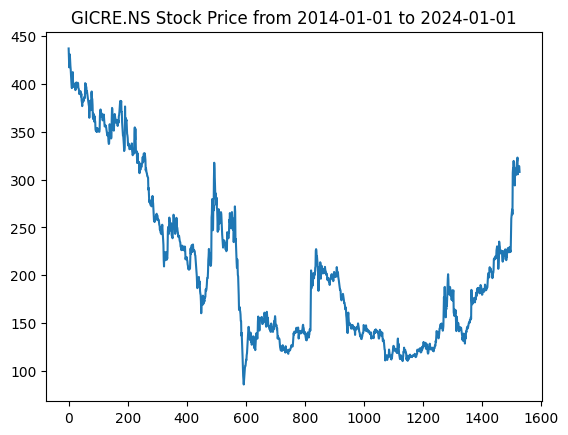

Epoch [1/33], Loss: 0.1588, Validation Loss: 0.0075
Epoch [2/33], Loss: 0.0978, Validation Loss: 0.0061
Epoch [3/33], Loss: 0.0657, Validation Loss: 0.0025
Epoch [4/33], Loss: 0.0545, Validation Loss: 0.0013
Epoch [5/33], Loss: 0.0084, Validation Loss: 0.0012
Epoch [6/33], Loss: 0.0060, Validation Loss: 0.0009
Epoch [7/33], Loss: 0.0105, Validation Loss: 0.0010
Epoch [8/33], Loss: 0.0025, Validation Loss: 0.0013
Epoch [9/33], Loss: 0.0051, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0053, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0099, Validation Loss: 0.0008
Epoch [12/33], Loss: 0.0051, Validation Loss: 0.0012
Epoch [13/33], Loss: 0.0161, Validation Loss: 0.0015
Epoch [14/33], Loss: 0.0037, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0099, Validation Loss: 0.0017
Epoch [16/33], Loss: 0.0053, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0083, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0031, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0056, Validation Loss: 0.0011
Ep

[*********************100%***********************]  1 of 1 completed


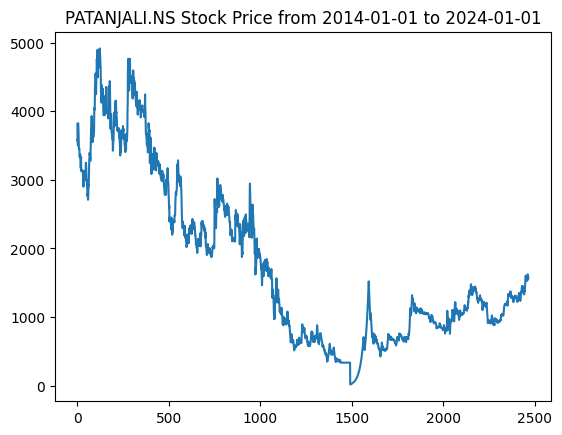

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1147, Validation Loss: 0.0185
Epoch [2/33], Loss: 0.1330, Validation Loss: 0.0027
Epoch [3/33], Loss: 0.1005, Validation Loss: 0.0069
Epoch [4/33], Loss: 0.0439, Validation Loss: 0.0008
Epoch [5/33], Loss: 0.0138, Validation Loss: 0.0003
Epoch [6/33], Loss: 0.0135, Validation Loss: 0.0002
Epoch [7/33], Loss: 0.0071, Validation Loss: 0.0033
Epoch [8/33], Loss: 0.0060, Validation Loss: 0.0024
Epoch [9/33], Loss: 0.0041, Validation Loss: 0.0033
Epoch [10/33], Loss: 0.0040, Validation Loss: 0.0020
Epoch [11/33], Loss: 0.0042, Validation Loss: 0.0027
Epoch [12/33], Loss: 0.0023, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0023, Validation Loss: 0.0011
Epoch [14/33], Loss: 0.0025, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0027, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0048, Validation Loss: 0.0029
Epoch [19/33], Loss: 0.0084, Validation Loss: 0.0019
Ep

[*********************100%***********************]  1 of 1 completed


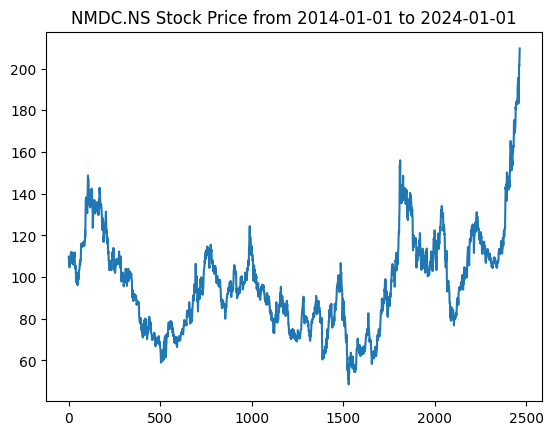

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0393, Validation Loss: 0.0225
Epoch [2/33], Loss: 0.0240, Validation Loss: 0.0253
Epoch [3/33], Loss: 0.0211, Validation Loss: 0.0227
Epoch [4/33], Loss: 0.0154, Validation Loss: 0.0048
Epoch [5/33], Loss: 0.0088, Validation Loss: 0.0026
Epoch [6/33], Loss: 0.0031, Validation Loss: 0.0007
Epoch [7/33], Loss: 0.0021, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0015, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0016, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0015, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0016, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0012, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0014, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0018, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0005
Epoch [17/33], Loss: 0.0018, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0018, Validation Loss: 0.0008
Epoch [19/33], Loss: 0.0021, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


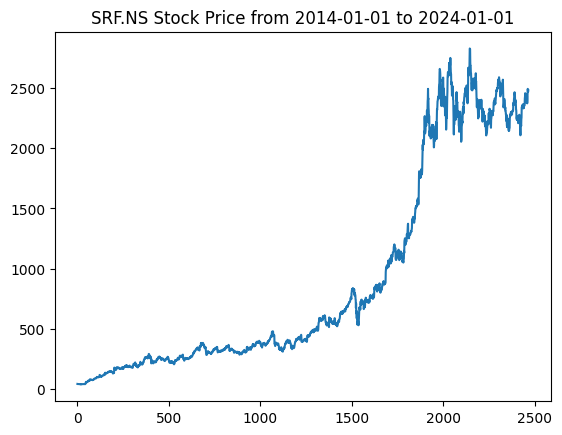

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0024, Validation Loss: 0.0108
Epoch [2/33], Loss: 0.1284, Validation Loss: 0.5418
Epoch [3/33], Loss: 0.0450, Validation Loss: 0.4247
Epoch [4/33], Loss: 0.0498, Validation Loss: 0.4215
Epoch [5/33], Loss: 0.0431, Validation Loss: 0.3326
Epoch [6/33], Loss: 0.0239, Validation Loss: 0.0670
Epoch [7/33], Loss: 0.0600, Validation Loss: 0.1932
Epoch [8/33], Loss: 0.0510, Validation Loss: 0.4907
Epoch [9/33], Loss: 0.0482, Validation Loss: 0.4389
Epoch [10/33], Loss: 0.0463, Validation Loss: 0.3970
Epoch [11/33], Loss: 0.0408, Validation Loss: 0.3252
Epoch [12/33], Loss: 0.0300, Validation Loss: 0.1644
Epoch [13/33], Loss: 0.0160, Validation Loss: 0.0034
Epoch [14/33], Loss: 0.0209, Validation Loss: 0.0117
Epoch [15/33], Loss: 0.0407, Validation Loss: 0.3877
Epoch [16/33], Loss: 0.0323, Validation Loss: 0.2931
Epoch [17/33], Loss: 0.0231, Validation Loss: 0.1539
Epoch [18/33], Loss: 0.0087, Validation Loss: 0.0149
Epoch [19/33], Loss: 0.0067, Validation Loss: 0.0013
Ep

[*********************100%***********************]  1 of 1 completed


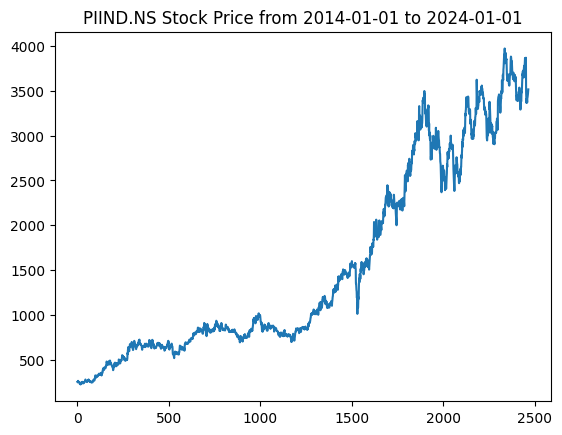

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0063, Validation Loss: 0.0065
Epoch [2/33], Loss: 0.1088, Validation Loss: 0.3064
Epoch [3/33], Loss: 0.0538, Validation Loss: 0.2060
Epoch [4/33], Loss: 0.0559, Validation Loss: 0.1588
Epoch [5/33], Loss: 0.0238, Validation Loss: 0.1206
Epoch [6/33], Loss: 0.0397, Validation Loss: 0.1249
Epoch [7/33], Loss: 0.0122, Validation Loss: 0.0085
Epoch [8/33], Loss: 0.0075, Validation Loss: 0.0195
Epoch [9/33], Loss: 0.0028, Validation Loss: 0.0010
Epoch [10/33], Loss: 0.0045, Validation Loss: 0.0014
Epoch [11/33], Loss: 0.0041, Validation Loss: 0.0016
Epoch [12/33], Loss: 0.0067, Validation Loss: 0.0115
Epoch [13/33], Loss: 0.0016, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0037, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0032, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0019, Validation Loss: 0.0005
Epoch [17/33], Loss: 0.0017, Validation Loss: 0.0032
Epoch [18/33], Loss: 0.0028, Validation Loss: 0.0020
Epoch [19/33], Loss: 0.0076, Validation Loss: 0.0161
Ep

[*********************100%***********************]  1 of 1 completed


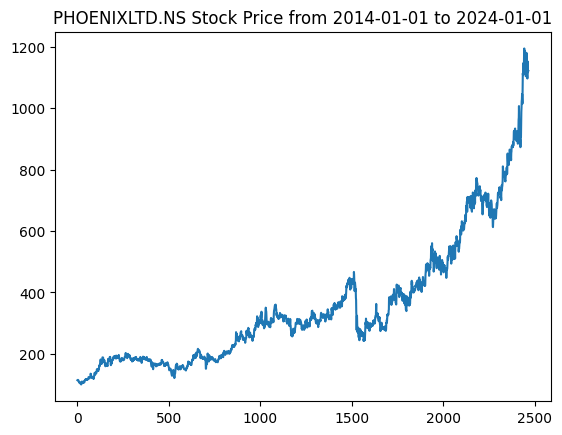

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0064, Validation Loss: 0.0623
Epoch [2/33], Loss: 0.0161, Validation Loss: 0.0609
Epoch [3/33], Loss: 0.0176, Validation Loss: 0.0869
Epoch [4/33], Loss: 0.0148, Validation Loss: 0.1037
Epoch [5/33], Loss: 0.0117, Validation Loss: 0.0977
Epoch [6/33], Loss: 0.0112, Validation Loss: 0.0905
Epoch [7/33], Loss: 0.0104, Validation Loss: 0.0705
Epoch [8/33], Loss: 0.0099, Validation Loss: 0.0103
Epoch [9/33], Loss: 0.0080, Validation Loss: 0.0460
Epoch [10/33], Loss: 0.0115, Validation Loss: 0.0862
Epoch [11/33], Loss: 0.0050, Validation Loss: 0.0064
Epoch [12/33], Loss: 0.0061, Validation Loss: 0.0304
Epoch [13/33], Loss: 0.0028, Validation Loss: 0.0062
Epoch [14/33], Loss: 0.0006, Validation Loss: 0.0087
Epoch [15/33], Loss: 0.0004, Validation Loss: 0.0061
Epoch [16/33], Loss: 0.0004, Validation Loss: 0.0064
Epoch [17/33], Loss: 0.0004, Validation Loss: 0.0037
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0020
Epoch [19/33], Loss: 0.0004, Validation Loss: 0.0039
Ep

<ipython-input-11-55953d5f2d50>:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  locals()[results_name] = pd.concat([locals()[results_name], new_row], ignore_index=True)
[*********************100%***********************]  1 of 1 completed


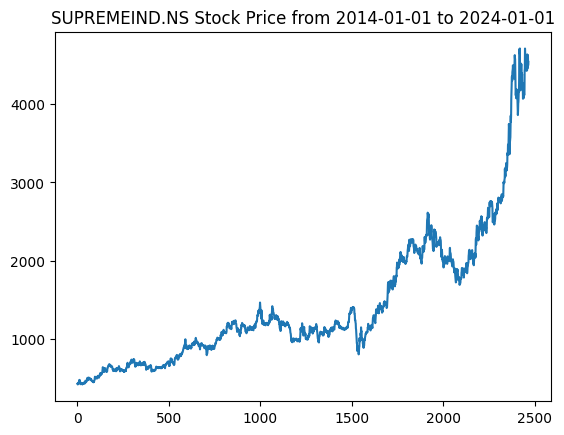

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0118, Validation Loss: 0.0103
Epoch [2/33], Loss: 0.0258, Validation Loss: 0.0202
Epoch [3/33], Loss: 0.0231, Validation Loss: 0.0372
Epoch [4/33], Loss: 0.0182, Validation Loss: 0.0380
Epoch [5/33], Loss: 0.0163, Validation Loss: 0.0305
Epoch [6/33], Loss: 0.0134, Validation Loss: 0.0101
Epoch [7/33], Loss: 0.0103, Validation Loss: 0.0071
Epoch [8/33], Loss: 0.0110, Validation Loss: 0.0160
Epoch [9/33], Loss: 0.0049, Validation Loss: 0.0002
Epoch [10/33], Loss: 0.0013, Validation Loss: 0.0003
Epoch [11/33], Loss: 0.0005, Validation Loss: 0.0002
Epoch [12/33], Loss: 0.0005, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0005, Validation Loss: 0.0007
Epoch [14/33], Loss: 0.0013, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0030, Validation Loss: 0.0052
Epoch [16/33], Loss: 0.0017, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0036, Validation Loss: 0.0047
Epoch [18/33], Loss: 0.0036, Validation Loss: 0.0028
Epoch [19/33], Loss: 0.0053, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


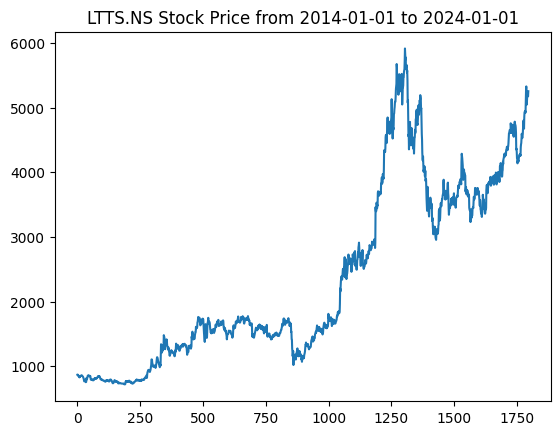

Epoch [1/33], Loss: 0.0596, Validation Loss: 0.0350
Epoch [2/33], Loss: 0.1049, Validation Loss: 0.1396
Epoch [3/33], Loss: 0.0540, Validation Loss: 0.0570
Epoch [4/33], Loss: 0.0341, Validation Loss: 0.0455
Epoch [5/33], Loss: 0.1427, Validation Loss: 0.1355
Epoch [6/33], Loss: 0.0819, Validation Loss: 0.1661
Epoch [7/33], Loss: 0.0637, Validation Loss: 0.1057
Epoch [8/33], Loss: 0.0492, Validation Loss: 0.0479
Epoch [9/33], Loss: 0.0095, Validation Loss: 0.0031
Epoch [10/33], Loss: 0.0081, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0275, Validation Loss: 0.0781
Epoch [12/33], Loss: 0.0499, Validation Loss: 0.0769
Epoch [13/33], Loss: 0.0551, Validation Loss: 0.0771
Epoch [14/33], Loss: 0.0277, Validation Loss: 0.0272
Epoch [15/33], Loss: 0.0062, Validation Loss: 0.0012
Epoch [16/33], Loss: 0.0044, Validation Loss: 0.0010
Epoch [17/33], Loss: 0.0026, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0035, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0024, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


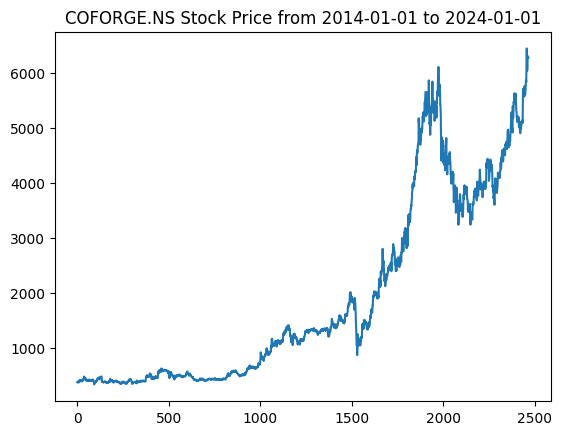

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0137, Validation Loss: 0.0889
Epoch [2/33], Loss: 0.1476, Validation Loss: 0.2000
Epoch [3/33], Loss: 0.0619, Validation Loss: 0.1663
Epoch [4/33], Loss: 0.0629, Validation Loss: 0.1502
Epoch [5/33], Loss: 0.0566, Validation Loss: 0.1122
Epoch [6/33], Loss: 0.0122, Validation Loss: 0.0008
Epoch [7/33], Loss: 0.0164, Validation Loss: 0.0331
Epoch [8/33], Loss: 0.0240, Validation Loss: 0.0112
Epoch [9/33], Loss: 0.0172, Validation Loss: 0.1233
Epoch [10/33], Loss: 0.0297, Validation Loss: 0.0041
Epoch [11/33], Loss: 0.0881, Validation Loss: 0.0134
Epoch [12/33], Loss: 0.1020, Validation Loss: 0.1085
Epoch [13/33], Loss: 0.0750, Validation Loss: 0.1376
Epoch [14/33], Loss: 0.0487, Validation Loss: 0.0965
Epoch [15/33], Loss: 0.0143, Validation Loss: 0.0037
Epoch [16/33], Loss: 0.0213, Validation Loss: 0.0441
Epoch [17/33], Loss: 0.0212, Validation Loss: 0.0372
Epoch [18/33], Loss: 0.0127, Validation Loss: 0.0023
Epoch [19/33], Loss: 0.0050, Validation Loss: 0.0021
Ep

[*********************100%***********************]  1 of 1 completed


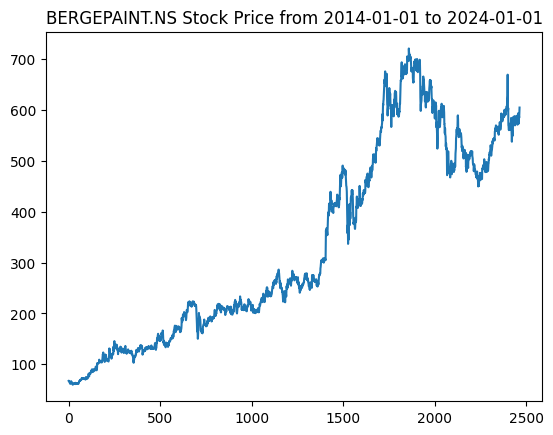

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0061, Validation Loss: 0.0118
Epoch [2/33], Loss: 0.1705, Validation Loss: 0.1465
Epoch [3/33], Loss: 0.0992, Validation Loss: 0.0948
Epoch [4/33], Loss: 0.0727, Validation Loss: 0.0010
Epoch [5/33], Loss: 0.0799, Validation Loss: 0.1248
Epoch [6/33], Loss: 0.0157, Validation Loss: 0.0004
Epoch [7/33], Loss: 0.0217, Validation Loss: 0.0205
Epoch [8/33], Loss: 0.0202, Validation Loss: 0.0041
Epoch [9/33], Loss: 0.0202, Validation Loss: 0.0066
Epoch [10/33], Loss: 0.0171, Validation Loss: 0.0034
Epoch [11/33], Loss: 0.0203, Validation Loss: 0.0019
Epoch [12/33], Loss: 0.0105, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0145, Validation Loss: 0.0030
Epoch [14/33], Loss: 0.0109, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0153, Validation Loss: 0.0031
Epoch [16/33], Loss: 0.0145, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0171, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0043, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0092, Validation Loss: 0.0017
Ep

[*********************100%***********************]  1 of 1 completed


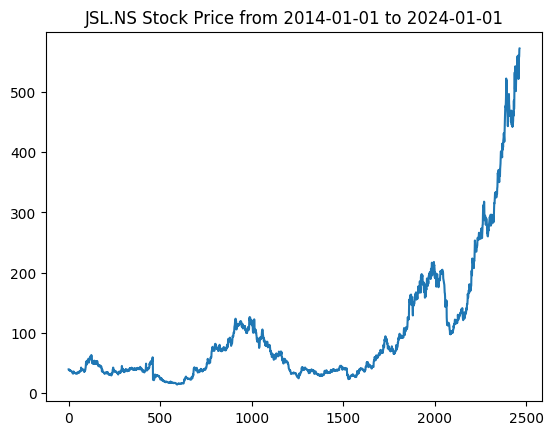

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0099, Validation Loss: 0.0295
Epoch [2/33], Loss: 0.0080, Validation Loss: 0.0274
Epoch [3/33], Loss: 0.0081, Validation Loss: 0.0281
Epoch [4/33], Loss: 0.0079, Validation Loss: 0.0273
Epoch [5/33], Loss: 0.0073, Validation Loss: 0.0237
Epoch [6/33], Loss: 0.0072, Validation Loss: 0.0214
Epoch [7/33], Loss: 0.0040, Validation Loss: 0.0999
Epoch [8/33], Loss: 0.0034, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0028, Validation Loss: 0.0038
Epoch [10/33], Loss: 0.0012, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0010, Validation Loss: 0.0006
Epoch [12/33], Loss: 0.0019, Validation Loss: 0.0033
Epoch [13/33], Loss: 0.0011, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0013, Validation Loss: 0.0022
Epoch [15/33], Loss: 0.0009, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0029, Validation Loss: 0.0091
Epoch [17/33], Loss: 0.0012, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0005, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


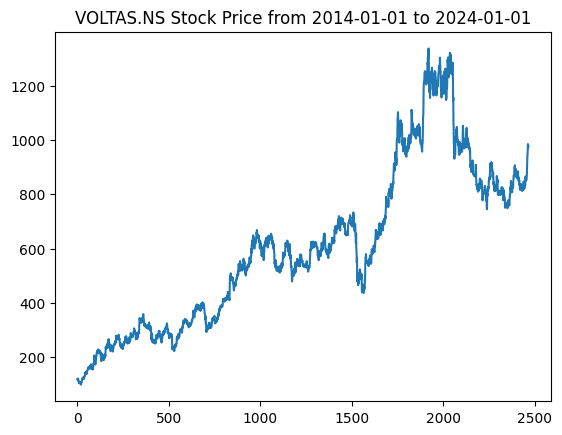

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0176, Validation Loss: 0.1112
Epoch [2/33], Loss: 0.1660, Validation Loss: 0.2124
Epoch [3/33], Loss: 0.0470, Validation Loss: 0.0631
Epoch [4/33], Loss: 0.0746, Validation Loss: 0.0969
Epoch [5/33], Loss: 0.0221, Validation Loss: 0.0060
Epoch [6/33], Loss: 0.0078, Validation Loss: 0.0012
Epoch [7/33], Loss: 0.0028, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0048, Validation Loss: 0.0014
Epoch [9/33], Loss: 0.0022, Validation Loss: 0.0019
Epoch [10/33], Loss: 0.0024, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0043, Validation Loss: 0.0048
Epoch [12/33], Loss: 0.0023, Validation Loss: 0.0130
Epoch [13/33], Loss: 0.0029, Validation Loss: 0.0097
Epoch [14/33], Loss: 0.0114, Validation Loss: 0.0251
Epoch [15/33], Loss: 0.0021, Validation Loss: 0.0016
Epoch [16/33], Loss: 0.0086, Validation Loss: 0.0105
Epoch [17/33], Loss: 0.0029, Validation Loss: 0.0013
Epoch [18/33], Loss: 0.0072, Validation Loss: 0.0019
Epoch [19/33], Loss: 0.0038, Validation Loss: 0.0050
Ep

[*********************100%***********************]  1 of 1 completed


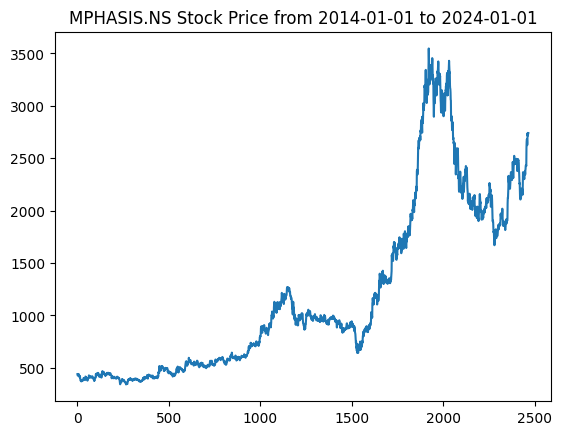

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0453, Validation Loss: 0.1066
Epoch [2/33], Loss: 0.0860, Validation Loss: 0.1848
Epoch [3/33], Loss: 0.0681, Validation Loss: 0.1763
Epoch [4/33], Loss: 0.0645, Validation Loss: 0.1717
Epoch [5/33], Loss: 0.0393, Validation Loss: 0.0313
Epoch [6/33], Loss: 0.0709, Validation Loss: 0.1538
Epoch [7/33], Loss: 0.0674, Validation Loss: 0.2142
Epoch [8/33], Loss: 0.0658, Validation Loss: 0.1979
Epoch [9/33], Loss: 0.0587, Validation Loss: 0.1726
Epoch [10/33], Loss: 0.0471, Validation Loss: 0.1050
Epoch [11/33], Loss: 0.0148, Validation Loss: 0.0015
Epoch [12/33], Loss: 0.0310, Validation Loss: 0.0381
Epoch [13/33], Loss: 0.0154, Validation Loss: 0.0360
Epoch [14/33], Loss: 0.0381, Validation Loss: 0.1175
Epoch [15/33], Loss: 0.0303, Validation Loss: 0.0525
Epoch [16/33], Loss: 0.0061, Validation Loss: 0.0021
Epoch [17/33], Loss: 0.0033, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0037, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0044, Validation Loss: 0.0034
Ep

[*********************100%***********************]  1 of 1 completed


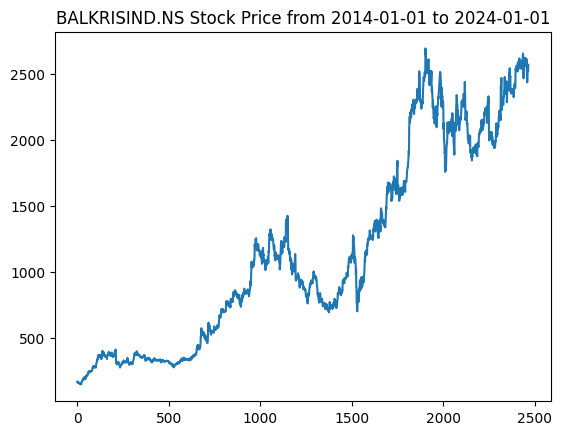

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0355, Validation Loss: 0.0022
Epoch [2/33], Loss: 0.1449, Validation Loss: 0.2584
Epoch [3/33], Loss: 0.0333, Validation Loss: 0.0057
Epoch [4/33], Loss: 0.0273, Validation Loss: 0.0453
Epoch [5/33], Loss: 0.0225, Validation Loss: 0.0019
Epoch [6/33], Loss: 0.0259, Validation Loss: 0.0568
Epoch [7/33], Loss: 0.0236, Validation Loss: 0.0232
Epoch [8/33], Loss: 0.0264, Validation Loss: 0.0042
Epoch [9/33], Loss: 0.0133, Validation Loss: 0.0118
Epoch [10/33], Loss: 0.0145, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0067, Validation Loss: 0.0048
Epoch [12/33], Loss: 0.0104, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0068, Validation Loss: 0.0050
Epoch [14/33], Loss: 0.0094, Validation Loss: 0.0004
Epoch [15/33], Loss: 0.0056, Validation Loss: 0.0032
Epoch [16/33], Loss: 0.0082, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0058, Validation Loss: 0.0030
Epoch [18/33], Loss: 0.0097, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0101, Validation Loss: 0.0093
Ep

[*********************100%***********************]  1 of 1 completed


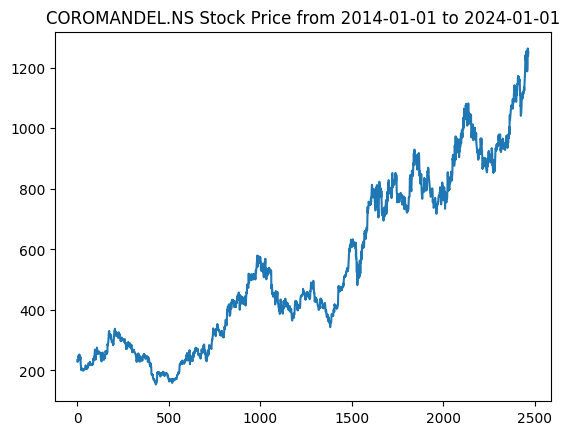

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0179, Validation Loss: 0.0309
Epoch [2/33], Loss: 0.0735, Validation Loss: 0.2135
Epoch [3/33], Loss: 0.0489, Validation Loss: 0.1810
Epoch [4/33], Loss: 0.0432, Validation Loss: 0.1191
Epoch [5/33], Loss: 0.0200, Validation Loss: 0.0015
Epoch [6/33], Loss: 0.0180, Validation Loss: 0.0023
Epoch [7/33], Loss: 0.0142, Validation Loss: 0.0401
Epoch [8/33], Loss: 0.0017, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0016, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0013, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0012, Validation Loss: 0.0007
Epoch [12/33], Loss: 0.0007, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0008, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0008, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0009, Validation Loss: 0.0019
Epoch [16/33], Loss: 0.0012, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0014, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0010, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


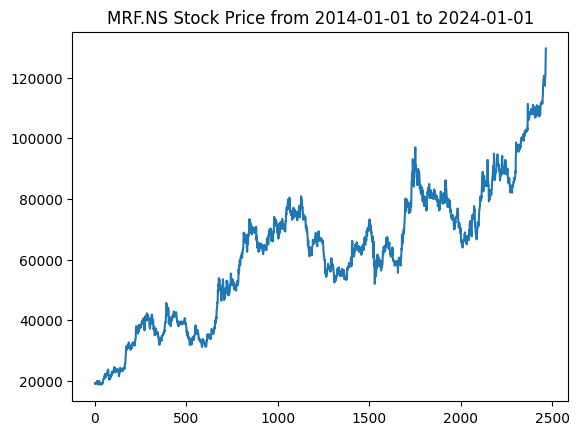

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0289, Validation Loss: 0.0268
Epoch [2/33], Loss: 0.0378, Validation Loss: 0.0104
Epoch [3/33], Loss: 0.0630, Validation Loss: 0.0057
Epoch [4/33], Loss: 0.0476, Validation Loss: 0.0093
Epoch [5/33], Loss: 0.0292, Validation Loss: 0.0028
Epoch [6/33], Loss: 0.0115, Validation Loss: 0.0023
Epoch [7/33], Loss: 0.0027, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0033, Validation Loss: 0.0008
Epoch [9/33], Loss: 0.0026, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0020, Validation Loss: 0.0008
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0007
Epoch [12/33], Loss: 0.0014, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0018, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0017, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0019, Validation Loss: 0.0010
Epoch [17/33], Loss: 0.0035, Validation Loss: 0.0016
Epoch [18/33], Loss: 0.0032, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


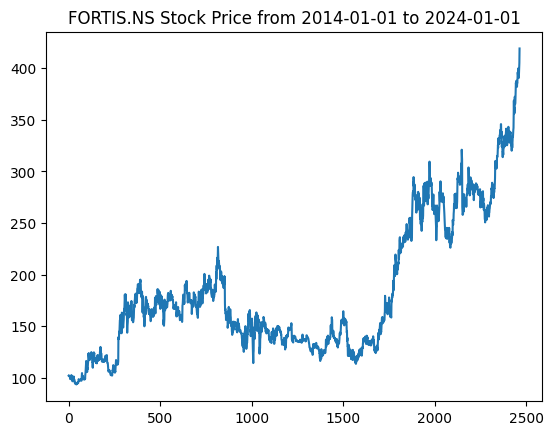

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0255, Validation Loss: 0.1409
Epoch [2/33], Loss: 0.0274, Validation Loss: 0.1482
Epoch [3/33], Loss: 0.0229, Validation Loss: 0.1234
Epoch [4/33], Loss: 0.0199, Validation Loss: 0.0963
Epoch [5/33], Loss: 0.0290, Validation Loss: 0.0931
Epoch [6/33], Loss: 0.0071, Validation Loss: 0.0155
Epoch [7/33], Loss: 0.0326, Validation Loss: 0.1134
Epoch [8/33], Loss: 0.0117, Validation Loss: 0.0423
Epoch [9/33], Loss: 0.0026, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0081, Validation Loss: 0.0271
Epoch [11/33], Loss: 0.0032, Validation Loss: 0.0007
Epoch [12/33], Loss: 0.0109, Validation Loss: 0.0476
Epoch [13/33], Loss: 0.0022, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0011
Epoch [15/33], Loss: 0.0028, Validation Loss: 0.0071
Epoch [16/33], Loss: 0.0019, Validation Loss: 0.0018
Epoch [17/33], Loss: 0.0011, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0010, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0012, Validation Loss: 0.0015
Ep

[*********************100%***********************]  1 of 1 completed


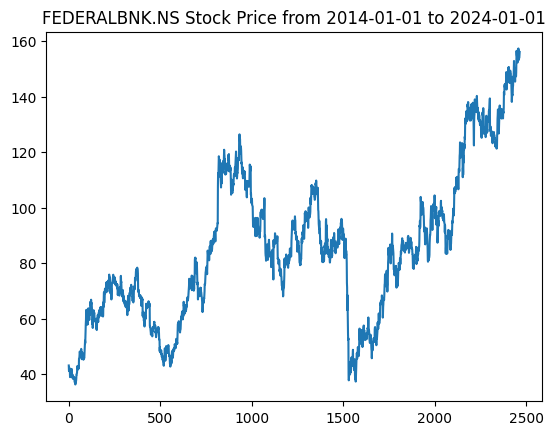

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0465, Validation Loss: 0.1348
Epoch [2/33], Loss: 0.0371, Validation Loss: 0.0656
Epoch [3/33], Loss: 0.0332, Validation Loss: 0.0493
Epoch [4/33], Loss: 0.0258, Validation Loss: 0.0547
Epoch [5/33], Loss: 0.0130, Validation Loss: 0.0202
Epoch [6/33], Loss: 0.0675, Validation Loss: 0.0237
Epoch [7/33], Loss: 0.0161, Validation Loss: 0.0122
Epoch [8/33], Loss: 0.0066, Validation Loss: 0.0145
Epoch [9/33], Loss: 0.0028, Validation Loss: 0.0079
Epoch [10/33], Loss: 0.0020, Validation Loss: 0.0047
Epoch [11/33], Loss: 0.0025, Validation Loss: 0.0009
Epoch [12/33], Loss: 0.0016, Validation Loss: 0.0019
Epoch [13/33], Loss: 0.0016, Validation Loss: 0.0032
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0020
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0017
Epoch [16/33], Loss: 0.0013, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0016
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


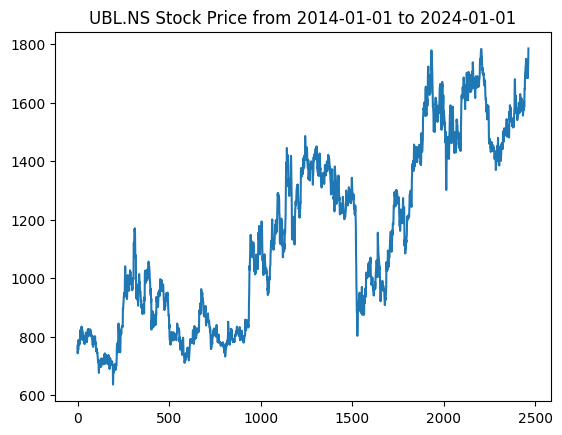

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0513, Validation Loss: 0.0058
Epoch [2/33], Loss: 0.1196, Validation Loss: 0.2408
Epoch [3/33], Loss: 0.0436, Validation Loss: 0.0147
Epoch [4/33], Loss: 0.0363, Validation Loss: 0.0039
Epoch [5/33], Loss: 0.0161, Validation Loss: 0.0165
Epoch [6/33], Loss: 0.0096, Validation Loss: 0.0018
Epoch [7/33], Loss: 0.0083, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0171, Validation Loss: 0.0357
Epoch [9/33], Loss: 0.0081, Validation Loss: 0.0018
Epoch [10/33], Loss: 0.0051, Validation Loss: 0.0018
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0008
Epoch [12/33], Loss: 0.0035, Validation Loss: 0.0033
Epoch [13/33], Loss: 0.0019, Validation Loss: 0.0008
Epoch [14/33], Loss: 0.0019, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0040, Validation Loss: 0.0011
Epoch [16/33], Loss: 0.0082, Validation Loss: 0.0063
Epoch [17/33], Loss: 0.0073, Validation Loss: 0.0030
Epoch [18/33], Loss: 0.0040, Validation Loss: 0.0009
Epoch [19/33], Loss: 0.0024, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


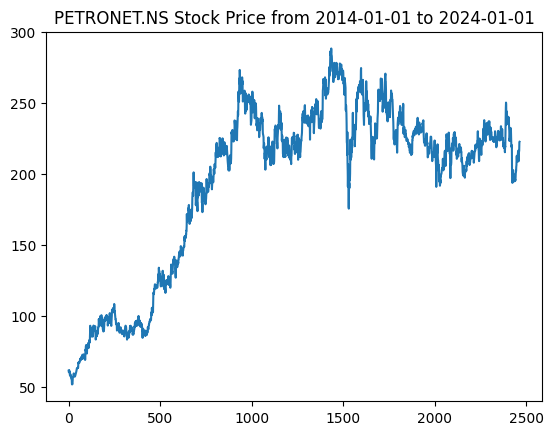

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0352, Validation Loss: 0.0408
Epoch [2/33], Loss: 0.1915, Validation Loss: 0.0428
Epoch [3/33], Loss: 0.1424, Validation Loss: 0.0155
Epoch [4/33], Loss: 0.0787, Validation Loss: 0.0022
Epoch [5/33], Loss: 0.0241, Validation Loss: 0.0226
Epoch [6/33], Loss: 0.0609, Validation Loss: 0.0067
Epoch [7/33], Loss: 0.0386, Validation Loss: 0.0343
Epoch [8/33], Loss: 0.0236, Validation Loss: 0.0374
Epoch [9/33], Loss: 0.0154, Validation Loss: 0.0037
Epoch [10/33], Loss: 0.0107, Validation Loss: 0.0104
Epoch [11/33], Loss: 0.0088, Validation Loss: 0.0056
Epoch [12/33], Loss: 0.0090, Validation Loss: 0.0042
Epoch [13/33], Loss: 0.0110, Validation Loss: 0.0122
Epoch [14/33], Loss: 0.0122, Validation Loss: 0.0233
Epoch [15/33], Loss: 0.0106, Validation Loss: 0.0162
Epoch [16/33], Loss: 0.0077, Validation Loss: 0.0016
Epoch [17/33], Loss: 0.0079, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0098, Validation Loss: 0.0018
Epoch [19/33], Loss: 0.0058, Validation Loss: 0.0025
Ep

[*********************100%***********************]  1 of 1 completed


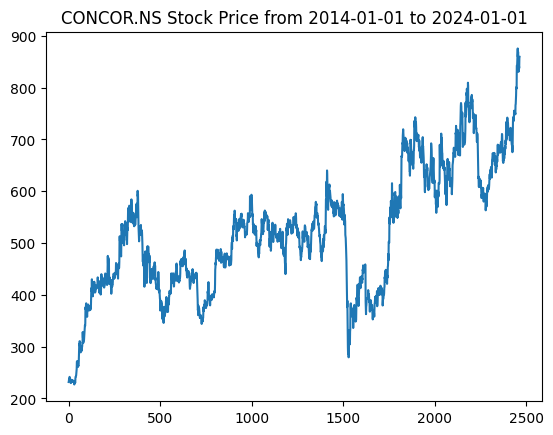

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0403, Validation Loss: 0.0666
Epoch [2/33], Loss: 0.0209, Validation Loss: 0.0227
Epoch [3/33], Loss: 0.0214, Validation Loss: 0.0056
Epoch [4/33], Loss: 0.0160, Validation Loss: 0.0125
Epoch [5/33], Loss: 0.0102, Validation Loss: 0.0016
Epoch [6/33], Loss: 0.0093, Validation Loss: 0.0049
Epoch [7/33], Loss: 0.0027, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0024, Validation Loss: 0.0012
Epoch [9/33], Loss: 0.0020, Validation Loss: 0.0012
Epoch [10/33], Loss: 0.0022, Validation Loss: 0.0015
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0022
Epoch [12/33], Loss: 0.0023, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0011
Epoch [16/33], Loss: 0.0016, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0014
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


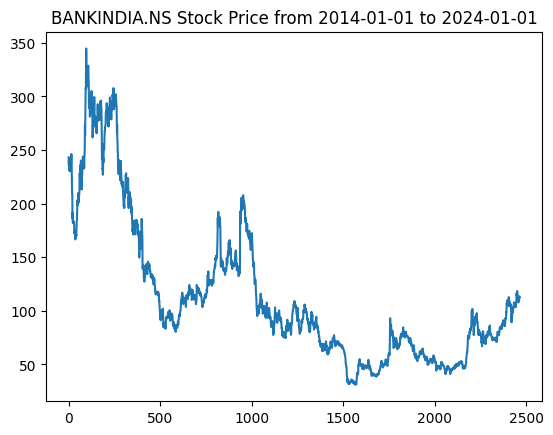

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0909, Validation Loss: 0.0027
Epoch [2/33], Loss: 0.0786, Validation Loss: 0.0058
Epoch [3/33], Loss: 0.0657, Validation Loss: 0.0015
Epoch [4/33], Loss: 0.0396, Validation Loss: 0.0021
Epoch [5/33], Loss: 0.0264, Validation Loss: 0.0017
Epoch [6/33], Loss: 0.0057, Validation Loss: 0.0010
Epoch [7/33], Loss: 0.0072, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0144, Validation Loss: 0.0019
Epoch [9/33], Loss: 0.0056, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0110, Validation Loss: 0.0019
Epoch [11/33], Loss: 0.0055, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0095, Validation Loss: 0.0021
Epoch [13/33], Loss: 0.0041, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0080, Validation Loss: 0.0017
Epoch [15/33], Loss: 0.0041, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0072, Validation Loss: 0.0019
Epoch [17/33], Loss: 0.0038, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0071, Validation Loss: 0.0024
Epoch [19/33], Loss: 0.0034, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


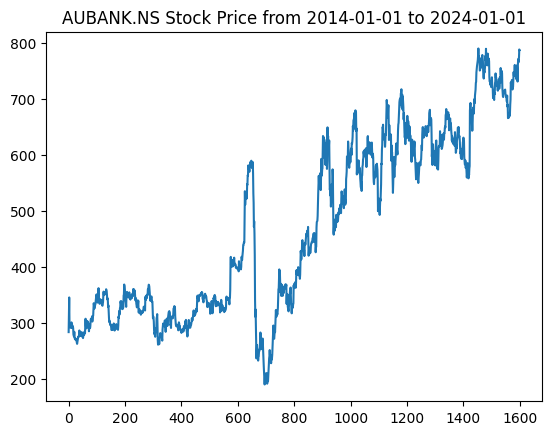

Epoch [1/33], Loss: 0.0351, Validation Loss: 0.0430
Epoch [2/33], Loss: 0.1638, Validation Loss: 0.2733
Epoch [3/33], Loss: 0.0402, Validation Loss: 0.0252
Epoch [4/33], Loss: 0.0998, Validation Loss: 0.1431
Epoch [5/33], Loss: 0.0294, Validation Loss: 0.0051
Epoch [6/33], Loss: 0.0261, Validation Loss: 0.0015
Epoch [7/33], Loss: 0.0052, Validation Loss: 0.0043
Epoch [8/33], Loss: 0.0058, Validation Loss: 0.0050
Epoch [9/33], Loss: 0.0029, Validation Loss: 0.0013
Epoch [10/33], Loss: 0.0025, Validation Loss: 0.0010
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0019
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0027, Validation Loss: 0.0012
Epoch [15/33], Loss: 0.0026, Validation Loss: 0.0017
Epoch [16/33], Loss: 0.0026, Validation Loss: 0.0010
Epoch [17/33], Loss: 0.0027, Validation Loss: 0.0013
Epoch [18/33], Loss: 0.0026, Validation Loss: 0.0013
Epoch [19/33], Loss: 0.0026, Validation Loss: 0.0014
Ep

[*********************100%***********************]  1 of 1 completed


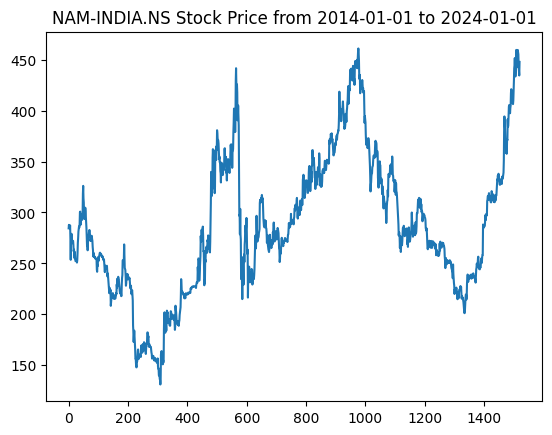

Epoch [1/33], Loss: 0.0461, Validation Loss: 0.0534
Epoch [2/33], Loss: 0.1088, Validation Loss: 0.0055
Epoch [3/33], Loss: 0.0426, Validation Loss: 0.0934
Epoch [4/33], Loss: 0.0786, Validation Loss: 0.0119
Epoch [5/33], Loss: 0.0320, Validation Loss: 0.0430
Epoch [6/33], Loss: 0.0333, Validation Loss: 0.0243
Epoch [7/33], Loss: 0.0126, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0033, Validation Loss: 0.0004
Epoch [9/33], Loss: 0.0030, Validation Loss: 0.0009
Epoch [10/33], Loss: 0.0038, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0041, Validation Loss: 0.0012
Epoch [12/33], Loss: 0.0045, Validation Loss: 0.0024
Epoch [13/33], Loss: 0.0056, Validation Loss: 0.0019
Epoch [14/33], Loss: 0.0057, Validation Loss: 0.0031
Epoch [15/33], Loss: 0.0059, Validation Loss: 0.0023
Epoch [16/33], Loss: 0.0048, Validation Loss: 0.0019
Epoch [17/33], Loss: 0.0038, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0031, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0031, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0048, Validation Loss: 0.0002


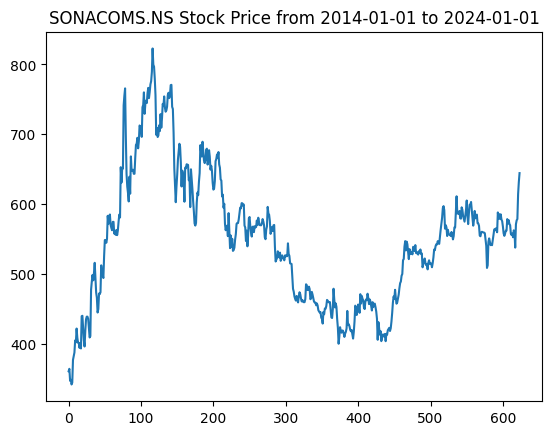

Epoch [1/33], Loss: 0.1980, Validation Loss: 0.0212
Epoch [2/33], Loss: 0.1036, Validation Loss: 0.0036
Epoch [3/33], Loss: 0.0358, Validation Loss: 0.0390
Epoch [4/33], Loss: 0.0600, Validation Loss: 0.0217
Epoch [5/33], Loss: 0.0538, Validation Loss: 0.0023
Epoch [6/33], Loss: 0.0441, Validation Loss: 0.0007
Epoch [7/33], Loss: 0.0335, Validation Loss: 0.0042
Epoch [8/33], Loss: 0.0294, Validation Loss: 0.0051
Epoch [9/33], Loss: 0.0257, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0100, Validation Loss: 0.0205
Epoch [11/33], Loss: 0.0270, Validation Loss: 0.0009
Epoch [12/33], Loss: 0.0119, Validation Loss: 0.0007
Epoch [13/33], Loss: 0.0045, Validation Loss: 0.0064
Epoch [14/33], Loss: 0.0063, Validation Loss: 0.0032
Epoch [15/33], Loss: 0.0110, Validation Loss: 0.0206
Epoch [16/33], Loss: 0.0177, Validation Loss: 0.0019
Epoch [17/33], Loss: 0.0097, Validation Loss: 0.0014
Epoch [18/33], Loss: 0.0060, Validation Loss: 0.0021
Epoch [19/33], Loss: 0.0051, Validation Loss: 0.0013
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0038, Validation Loss: 0.0014


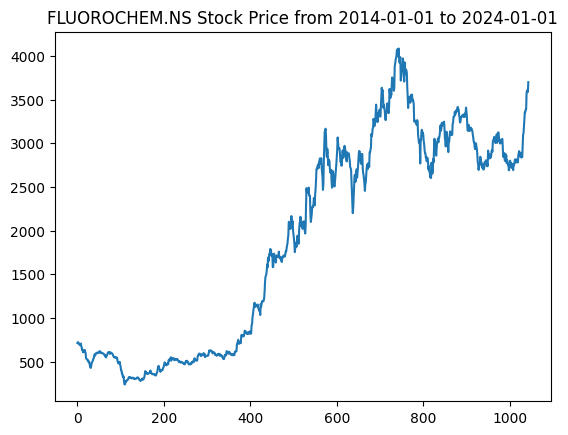

Epoch [1/33], Loss: 0.0605, Validation Loss: 0.0761
Epoch [2/33], Loss: 0.3029, Validation Loss: 0.3033
Epoch [3/33], Loss: 0.1327, Validation Loss: 0.2264
Epoch [4/33], Loss: 0.0739, Validation Loss: 0.0564
Epoch [5/33], Loss: 0.0829, Validation Loss: 0.0210
Epoch [6/33], Loss: 0.0441, Validation Loss: 0.0093
Epoch [7/33], Loss: 0.0290, Validation Loss: 0.0104
Epoch [8/33], Loss: 0.0520, Validation Loss: 0.0690
Epoch [9/33], Loss: 0.0734, Validation Loss: 0.0668
Epoch [10/33], Loss: 0.0065, Validation Loss: 0.0051
Epoch [11/33], Loss: 0.0094, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0046, Validation Loss: 0.0012
Epoch [13/33], Loss: 0.0035, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0031, Validation Loss: 0.0011
Epoch [15/33], Loss: 0.0032, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0029, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0035, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0034, Validation Loss: 0.0013
Epoch [19/33], Loss: 0.0038, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


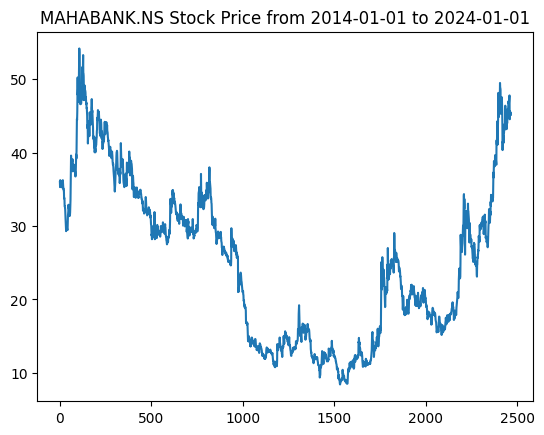

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0759, Validation Loss: 0.0243
Epoch [2/33], Loss: 0.1043, Validation Loss: 0.0089
Epoch [3/33], Loss: 0.0780, Validation Loss: 0.0081
Epoch [4/33], Loss: 0.0558, Validation Loss: 0.0138
Epoch [5/33], Loss: 0.0303, Validation Loss: 0.0024
Epoch [6/33], Loss: 0.0143, Validation Loss: 0.0026
Epoch [7/33], Loss: 0.0081, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0058, Validation Loss: 0.0017
Epoch [9/33], Loss: 0.0038, Validation Loss: 0.0015
Epoch [10/33], Loss: 0.0048, Validation Loss: 0.0029
Epoch [11/33], Loss: 0.0079, Validation Loss: 0.0088
Epoch [12/33], Loss: 0.0072, Validation Loss: 0.0075
Epoch [13/33], Loss: 0.0054, Validation Loss: 0.0057
Epoch [14/33], Loss: 0.0049, Validation Loss: 0.0039
Epoch [15/33], Loss: 0.0062, Validation Loss: 0.0035
Epoch [16/33], Loss: 0.0015, Validation Loss: 0.0009
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0017, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed


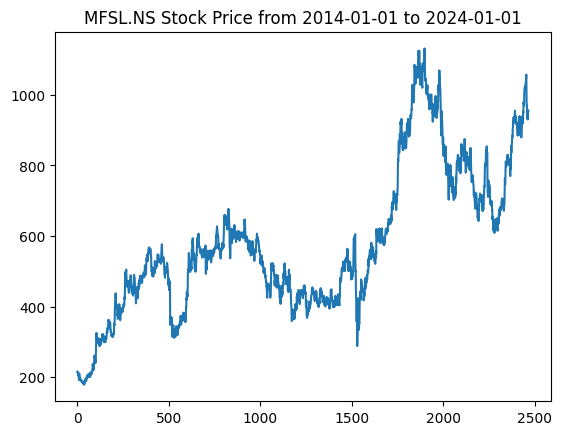

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0402, Validation Loss: 0.0070
Epoch [2/33], Loss: 0.0795, Validation Loss: 0.0345
Epoch [3/33], Loss: 0.0462, Validation Loss: 0.0152
Epoch [4/33], Loss: 0.0175, Validation Loss: 0.0027
Epoch [5/33], Loss: 0.0056, Validation Loss: 0.0044
Epoch [6/33], Loss: 0.0044, Validation Loss: 0.0122
Epoch [7/33], Loss: 0.0115, Validation Loss: 0.0449
Epoch [8/33], Loss: 0.0141, Validation Loss: 0.0008
Epoch [9/33], Loss: 0.0167, Validation Loss: 0.0727
Epoch [10/33], Loss: 0.0311, Validation Loss: 0.0096
Epoch [11/33], Loss: 0.0197, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0132, Validation Loss: 0.0348
Epoch [13/33], Loss: 0.0239, Validation Loss: 0.0062
Epoch [14/33], Loss: 0.0174, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0100, Validation Loss: 0.0085
Epoch [16/33], Loss: 0.0151, Validation Loss: 0.0027
Epoch [17/33], Loss: 0.0095, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0017, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0020, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


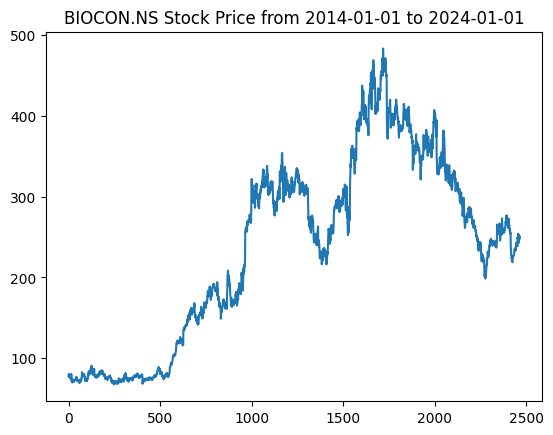

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0398, Validation Loss: 0.0382
Epoch [2/33], Loss: 0.1894, Validation Loss: 0.0887
Epoch [3/33], Loss: 0.0734, Validation Loss: 0.0178
Epoch [4/33], Loss: 0.0762, Validation Loss: 0.0044
Epoch [5/33], Loss: 0.0180, Validation Loss: 0.0281
Epoch [6/33], Loss: 0.0163, Validation Loss: 0.0005
Epoch [7/33], Loss: 0.0171, Validation Loss: 0.0025
Epoch [8/33], Loss: 0.0119, Validation Loss: 0.0377
Epoch [9/33], Loss: 0.0071, Validation Loss: 0.0299
Epoch [10/33], Loss: 0.0115, Validation Loss: 0.0190
Epoch [11/33], Loss: 0.0311, Validation Loss: 0.0009
Epoch [12/33], Loss: 0.0321, Validation Loss: 0.0056
Epoch [13/33], Loss: 0.0112, Validation Loss: 0.0018
Epoch [14/33], Loss: 0.0046, Validation Loss: 0.0012
Epoch [15/33], Loss: 0.0026, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0033, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0025, Validation Loss: 0.0014
Epoch [18/33], Loss: 0.0028, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


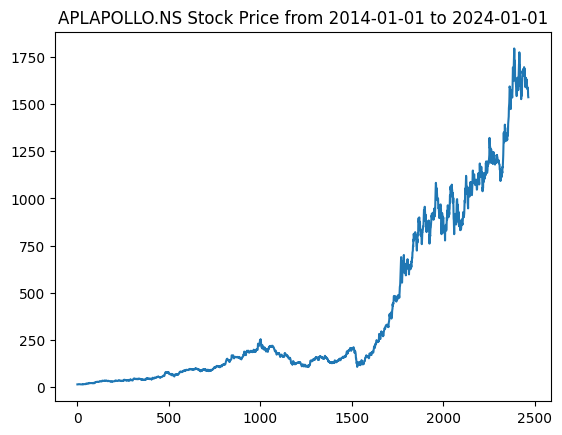

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0190, Validation Loss: 0.0966
Epoch [2/33], Loss: 0.0380, Validation Loss: 0.1904
Epoch [3/33], Loss: 0.0281, Validation Loss: 0.1851
Epoch [4/33], Loss: 0.0263, Validation Loss: 0.1763
Epoch [5/33], Loss: 0.0165, Validation Loss: 0.0543
Epoch [6/33], Loss: 0.1502, Validation Loss: 0.1377
Epoch [7/33], Loss: 0.0273, Validation Loss: 0.2135
Epoch [8/33], Loss: 0.0270, Validation Loss: 0.1893
Epoch [9/33], Loss: 0.0244, Validation Loss: 0.1764
Epoch [10/33], Loss: 0.0198, Validation Loss: 0.1311
Epoch [11/33], Loss: 0.0089, Validation Loss: 0.0155
Epoch [12/33], Loss: 0.0118, Validation Loss: 0.0784
Epoch [13/33], Loss: 0.0166, Validation Loss: 0.1407
Epoch [14/33], Loss: 0.0235, Validation Loss: 0.1403
Epoch [15/33], Loss: 0.0135, Validation Loss: 0.0871
Epoch [16/33], Loss: 0.0052, Validation Loss: 0.0110
Epoch [17/33], Loss: 0.0042, Validation Loss: 0.0011
Epoch [18/33], Loss: 0.0021, Validation Loss: 0.0055
Epoch [19/33], Loss: 0.0036, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


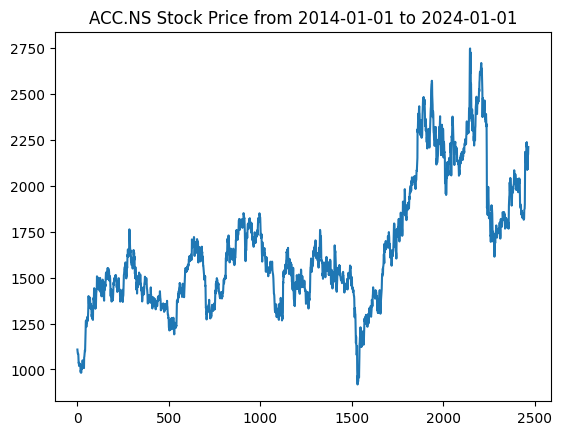

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0407, Validation Loss: 0.1116
Epoch [2/33], Loss: 0.0302, Validation Loss: 0.0737
Epoch [3/33], Loss: 0.0324, Validation Loss: 0.0794
Epoch [4/33], Loss: 0.0238, Validation Loss: 0.0260
Epoch [5/33], Loss: 0.0124, Validation Loss: 0.0043
Epoch [6/33], Loss: 0.0033, Validation Loss: 0.0021
Epoch [7/33], Loss: 0.0031, Validation Loss: 0.0013
Epoch [8/33], Loss: 0.0017, Validation Loss: 0.0029
Epoch [9/33], Loss: 0.0025, Validation Loss: 0.0018
Epoch [10/33], Loss: 0.0027, Validation Loss: 0.0034
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0047
Epoch [12/33], Loss: 0.0028, Validation Loss: 0.0030
Epoch [13/33], Loss: 0.0028, Validation Loss: 0.0049
Epoch [14/33], Loss: 0.0041, Validation Loss: 0.0022
Epoch [15/33], Loss: 0.0039, Validation Loss: 0.0126
Epoch [16/33], Loss: 0.0118, Validation Loss: 0.0161
Epoch [17/33], Loss: 0.0069, Validation Loss: 0.0046
Epoch [18/33], Loss: 0.0039, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0040, Validation Loss: 0.0153
Ep

[*********************100%***********************]  1 of 1 completed


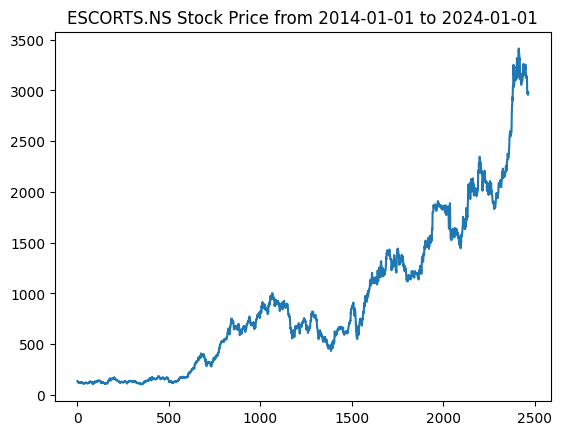

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0138, Validation Loss: 0.0672
Epoch [2/33], Loss: 0.0360, Validation Loss: 0.1101
Epoch [3/33], Loss: 0.0287, Validation Loss: 0.1189
Epoch [4/33], Loss: 0.0251, Validation Loss: 0.1123
Epoch [5/33], Loss: 0.0214, Validation Loss: 0.0706
Epoch [6/33], Loss: 0.0107, Validation Loss: 0.0051
Epoch [7/33], Loss: 0.0148, Validation Loss: 0.0046
Epoch [8/33], Loss: 0.0280, Validation Loss: 0.0856
Epoch [9/33], Loss: 0.0144, Validation Loss: 0.0265
Epoch [10/33], Loss: 0.0110, Validation Loss: 0.0041
Epoch [11/33], Loss: 0.0022, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0031, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0029, Validation Loss: 0.0083
Epoch [14/33], Loss: 0.0049, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0037, Validation Loss: 0.0136
Epoch [16/33], Loss: 0.0051, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0022, Validation Loss: 0.0104
Epoch [18/33], Loss: 0.0034, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0021, Validation Loss: 0.0077
Ep

[*********************100%***********************]  1 of 1 completed


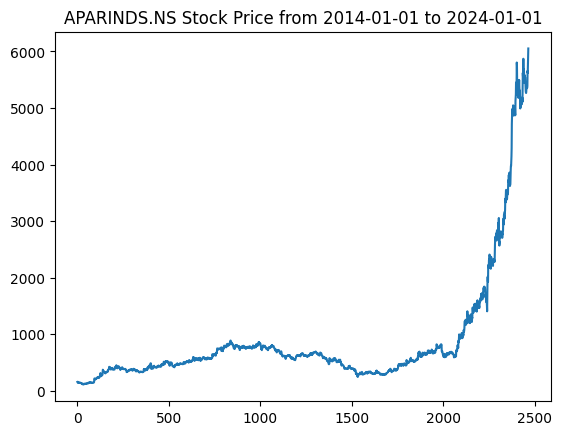

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0023, Validation Loss: 0.0248
Epoch [2/33], Loss: 0.0014, Validation Loss: 0.0215
Epoch [3/33], Loss: 0.0017, Validation Loss: 0.0192
Epoch [4/33], Loss: 0.0017, Validation Loss: 0.0159
Epoch [5/33], Loss: 0.0016, Validation Loss: 0.0130
Epoch [6/33], Loss: 0.0015, Validation Loss: 0.0119
Epoch [7/33], Loss: 0.0014, Validation Loss: 0.0120
Epoch [8/33], Loss: 0.0014, Validation Loss: 0.0121
Epoch [9/33], Loss: 0.0014, Validation Loss: 0.0121
Epoch [10/33], Loss: 0.0014, Validation Loss: 0.0122
Epoch [11/33], Loss: 0.0013, Validation Loss: 0.0121
Epoch [12/33], Loss: 0.0013, Validation Loss: 0.0121
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0123
Epoch [14/33], Loss: 0.0013, Validation Loss: 0.0122
Epoch [15/33], Loss: 0.0013, Validation Loss: 0.0121
Epoch [16/33], Loss: 0.0013, Validation Loss: 0.0123
Epoch [17/33], Loss: 0.0012, Validation Loss: 0.0122
Epoch [18/33], Loss: 0.0012, Validation Loss: 0.0122
Epoch [19/33], Loss: 0.0012, Validation Loss: 0.0123
Ep

[*********************100%***********************]  1 of 1 completed


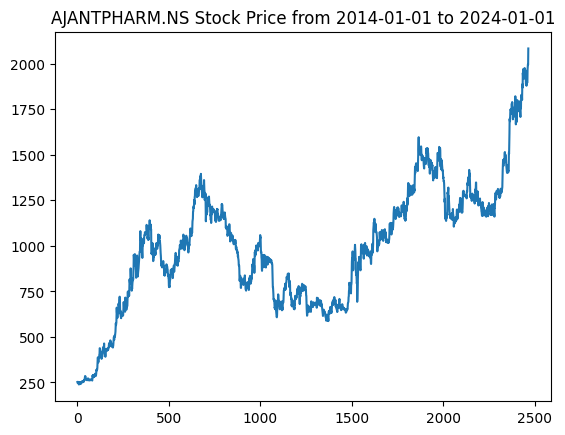

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0382, Validation Loss: 0.0305
Epoch [2/33], Loss: 0.0368, Validation Loss: 0.0327
Epoch [3/33], Loss: 0.0308, Validation Loss: 0.0236
Epoch [4/33], Loss: 0.0106, Validation Loss: 0.0120
Epoch [5/33], Loss: 0.0133, Validation Loss: 0.0008
Epoch [6/33], Loss: 0.0038, Validation Loss: 0.0006
Epoch [7/33], Loss: 0.0037, Validation Loss: 0.0004
Epoch [8/33], Loss: 0.0034, Validation Loss: 0.0017
Epoch [9/33], Loss: 0.0014, Validation Loss: 0.0012
Epoch [10/33], Loss: 0.0033, Validation Loss: 0.0019
Epoch [11/33], Loss: 0.0015, Validation Loss: 0.0016
Epoch [12/33], Loss: 0.0036, Validation Loss: 0.0012
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0016, Validation Loss: 0.0045
Epoch [16/33], Loss: 0.0061, Validation Loss: 0.0064
Epoch [17/33], Loss: 0.0041, Validation Loss: 0.0048
Epoch [18/33], Loss: 0.0101, Validation Loss: 0.0096
Epoch [19/33], Loss: 0.0021, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


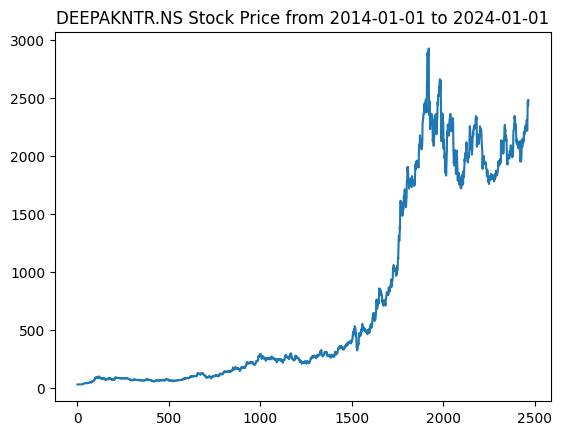

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0377, Validation Loss: 0.0899
Epoch [2/33], Loss: 0.1037, Validation Loss: 0.3385
Epoch [3/33], Loss: 0.0652, Validation Loss: 0.3134
Epoch [4/33], Loss: 0.0612, Validation Loss: 0.2829
Epoch [5/33], Loss: 0.0411, Validation Loss: 0.0485
Epoch [6/33], Loss: 0.3671, Validation Loss: 0.1930
Epoch [7/33], Loss: 0.0681, Validation Loss: 0.3382
Epoch [8/33], Loss: 0.0670, Validation Loss: 0.3260
Epoch [9/33], Loss: 0.0617, Validation Loss: 0.3115
Epoch [10/33], Loss: 0.0604, Validation Loss: 0.2977
Epoch [11/33], Loss: 0.0567, Validation Loss: 0.2629
Epoch [12/33], Loss: 0.0324, Validation Loss: 0.0627
Epoch [13/33], Loss: 0.0438, Validation Loss: 0.0137
Epoch [14/33], Loss: 0.0473, Validation Loss: 0.1844
Epoch [15/33], Loss: 0.0135, Validation Loss: 0.0181
Epoch [16/33], Loss: 0.0056, Validation Loss: 0.0059
Epoch [17/33], Loss: 0.0063, Validation Loss: 0.0039
Epoch [18/33], Loss: 0.0061, Validation Loss: 0.0037
Epoch [19/33], Loss: 0.0047, Validation Loss: 0.0027
Ep

[*********************100%***********************]  1 of 1 completed


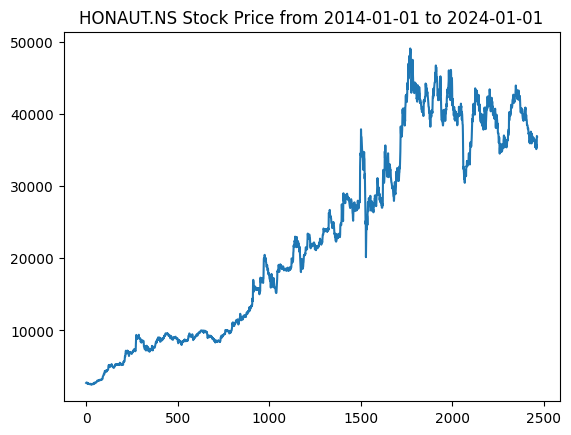

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0065, Validation Loss: 0.0063
Epoch [2/33], Loss: 0.1457, Validation Loss: 0.0873
Epoch [3/33], Loss: 0.1190, Validation Loss: 0.1839
Epoch [4/33], Loss: 0.0528, Validation Loss: 0.0524
Epoch [5/33], Loss: 0.1152, Validation Loss: 0.1032
Epoch [6/33], Loss: 0.0218, Validation Loss: 0.0115
Epoch [7/33], Loss: 0.0151, Validation Loss: 0.0029
Epoch [8/33], Loss: 0.0083, Validation Loss: 0.0102
Epoch [9/33], Loss: 0.0064, Validation Loss: 0.0030
Epoch [10/33], Loss: 0.0146, Validation Loss: 0.0078
Epoch [11/33], Loss: 0.0083, Validation Loss: 0.0014
Epoch [12/33], Loss: 0.0113, Validation Loss: 0.0046
Epoch [13/33], Loss: 0.0042, Validation Loss: 0.0016
Epoch [14/33], Loss: 0.0120, Validation Loss: 0.0086
Epoch [15/33], Loss: 0.0057, Validation Loss: 0.0018
Epoch [16/33], Loss: 0.0145, Validation Loss: 0.0095
Epoch [17/33], Loss: 0.0109, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0173, Validation Loss: 0.0085
Epoch [19/33], Loss: 0.0156, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


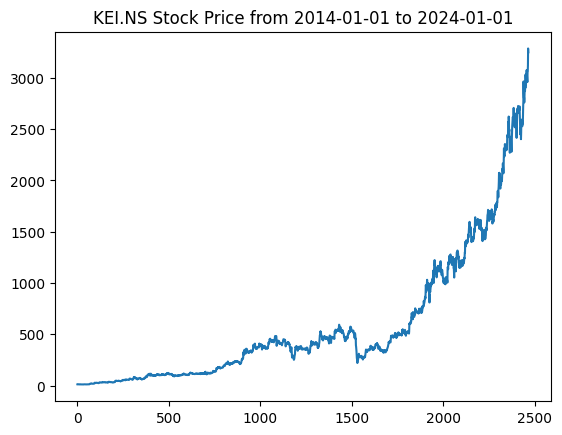

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0034, Validation Loss: 0.0401
Epoch [2/33], Loss: 0.0127, Validation Loss: 0.0205
Epoch [3/33], Loss: 0.0185, Validation Loss: 0.0992
Epoch [4/33], Loss: 0.0094, Validation Loss: 0.0975
Epoch [5/33], Loss: 0.0084, Validation Loss: 0.0949
Epoch [6/33], Loss: 0.0085, Validation Loss: 0.0951
Epoch [7/33], Loss: 0.0086, Validation Loss: 0.0933
Epoch [8/33], Loss: 0.0083, Validation Loss: 0.0911
Epoch [9/33], Loss: 0.0080, Validation Loss: 0.0865
Epoch [10/33], Loss: 0.0082, Validation Loss: 0.0749
Epoch [11/33], Loss: 0.0072, Validation Loss: 0.0530
Epoch [12/33], Loss: 0.0060, Validation Loss: 0.0011
Epoch [13/33], Loss: 0.0071, Validation Loss: 0.0686
Epoch [14/33], Loss: 0.0032, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0042, Validation Loss: 0.0131
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0028, Validation Loss: 0.0271
Epoch [18/33], Loss: 0.0031, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0011, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


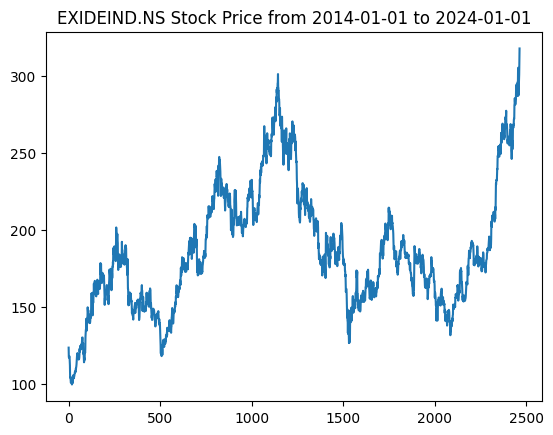

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0417, Validation Loss: 0.0096
Epoch [2/33], Loss: 0.0551, Validation Loss: 0.0242
Epoch [3/33], Loss: 0.0464, Validation Loss: 0.0358
Epoch [4/33], Loss: 0.0426, Validation Loss: 0.0305
Epoch [5/33], Loss: 0.0392, Validation Loss: 0.0252
Epoch [6/33], Loss: 0.0337, Validation Loss: 0.0147
Epoch [7/33], Loss: 0.0274, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0107, Validation Loss: 0.0009
Epoch [9/33], Loss: 0.0068, Validation Loss: 0.0046
Epoch [10/33], Loss: 0.0118, Validation Loss: 0.0018
Epoch [11/33], Loss: 0.0033, Validation Loss: 0.0013
Epoch [12/33], Loss: 0.0040, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0019, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0027, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0016, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0017, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0016, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0014, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


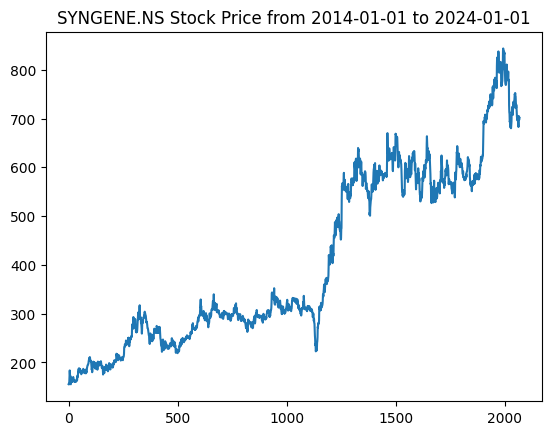

Epoch [1/33], Loss: 0.0166, Validation Loss: 0.0028
Epoch [2/33], Loss: 0.1149, Validation Loss: 0.1843
Epoch [3/33], Loss: 0.0451, Validation Loss: 0.0499
Epoch [4/33], Loss: 0.0740, Validation Loss: 0.1068
Epoch [5/33], Loss: 0.0221, Validation Loss: 0.0008
Epoch [6/33], Loss: 0.0162, Validation Loss: 0.0008
Epoch [7/33], Loss: 0.0116, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0124, Validation Loss: 0.0394
Epoch [9/33], Loss: 0.0101, Validation Loss: 0.0027
Epoch [10/33], Loss: 0.0138, Validation Loss: 0.0076
Epoch [11/33], Loss: 0.0080, Validation Loss: 0.0008
Epoch [12/33], Loss: 0.0113, Validation Loss: 0.0099
Epoch [13/33], Loss: 0.0106, Validation Loss: 0.0041
Epoch [14/33], Loss: 0.0106, Validation Loss: 0.0024
Epoch [15/33], Loss: 0.0063, Validation Loss: 0.0009
Epoch [16/33], Loss: 0.0082, Validation Loss: 0.0058
Epoch [17/33], Loss: 0.0106, Validation Loss: 0.0051
Epoch [18/33], Loss: 0.0091, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0041, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


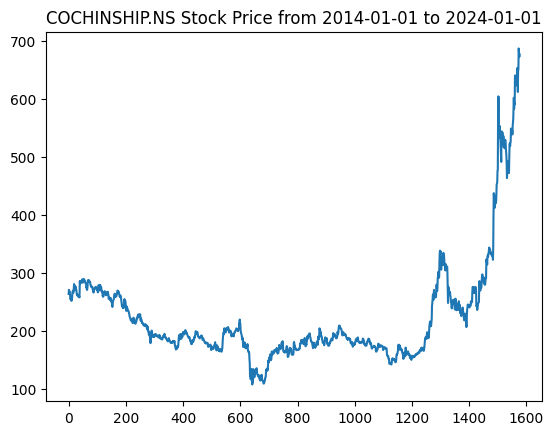

Epoch [1/33], Loss: 0.0091, Validation Loss: 0.0329
Epoch [2/33], Loss: 0.0072, Validation Loss: 0.0158
Epoch [3/33], Loss: 0.0045, Validation Loss: 0.0186
Epoch [4/33], Loss: 0.0047, Validation Loss: 0.0175
Epoch [5/33], Loss: 0.0046, Validation Loss: 0.0178
Epoch [6/33], Loss: 0.0046, Validation Loss: 0.0176
Epoch [7/33], Loss: 0.0046, Validation Loss: 0.0174
Epoch [8/33], Loss: 0.0046, Validation Loss: 0.0172
Epoch [9/33], Loss: 0.0045, Validation Loss: 0.0177
Epoch [10/33], Loss: 0.0046, Validation Loss: 0.0166
Epoch [11/33], Loss: 0.0042, Validation Loss: 0.0117
Epoch [12/33], Loss: 0.0034, Validation Loss: 0.0155
Epoch [13/33], Loss: 0.0037, Validation Loss: 0.0082
Epoch [14/33], Loss: 0.0021, Validation Loss: 0.0019
Epoch [15/33], Loss: 0.0010, Validation Loss: 0.0167
Epoch [16/33], Loss: 0.0018, Validation Loss: 0.0153
Epoch [17/33], Loss: 0.0039, Validation Loss: 0.0125
Epoch [18/33], Loss: 0.0030, Validation Loss: 0.0098
Epoch [19/33], Loss: 0.0024, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


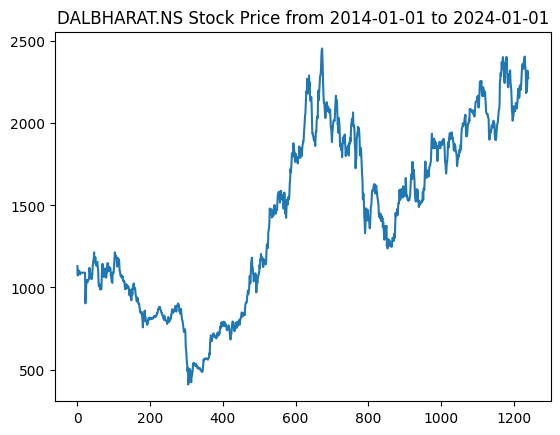

Epoch [1/33], Loss: 0.0660, Validation Loss: 0.0083
Epoch [2/33], Loss: 0.1361, Validation Loss: 0.2848
Epoch [3/33], Loss: 0.0538, Validation Loss: 0.0676
Epoch [4/33], Loss: 0.0764, Validation Loss: 0.1028
Epoch [5/33], Loss: 0.0474, Validation Loss: 0.0285
Epoch [6/33], Loss: 0.0297, Validation Loss: 0.0033
Epoch [7/33], Loss: 0.0168, Validation Loss: 0.0751
Epoch [8/33], Loss: 0.0132, Validation Loss: 0.0012
Epoch [9/33], Loss: 0.0128, Validation Loss: 0.0053
Epoch [10/33], Loss: 0.0208, Validation Loss: 0.0613
Epoch [11/33], Loss: 0.0250, Validation Loss: 0.0175
Epoch [12/33], Loss: 0.0102, Validation Loss: 0.0024
Epoch [13/33], Loss: 0.0060, Validation Loss: 0.0031
Epoch [14/33], Loss: 0.0102, Validation Loss: 0.0013
Epoch [15/33], Loss: 0.0049, Validation Loss: 0.0062
Epoch [16/33], Loss: 0.0056, Validation Loss: 0.0007
Epoch [17/33], Loss: 0.0062, Validation Loss: 0.0010
Epoch [18/33], Loss: 0.0037, Validation Loss: 0.0042
Epoch [19/33], Loss: 0.0039, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


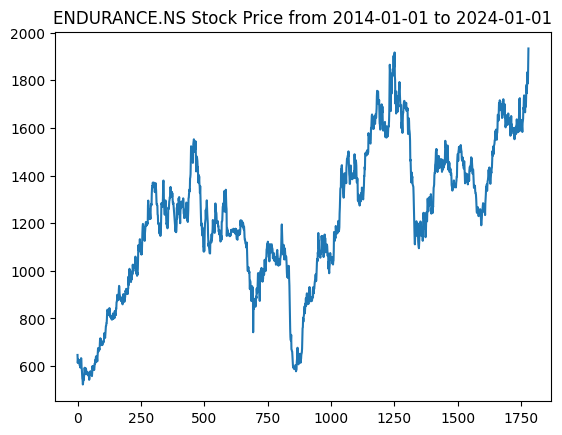

Epoch [1/33], Loss: 0.0759, Validation Loss: 0.0721
Epoch [2/33], Loss: 0.0395, Validation Loss: 0.0074
Epoch [3/33], Loss: 0.0404, Validation Loss: 0.0019
Epoch [4/33], Loss: 0.0201, Validation Loss: 0.0393
Epoch [5/33], Loss: 0.0156, Validation Loss: 0.0106
Epoch [6/33], Loss: 0.0148, Validation Loss: 0.0180
Epoch [7/33], Loss: 0.0225, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0122, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0057, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0028, Validation Loss: 0.0008
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0017, Validation Loss: 0.0004
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0018, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0018, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0012
Epoch [18/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0019, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


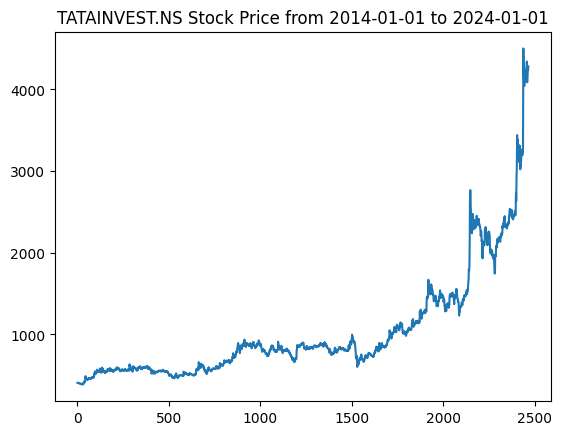

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0033, Validation Loss: 0.0500
Epoch [2/33], Loss: 0.0065, Validation Loss: 0.0522
Epoch [3/33], Loss: 0.0065, Validation Loss: 0.0623
Epoch [4/33], Loss: 0.0057, Validation Loss: 0.0698
Epoch [5/33], Loss: 0.0047, Validation Loss: 0.0700
Epoch [6/33], Loss: 0.0044, Validation Loss: 0.0698
Epoch [7/33], Loss: 0.0046, Validation Loss: 0.0697
Epoch [8/33], Loss: 0.0044, Validation Loss: 0.0697
Epoch [9/33], Loss: 0.0045, Validation Loss: 0.0696
Epoch [10/33], Loss: 0.0045, Validation Loss: 0.0693
Epoch [11/33], Loss: 0.0043, Validation Loss: 0.0690
Epoch [12/33], Loss: 0.0043, Validation Loss: 0.0682
Epoch [13/33], Loss: 0.0042, Validation Loss: 0.0671
Epoch [14/33], Loss: 0.0044, Validation Loss: 0.0660
Epoch [15/33], Loss: 0.0040, Validation Loss: 0.0660
Epoch [16/33], Loss: 0.0046, Validation Loss: 0.0684
Epoch [17/33], Loss: 0.0042, Validation Loss: 0.0648
Epoch [18/33], Loss: 0.0041, Validation Loss: 0.0566
Epoch [19/33], Loss: 0.0036, Validation Loss: 0.0392
Ep

[*********************100%***********************]  1 of 1 completed


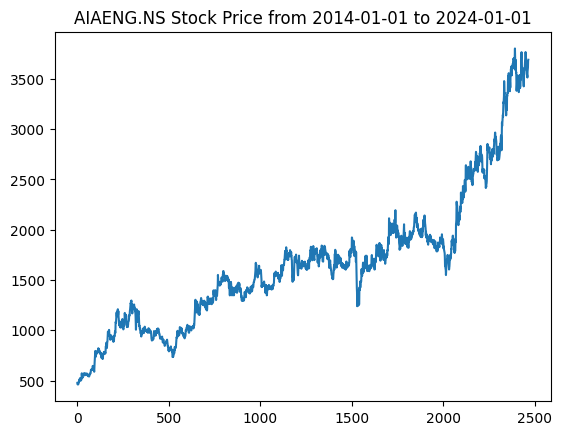

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0101, Validation Loss: 0.0378
Epoch [2/33], Loss: 0.0261, Validation Loss: 0.0122
Epoch [3/33], Loss: 0.0332, Validation Loss: 0.0338
Epoch [4/33], Loss: 0.0262, Validation Loss: 0.0644
Epoch [5/33], Loss: 0.0174, Validation Loss: 0.0462
Epoch [6/33], Loss: 0.0164, Validation Loss: 0.0146
Epoch [7/33], Loss: 0.0153, Validation Loss: 0.0027
Epoch [8/33], Loss: 0.0081, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0021, Validation Loss: 0.0011
Epoch [10/33], Loss: 0.0008, Validation Loss: 0.0030
Epoch [11/33], Loss: 0.0009, Validation Loss: 0.0018
Epoch [12/33], Loss: 0.0010, Validation Loss: 0.0014
Epoch [13/33], Loss: 0.0008, Validation Loss: 0.0031
Epoch [14/33], Loss: 0.0010, Validation Loss: 0.0048
Epoch [15/33], Loss: 0.0016, Validation Loss: 0.0015
Epoch [16/33], Loss: 0.0014, Validation Loss: 0.0026
Epoch [17/33], Loss: 0.0007, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0008, Validation Loss: 0.0022
Epoch [19/33], Loss: 0.0006, Validation Loss: 0.0017
Ep

[*********************100%***********************]  1 of 1 completed


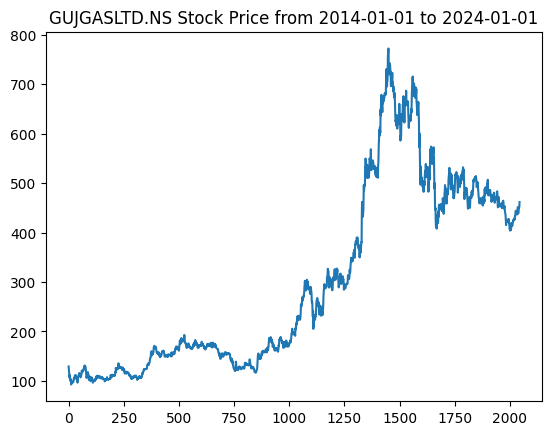

Epoch [1/33], Loss: 0.0541, Validation Loss: 0.0031
Epoch [2/33], Loss: 0.1500, Validation Loss: 0.1857
Epoch [3/33], Loss: 0.0693, Validation Loss: 0.0975
Epoch [4/33], Loss: 0.0473, Validation Loss: 0.0336
Epoch [5/33], Loss: 0.0224, Validation Loss: 0.0550
Epoch [6/33], Loss: 0.0129, Validation Loss: 0.0609
Epoch [7/33], Loss: 0.0292, Validation Loss: 0.0229
Epoch [8/33], Loss: 0.0465, Validation Loss: 0.0905
Epoch [9/33], Loss: 0.0769, Validation Loss: 0.1509
Epoch [10/33], Loss: 0.0610, Validation Loss: 0.0926
Epoch [11/33], Loss: 0.0224, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0497, Validation Loss: 0.0424
Epoch [13/33], Loss: 0.0600, Validation Loss: 0.1062
Epoch [14/33], Loss: 0.0379, Validation Loss: 0.0380
Epoch [15/33], Loss: 0.0061, Validation Loss: 0.0092
Epoch [16/33], Loss: 0.0037, Validation Loss: 0.0041
Epoch [17/33], Loss: 0.0029, Validation Loss: 0.0034
Epoch [18/33], Loss: 0.0036, Validation Loss: 0.0035
Epoch [19/33], Loss: 0.0035, Validation Loss: 0.0017
Ep

[*********************100%***********************]  1 of 1 completed


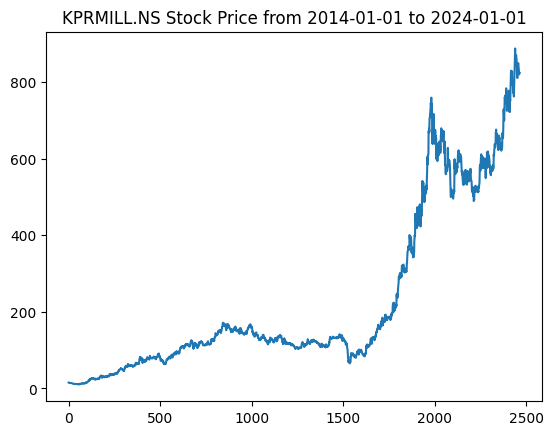

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0248, Validation Loss: 0.2159
Epoch [2/33], Loss: 0.0305, Validation Loss: 0.2205
Epoch [3/33], Loss: 0.0278, Validation Loss: 0.2201
Epoch [4/33], Loss: 0.0231, Validation Loss: 0.1652
Epoch [5/33], Loss: 0.0082, Validation Loss: 0.0040
Epoch [6/33], Loss: 0.0114, Validation Loss: 0.0533
Epoch [7/33], Loss: 0.0090, Validation Loss: 0.0187
Epoch [8/33], Loss: 0.0234, Validation Loss: 0.2176
Epoch [9/33], Loss: 0.0190, Validation Loss: 0.1312
Epoch [10/33], Loss: 0.0086, Validation Loss: 0.0169
Epoch [11/33], Loss: 0.0069, Validation Loss: 0.0100
Epoch [12/33], Loss: 0.0155, Validation Loss: 0.1512
Epoch [13/33], Loss: 0.0152, Validation Loss: 0.0945
Epoch [14/33], Loss: 0.0057, Validation Loss: 0.0042
Epoch [15/33], Loss: 0.0042, Validation Loss: 0.0027
Epoch [16/33], Loss: 0.0118, Validation Loss: 0.0921
Epoch [17/33], Loss: 0.0054, Validation Loss: 0.0134
Epoch [18/33], Loss: 0.0035, Validation Loss: 0.0033
Epoch [19/33], Loss: 0.0047, Validation Loss: 0.0295
Ep

[*********************100%***********************]  1 of 1 completed


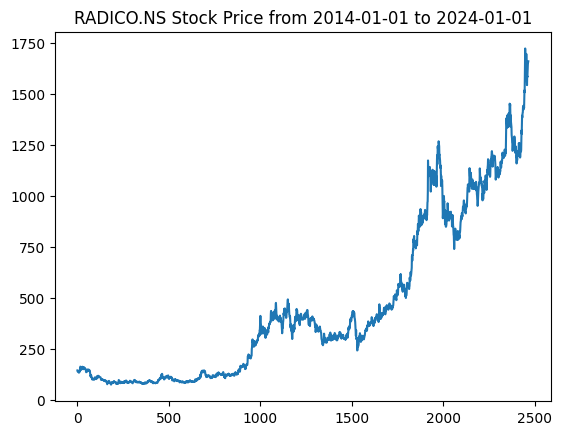

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0227, Validation Loss: 0.0850
Epoch [2/33], Loss: 0.0504, Validation Loss: 0.1466
Epoch [3/33], Loss: 0.0370, Validation Loss: 0.1361
Epoch [4/33], Loss: 0.0364, Validation Loss: 0.1348
Epoch [5/33], Loss: 0.0245, Validation Loss: 0.0456
Epoch [6/33], Loss: 0.0282, Validation Loss: 0.0790
Epoch [7/33], Loss: 0.0335, Validation Loss: 0.1510
Epoch [8/33], Loss: 0.0172, Validation Loss: 0.0403
Epoch [9/33], Loss: 0.0189, Validation Loss: 0.0403
Epoch [10/33], Loss: 0.0293, Validation Loss: 0.1447
Epoch [11/33], Loss: 0.0271, Validation Loss: 0.1041
Epoch [12/33], Loss: 0.0160, Validation Loss: 0.0378
Epoch [13/33], Loss: 0.0069, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0023, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0025, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0066, Validation Loss: 0.0110
Epoch [17/33], Loss: 0.0183, Validation Loss: 0.0922
Epoch [18/33], Loss: 0.0219, Validation Loss: 0.0636
Epoch [19/33], Loss: 0.0067, Validation Loss: 0.0063
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0017, Validation Loss: 0.0006


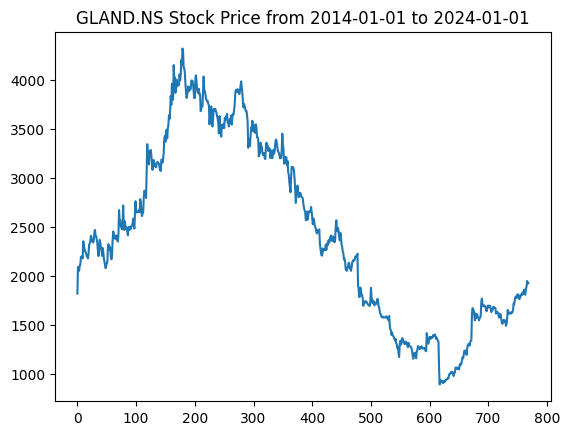

Epoch [1/33], Loss: 0.2498, Validation Loss: 0.0897
Epoch [2/33], Loss: 0.0864, Validation Loss: 0.0985
Epoch [3/33], Loss: 0.0588, Validation Loss: 0.0576
Epoch [4/33], Loss: 0.0535, Validation Loss: 0.0628
Epoch [5/33], Loss: 0.0211, Validation Loss: 0.0136
Epoch [6/33], Loss: 0.0104, Validation Loss: 0.0013
Epoch [7/33], Loss: 0.0070, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0077, Validation Loss: 0.0022
Epoch [9/33], Loss: 0.0046, Validation Loss: 0.0013
Epoch [10/33], Loss: 0.0078, Validation Loss: 0.0007
Epoch [11/33], Loss: 0.0040, Validation Loss: 0.0021
Epoch [12/33], Loss: 0.0046, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0046, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0036, Validation Loss: 0.0022
Epoch [15/33], Loss: 0.0049, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0039, Validation Loss: 0.0023
Epoch [17/33], Loss: 0.0033, Validation Loss: 0.0022
Epoch [18/33], Loss: 0.0073, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0038, Validation Loss: 0.0032
Ep

[*********************100%***********************]  1 of 1 completed


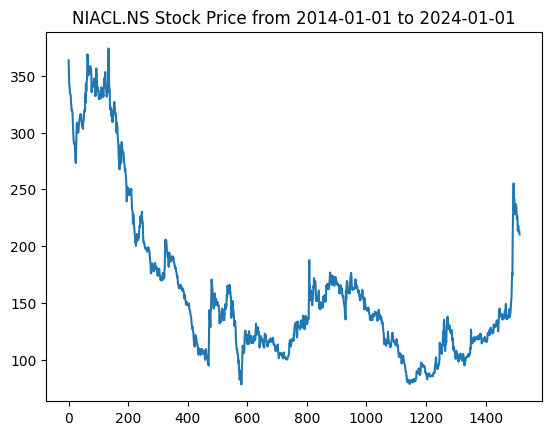

Epoch [1/33], Loss: 0.1077, Validation Loss: 0.0030
Epoch [2/33], Loss: 0.0759, Validation Loss: 0.0148
Epoch [3/33], Loss: 0.0544, Validation Loss: 0.0010
Epoch [4/33], Loss: 0.0420, Validation Loss: 0.0005
Epoch [5/33], Loss: 0.0384, Validation Loss: 0.0053
Epoch [6/33], Loss: 0.0627, Validation Loss: 0.0143
Epoch [7/33], Loss: 0.0471, Validation Loss: 0.0009
Epoch [8/33], Loss: 0.0351, Validation Loss: 0.0039
Epoch [9/33], Loss: 0.0120, Validation Loss: 0.0042
Epoch [10/33], Loss: 0.0402, Validation Loss: 0.0033
Epoch [11/33], Loss: 0.0161, Validation Loss: 0.0012
Epoch [12/33], Loss: 0.0050, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0094, Validation Loss: 0.0014
Epoch [14/33], Loss: 0.0033, Validation Loss: 0.0011
Epoch [15/33], Loss: 0.0025, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0024, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0017, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


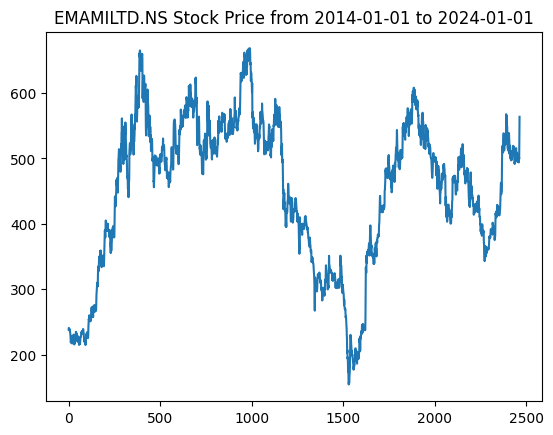

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1018, Validation Loss: 0.0729
Epoch [2/33], Loss: 0.0943, Validation Loss: 0.0879
Epoch [3/33], Loss: 0.1137, Validation Loss: 0.0112
Epoch [4/33], Loss: 0.0674, Validation Loss: 0.0169
Epoch [5/33], Loss: 0.0266, Validation Loss: 0.0127
Epoch [6/33], Loss: 0.0363, Validation Loss: 0.0169
Epoch [7/33], Loss: 0.0228, Validation Loss: 0.0087
Epoch [8/33], Loss: 0.0101, Validation Loss: 0.0045
Epoch [9/33], Loss: 0.0051, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0041, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0035, Validation Loss: 0.0006
Epoch [12/33], Loss: 0.0035, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0033, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0034, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0031, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0030, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0030, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0032, Validation Loss: 0.0008
Epoch [19/33], Loss: 0.0037, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


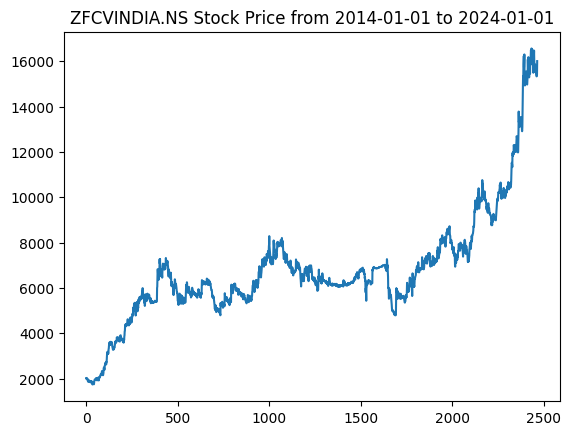

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0125, Validation Loss: 0.0298
Epoch [2/33], Loss: 0.0112, Validation Loss: 0.0276
Epoch [3/33], Loss: 0.0099, Validation Loss: 0.0217
Epoch [4/33], Loss: 0.0107, Validation Loss: 0.0176
Epoch [5/33], Loss: 0.0105, Validation Loss: 0.0138
Epoch [6/33], Loss: 0.0106, Validation Loss: 0.0124
Epoch [7/33], Loss: 0.0099, Validation Loss: 0.0108
Epoch [8/33], Loss: 0.0089, Validation Loss: 0.0138
Epoch [9/33], Loss: 0.0067, Validation Loss: 0.0170
Epoch [10/33], Loss: 0.0027, Validation Loss: 0.0025
Epoch [11/33], Loss: 0.0018, Validation Loss: 0.0041
Epoch [12/33], Loss: 0.0028, Validation Loss: 0.0027
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0032
Epoch [14/33], Loss: 0.0016, Validation Loss: 0.0028
Epoch [15/33], Loss: 0.0007, Validation Loss: 0.0016
Epoch [16/33], Loss: 0.0006, Validation Loss: 0.0009
Epoch [17/33], Loss: 0.0006, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0006, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0005, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


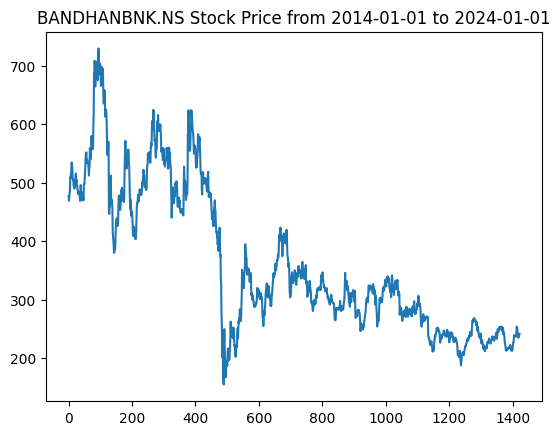

Epoch [1/33], Loss: 0.1046, Validation Loss: 0.0192
Epoch [2/33], Loss: 0.0646, Validation Loss: 0.0422
Epoch [3/33], Loss: 0.0542, Validation Loss: 0.0488
Epoch [4/33], Loss: 0.0383, Validation Loss: 0.0217
Epoch [5/33], Loss: 0.0225, Validation Loss: 0.0085
Epoch [6/33], Loss: 0.0374, Validation Loss: 0.0045
Epoch [7/33], Loss: 0.0069, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0201, Validation Loss: 0.0072
Epoch [9/33], Loss: 0.0306, Validation Loss: 0.0077
Epoch [10/33], Loss: 0.0051, Validation Loss: 0.0011
Epoch [11/33], Loss: 0.0045, Validation Loss: 0.0020
Epoch [12/33], Loss: 0.0074, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0042, Validation Loss: 0.0054
Epoch [14/33], Loss: 0.0029, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0034, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0048, Validation Loss: 0.0045
Epoch [17/33], Loss: 0.0061, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0032, Validation Loss: 0.0020
Epoch [19/33], Loss: 0.0038, Validation Loss: 0.0024
Ep

[*********************100%***********************]  1 of 1 completed


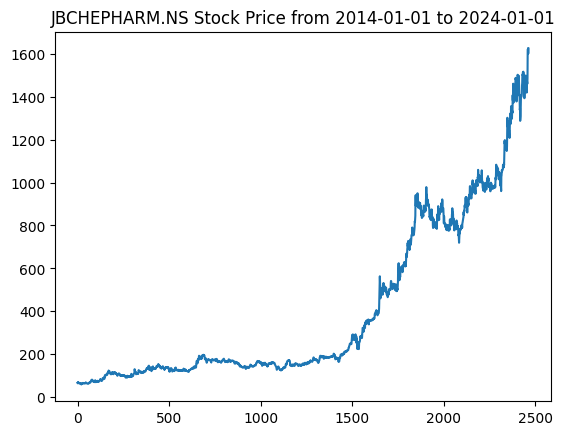

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0089, Validation Loss: 0.0152
Epoch [2/33], Loss: 0.0743, Validation Loss: 0.2118
Epoch [3/33], Loss: 0.0271, Validation Loss: 0.1606
Epoch [4/33], Loss: 0.0293, Validation Loss: 0.1620
Epoch [5/33], Loss: 0.0258, Validation Loss: 0.1365
Epoch [6/33], Loss: 0.0153, Validation Loss: 0.0099
Epoch [7/33], Loss: 0.0751, Validation Loss: 0.0934
Epoch [8/33], Loss: 0.0344, Validation Loss: 0.2025
Epoch [9/33], Loss: 0.0268, Validation Loss: 0.1437
Epoch [10/33], Loss: 0.0256, Validation Loss: 0.1198
Epoch [11/33], Loss: 0.0087, Validation Loss: 0.0007
Epoch [12/33], Loss: 0.0354, Validation Loss: 0.1150
Epoch [13/33], Loss: 0.0227, Validation Loss: 0.1453
Epoch [14/33], Loss: 0.0202, Validation Loss: 0.1040
Epoch [15/33], Loss: 0.0075, Validation Loss: 0.0246
Epoch [16/33], Loss: 0.0057, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0015
Epoch [18/33], Loss: 0.0072, Validation Loss: 0.0237
Epoch [19/33], Loss: 0.0049, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


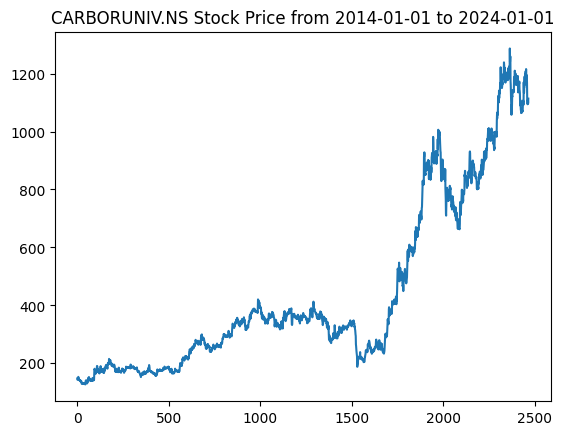

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0319, Validation Loss: 0.1553
Epoch [2/33], Loss: 0.0337, Validation Loss: 0.1375
Epoch [3/33], Loss: 0.0320, Validation Loss: 0.1160
Epoch [4/33], Loss: 0.0224, Validation Loss: 0.0141
Epoch [5/33], Loss: 0.0116, Validation Loss: 0.0153
Epoch [6/33], Loss: 0.0107, Validation Loss: 0.0160
Epoch [7/33], Loss: 0.0139, Validation Loss: 0.0266
Epoch [8/33], Loss: 0.0274, Validation Loss: 0.1395
Epoch [9/33], Loss: 0.0299, Validation Loss: 0.1279
Epoch [10/33], Loss: 0.0187, Validation Loss: 0.0612
Epoch [11/33], Loss: 0.0056, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0025, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0102, Validation Loss: 0.0488
Epoch [14/33], Loss: 0.0205, Validation Loss: 0.1057
Epoch [15/33], Loss: 0.0313, Validation Loss: 0.1219
Epoch [16/33], Loss: 0.0203, Validation Loss: 0.0792
Epoch [17/33], Loss: 0.0116, Validation Loss: 0.0169
Epoch [18/33], Loss: 0.0062, Validation Loss: 0.0008
Epoch [19/33], Loss: 0.0027, Validation Loss: 0.0069
Ep

[*********************100%***********************]  1 of 1 completed


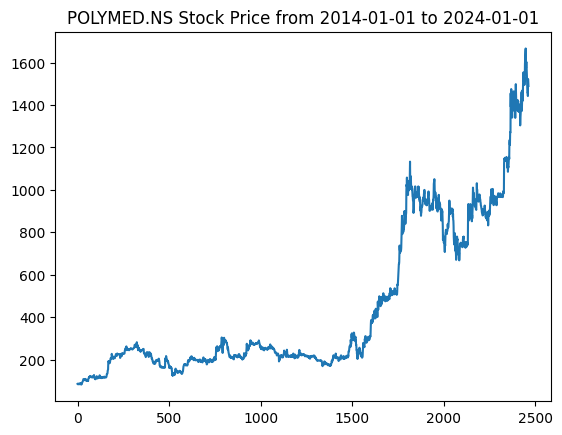

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0199, Validation Loss: 0.0171
Epoch [2/33], Loss: 0.0513, Validation Loss: 0.1339
Epoch [3/33], Loss: 0.0310, Validation Loss: 0.1120
Epoch [4/33], Loss: 0.0300, Validation Loss: 0.1052
Epoch [5/33], Loss: 0.0245, Validation Loss: 0.0653
Epoch [6/33], Loss: 0.0187, Validation Loss: 0.0754
Epoch [7/33], Loss: 0.1268, Validation Loss: 0.1827
Epoch [8/33], Loss: 0.0247, Validation Loss: 0.0169
Epoch [9/33], Loss: 0.0525, Validation Loss: 0.1308
Epoch [10/33], Loss: 0.0310, Validation Loss: 0.1150
Epoch [11/33], Loss: 0.0304, Validation Loss: 0.1105
Epoch [12/33], Loss: 0.0279, Validation Loss: 0.0996
Epoch [13/33], Loss: 0.0255, Validation Loss: 0.0796
Epoch [14/33], Loss: 0.0152, Validation Loss: 0.0239
Epoch [15/33], Loss: 0.0069, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0123, Validation Loss: 0.0281
Epoch [17/33], Loss: 0.0030, Validation Loss: 0.0052
Epoch [18/33], Loss: 0.0019, Validation Loss: 0.0050
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0031
Ep

[*********************100%***********************]  1 of 1 completed


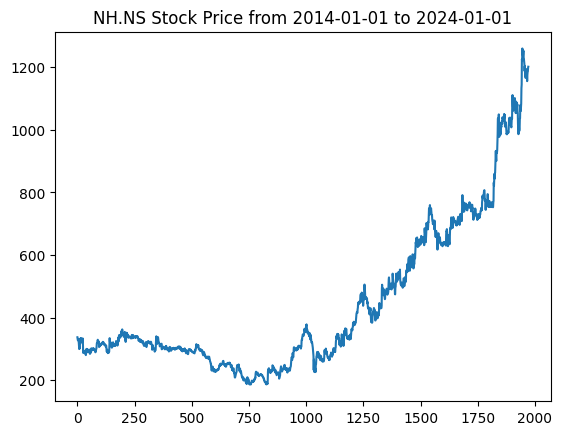

Epoch [1/33], Loss: 0.0229, Validation Loss: 0.1503
Epoch [2/33], Loss: 0.0214, Validation Loss: 0.1514
Epoch [3/33], Loss: 0.0170, Validation Loss: 0.1388
Epoch [4/33], Loss: 0.0157, Validation Loss: 0.1323
Epoch [5/33], Loss: 0.0155, Validation Loss: 0.1231
Epoch [6/33], Loss: 0.0138, Validation Loss: 0.0919
Epoch [7/33], Loss: 0.0124, Validation Loss: 0.0402
Epoch [8/33], Loss: 0.0048, Validation Loss: 0.0424
Epoch [9/33], Loss: 0.0143, Validation Loss: 0.1191
Epoch [10/33], Loss: 0.0122, Validation Loss: 0.0904
Epoch [11/33], Loss: 0.0076, Validation Loss: 0.0142
Epoch [12/33], Loss: 0.0039, Validation Loss: 0.0010
Epoch [13/33], Loss: 0.0043, Validation Loss: 0.0144
Epoch [14/33], Loss: 0.0073, Validation Loss: 0.0522
Epoch [15/33], Loss: 0.0038, Validation Loss: 0.0047
Epoch [16/33], Loss: 0.0014, Validation Loss: 0.0002
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0110
Epoch [18/33], Loss: 0.0014, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


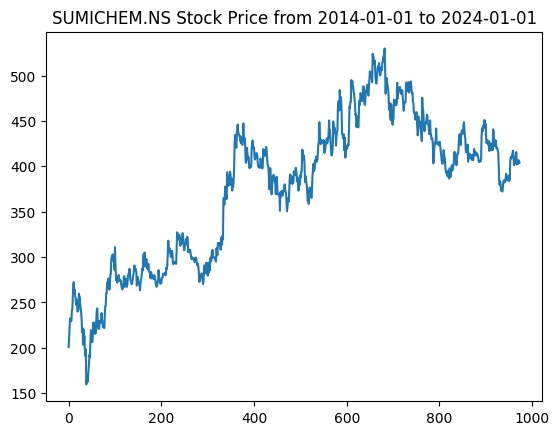

Epoch [1/33], Loss: 0.0582, Validation Loss: 0.0185
Epoch [2/33], Loss: 0.1744, Validation Loss: 0.1282
Epoch [3/33], Loss: 0.0484, Validation Loss: 0.0026
Epoch [4/33], Loss: 0.0657, Validation Loss: 0.0051
Epoch [5/33], Loss: 0.0580, Validation Loss: 0.0106
Epoch [6/33], Loss: 0.0436, Validation Loss: 0.0019
Epoch [7/33], Loss: 0.0411, Validation Loss: 0.0008
Epoch [8/33], Loss: 0.0243, Validation Loss: 0.0293
Epoch [9/33], Loss: 0.0167, Validation Loss: 0.0071
Epoch [10/33], Loss: 0.0254, Validation Loss: 0.0034
Epoch [11/33], Loss: 0.0048, Validation Loss: 0.0039
Epoch [12/33], Loss: 0.0061, Validation Loss: 0.0032
Epoch [13/33], Loss: 0.0068, Validation Loss: 0.0017
Epoch [14/33], Loss: 0.0041, Validation Loss: 0.0019
Epoch [15/33], Loss: 0.0050, Validation Loss: 0.0028
Epoch [16/33], Loss: 0.0060, Validation Loss: 0.0013
Epoch [17/33], Loss: 0.0043, Validation Loss: 0.0015
Epoch [18/33], Loss: 0.0050, Validation Loss: 0.0033
Epoch [19/33], Loss: 0.0065, Validation Loss: 0.0022
Ep

[*********************100%***********************]  1 of 1 completed


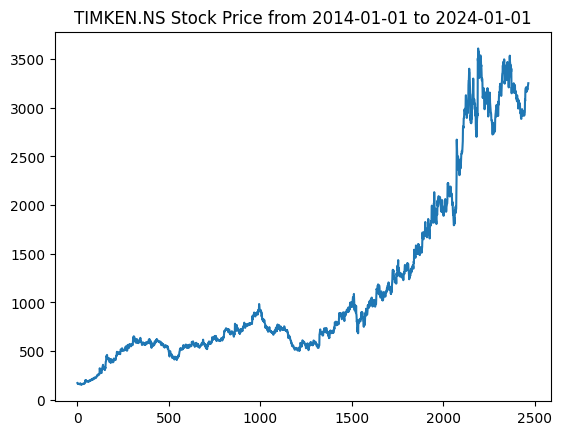

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0054, Validation Loss: 0.0406
Epoch [2/33], Loss: 0.0489, Validation Loss: 0.3364
Epoch [3/33], Loss: 0.0191, Validation Loss: 0.3120
Epoch [4/33], Loss: 0.0187, Validation Loss: 0.3022
Epoch [5/33], Loss: 0.0171, Validation Loss: 0.2659
Epoch [6/33], Loss: 0.0147, Validation Loss: 0.1764
Epoch [7/33], Loss: 0.0117, Validation Loss: 0.0125
Epoch [8/33], Loss: 0.0084, Validation Loss: 0.2048
Epoch [9/33], Loss: 0.0436, Validation Loss: 0.0200
Epoch [10/33], Loss: 0.0241, Validation Loss: 0.4552
Epoch [11/33], Loss: 0.0121, Validation Loss: 0.1876
Epoch [12/33], Loss: 0.0159, Validation Loss: 0.1285
Epoch [13/33], Loss: 0.0055, Validation Loss: 0.0024
Epoch [14/33], Loss: 0.0024, Validation Loss: 0.0051
Epoch [15/33], Loss: 0.0023, Validation Loss: 0.0045
Epoch [16/33], Loss: 0.0089, Validation Loss: 0.1666
Epoch [17/33], Loss: 0.0095, Validation Loss: 0.0295
Epoch [18/33], Loss: 0.0042, Validation Loss: 0.0075
Epoch [19/33], Loss: 0.0097, Validation Loss: 0.2136
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0025, Validation Loss: 0.0012


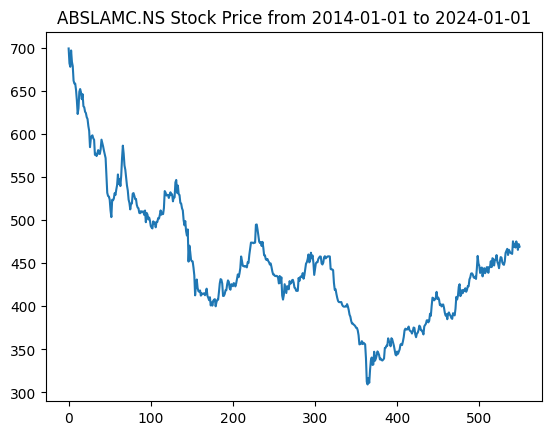

Epoch [1/33], Loss: 0.1013, Validation Loss: 0.0007
Epoch [2/33], Loss: 0.0427, Validation Loss: 0.0002
Epoch [3/33], Loss: 0.0220, Validation Loss: 0.0064
Epoch [4/33], Loss: 0.0316, Validation Loss: 0.0024
Epoch [5/33], Loss: 0.0312, Validation Loss: 0.0001
Epoch [6/33], Loss: 0.0238, Validation Loss: 0.0003
Epoch [7/33], Loss: 0.0203, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0166, Validation Loss: 0.0014
Epoch [9/33], Loss: 0.0061, Validation Loss: 0.0175
Epoch [10/33], Loss: 0.0413, Validation Loss: 0.0231
Epoch [11/33], Loss: 0.0328, Validation Loss: 0.0046
Epoch [12/33], Loss: 0.0260, Validation Loss: 0.0002
Epoch [13/33], Loss: 0.0220, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0157, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0148, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0130, Validation Loss: 0.0001
Epoch [17/33], Loss: 0.0042, Validation Loss: 0.0039
Epoch [18/33], Loss: 0.0041, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0086, Validation Loss: 0.0087
Ep

[*********************100%***********************]  1 of 1 completed


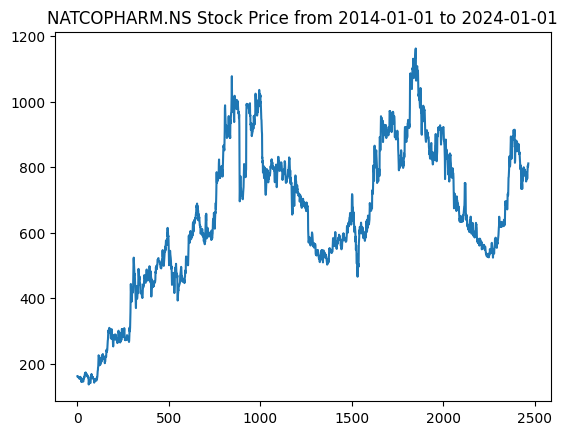

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0642, Validation Loss: 0.0117
Epoch [2/33], Loss: 0.0473, Validation Loss: 0.0284
Epoch [3/33], Loss: 0.0664, Validation Loss: 0.0423
Epoch [4/33], Loss: 0.0503, Validation Loss: 0.0266
Epoch [5/33], Loss: 0.0175, Validation Loss: 0.0005
Epoch [6/33], Loss: 0.0029, Validation Loss: 0.0011
Epoch [7/33], Loss: 0.0036, Validation Loss: 0.0020
Epoch [8/33], Loss: 0.0038, Validation Loss: 0.0032
Epoch [9/33], Loss: 0.0056, Validation Loss: 0.0040
Epoch [10/33], Loss: 0.0033, Validation Loss: 0.0049
Epoch [11/33], Loss: 0.0031, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0025, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0019, Validation Loss: 0.0008
Epoch [14/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0025, Validation Loss: 0.0052
Epoch [16/33], Loss: 0.0072, Validation Loss: 0.0082
Epoch [17/33], Loss: 0.0055, Validation Loss: 0.0088
Epoch [18/33], Loss: 0.0171, Validation Loss: 0.0140
Epoch [19/33], Loss: 0.0180, Validation Loss: 0.0033
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0016, Validation Loss: 0.0005


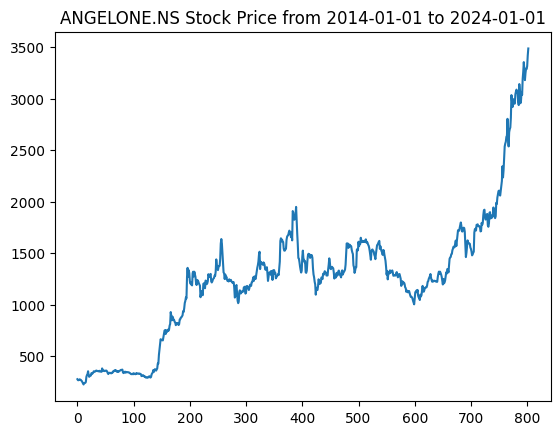

Epoch [1/33], Loss: 0.0337, Validation Loss: 0.0037
Epoch [2/33], Loss: 0.0272, Validation Loss: 0.0275
Epoch [3/33], Loss: 0.0181, Validation Loss: 0.0275
Epoch [4/33], Loss: 0.0157, Validation Loss: 0.0194
Epoch [5/33], Loss: 0.0160, Validation Loss: 0.0173
Epoch [6/33], Loss: 0.0157, Validation Loss: 0.0158
Epoch [7/33], Loss: 0.0134, Validation Loss: 0.0021
Epoch [8/33], Loss: 0.0102, Validation Loss: 0.0043
Epoch [9/33], Loss: 0.0029, Validation Loss: 0.0018
Epoch [10/33], Loss: 0.0044, Validation Loss: 0.0012
Epoch [11/33], Loss: 0.0059, Validation Loss: 0.0080
Epoch [12/33], Loss: 0.0106, Validation Loss: 0.0089
Epoch [13/33], Loss: 0.0078, Validation Loss: 0.0015
Epoch [14/33], Loss: 0.0072, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0041, Validation Loss: 0.0013
Epoch [16/33], Loss: 0.0033, Validation Loss: 0.0013
Epoch [17/33], Loss: 0.0018, Validation Loss: 0.0028
Epoch [18/33], Loss: 0.0021, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed


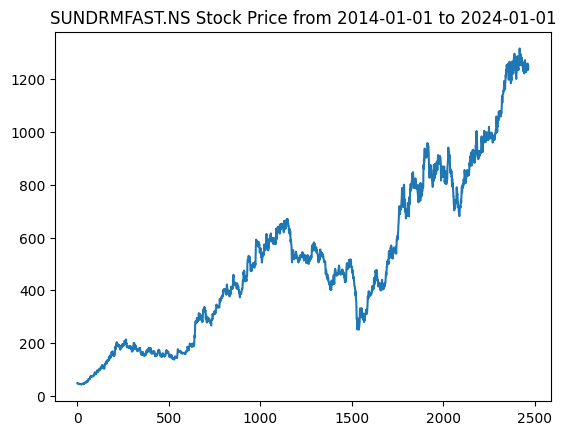

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0307, Validation Loss: 0.1124
Epoch [2/33], Loss: 0.0386, Validation Loss: 0.0522
Epoch [3/33], Loss: 0.0517, Validation Loss: 0.0835
Epoch [4/33], Loss: 0.0246, Validation Loss: 0.0175
Epoch [5/33], Loss: 0.0148, Validation Loss: 0.0027
Epoch [6/33], Loss: 0.0213, Validation Loss: 0.0329
Epoch [7/33], Loss: 0.0079, Validation Loss: 0.0005
Epoch [8/33], Loss: 0.0034, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0015, Validation Loss: 0.0011
Epoch [10/33], Loss: 0.0016, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [13/33], Loss: 0.0062, Validation Loss: 0.0004
Epoch [14/33], Loss: 0.0111, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0075, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0020, Validation Loss: 0.0005
Epoch [17/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0014, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0022, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


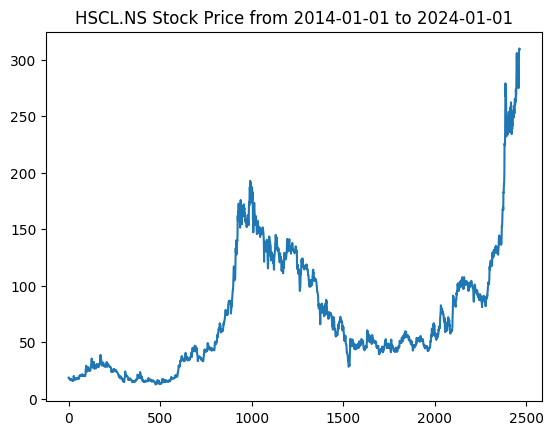

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0366, Validation Loss: 0.0132
Epoch [2/33], Loss: 0.0361, Validation Loss: 0.0067
Epoch [3/33], Loss: 0.0305, Validation Loss: 0.0060
Epoch [4/33], Loss: 0.0283, Validation Loss: 0.0063
Epoch [5/33], Loss: 0.0271, Validation Loss: 0.0046
Epoch [6/33], Loss: 0.0255, Validation Loss: 0.0025
Epoch [7/33], Loss: 0.0248, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0098, Validation Loss: 0.0064
Epoch [9/33], Loss: 0.0172, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0023, Validation Loss: 0.0002
Epoch [11/33], Loss: 0.0009, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0012, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0008, Validation Loss: 0.0008
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0010, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0023, Validation Loss: 0.0013
Epoch [17/33], Loss: 0.0018, Validation Loss: 0.0018
Epoch [18/33], Loss: 0.0030, Validation Loss: 0.0032
Epoch [19/33], Loss: 0.0034, Validation Loss: 0.0017
Ep

[*********************100%***********************]  1 of 1 completed


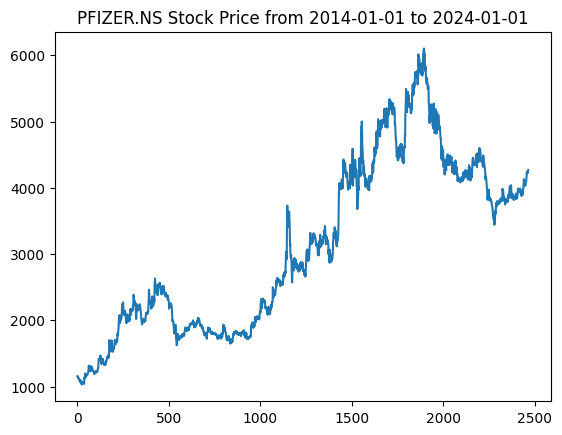

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0333, Validation Loss: 0.0530
Epoch [2/33], Loss: 0.1579, Validation Loss: 0.1212
Epoch [3/33], Loss: 0.0781, Validation Loss: 0.0340
Epoch [4/33], Loss: 0.0813, Validation Loss: 0.0055
Epoch [5/33], Loss: 0.0266, Validation Loss: 0.0110
Epoch [6/33], Loss: 0.0214, Validation Loss: 0.0162
Epoch [7/33], Loss: 0.0056, Validation Loss: 0.0160
Epoch [8/33], Loss: 0.0051, Validation Loss: 0.0002
Epoch [9/33], Loss: 0.0061, Validation Loss: 0.0088
Epoch [10/33], Loss: 0.0024, Validation Loss: 0.0007
Epoch [11/33], Loss: 0.0026, Validation Loss: 0.0002
Epoch [12/33], Loss: 0.0039, Validation Loss: 0.0047
Epoch [13/33], Loss: 0.0035, Validation Loss: 0.0046
Epoch [14/33], Loss: 0.0033, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0017, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0022, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0023, Validation Loss: 0.0050
Epoch [18/33], Loss: 0.0029, Validation Loss: 0.0033
Epoch [19/33], Loss: 0.0018, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


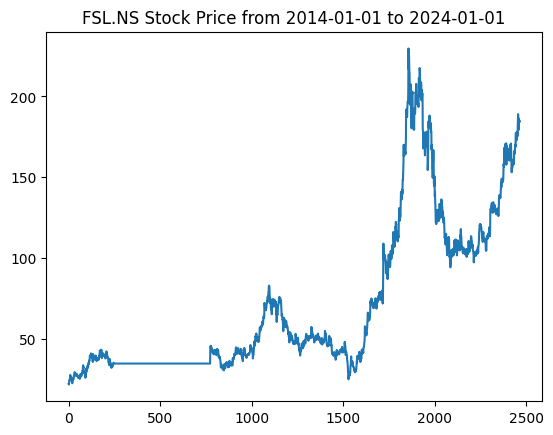

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0413, Validation Loss: 0.0036
Epoch [2/33], Loss: 0.0875, Validation Loss: 0.0759
Epoch [3/33], Loss: 0.0508, Validation Loss: 0.0404
Epoch [4/33], Loss: 0.0115, Validation Loss: 0.0050
Epoch [5/33], Loss: 0.0079, Validation Loss: 0.0349
Epoch [6/33], Loss: 0.0372, Validation Loss: 0.0313
Epoch [7/33], Loss: 0.0115, Validation Loss: 0.0029
Epoch [8/33], Loss: 0.0134, Validation Loss: 0.0243
Epoch [9/33], Loss: 0.0375, Validation Loss: 0.0322
Epoch [10/33], Loss: 0.0254, Validation Loss: 0.0047
Epoch [11/33], Loss: 0.0078, Validation Loss: 0.0027
Epoch [12/33], Loss: 0.0115, Validation Loss: 0.0040
Epoch [13/33], Loss: 0.0065, Validation Loss: 0.0016
Epoch [14/33], Loss: 0.0167, Validation Loss: 0.0088
Epoch [15/33], Loss: 0.0053, Validation Loss: 0.0017
Epoch [16/33], Loss: 0.0013, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0025, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0084, Validation Loss: 0.0011
Epoch [19/33], Loss: 0.0065, Validation Loss: 0.0023
Ep

<ipython-input-11-55953d5f2d50>:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  locals()[results_name] = pd.concat([locals()[results_name], new_row], ignore_index=True)
[*********************100%***********************]  1 of 1 completed


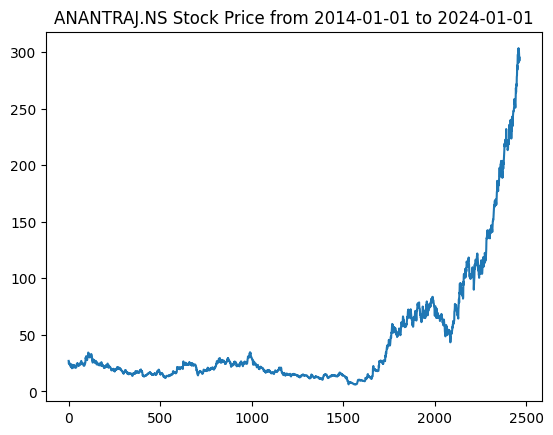

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0056, Validation Loss: 0.0297
Epoch [2/33], Loss: 0.0058, Validation Loss: 0.0353
Epoch [3/33], Loss: 0.0057, Validation Loss: 0.0344
Epoch [4/33], Loss: 0.0062, Validation Loss: 0.0412
Epoch [5/33], Loss: 0.0051, Validation Loss: 0.0417
Epoch [6/33], Loss: 0.0044, Validation Loss: 0.0402
Epoch [7/33], Loss: 0.0043, Validation Loss: 0.0399
Epoch [8/33], Loss: 0.0043, Validation Loss: 0.0396
Epoch [9/33], Loss: 0.0045, Validation Loss: 0.0391
Epoch [10/33], Loss: 0.0042, Validation Loss: 0.0373
Epoch [11/33], Loss: 0.0044, Validation Loss: 0.0387
Epoch [12/33], Loss: 0.0032, Validation Loss: 0.0279
Epoch [13/33], Loss: 0.0053, Validation Loss: 0.0406
Epoch [14/33], Loss: 0.0037, Validation Loss: 0.0339
Epoch [15/33], Loss: 0.0038, Validation Loss: 0.0213
Epoch [16/33], Loss: 0.0030, Validation Loss: 0.0184
Epoch [17/33], Loss: 0.0017, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0013, Validation Loss: 0.0060
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0045
Ep

[*********************100%***********************]  1 of 1 completed


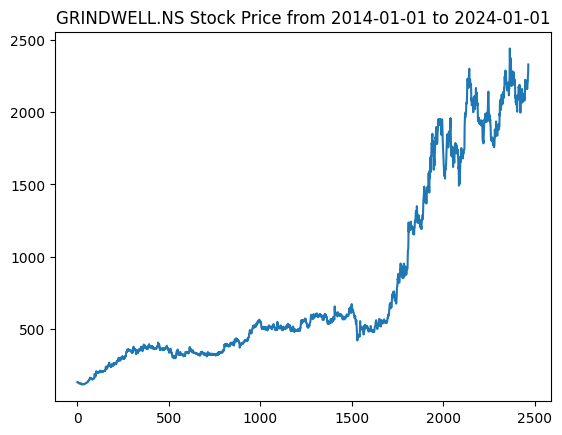

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0188, Validation Loss: 0.1703
Epoch [2/33], Loss: 0.0497, Validation Loss: 0.3130
Epoch [3/33], Loss: 0.0365, Validation Loss: 0.3243
Epoch [4/33], Loss: 0.0336, Validation Loss: 0.3047
Epoch [5/33], Loss: 0.0269, Validation Loss: 0.1976
Epoch [6/33], Loss: 0.0148, Validation Loss: 0.0479
Epoch [7/33], Loss: 0.0129, Validation Loss: 0.0019
Epoch [8/33], Loss: 0.0085, Validation Loss: 0.0396
Epoch [9/33], Loss: 0.0218, Validation Loss: 0.2306
Epoch [10/33], Loss: 0.0105, Validation Loss: 0.0182
Epoch [11/33], Loss: 0.0098, Validation Loss: 0.0098
Epoch [12/33], Loss: 0.0235, Validation Loss: 0.2701
Epoch [13/33], Loss: 0.0318, Validation Loss: 0.2346
Epoch [14/33], Loss: 0.0252, Validation Loss: 0.1733
Epoch [15/33], Loss: 0.0085, Validation Loss: 0.0090
Epoch [16/33], Loss: 0.0073, Validation Loss: 0.0022
Epoch [17/33], Loss: 0.0110, Validation Loss: 0.1045
Epoch [18/33], Loss: 0.0087, Validation Loss: 0.0048
Epoch [19/33], Loss: 0.0065, Validation Loss: 0.0025
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0009, Validation Loss: 0.0012


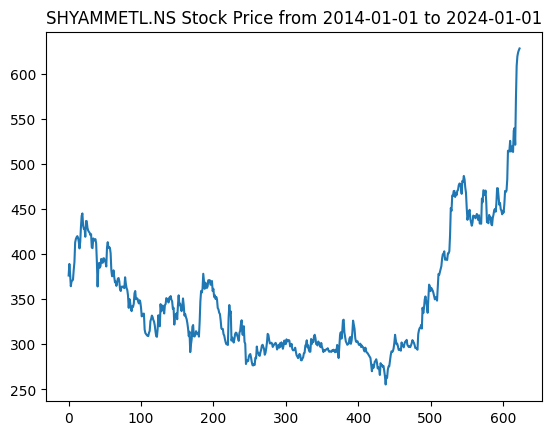

Epoch [1/33], Loss: 0.0198, Validation Loss: 0.1054
Epoch [2/33], Loss: 0.0064, Validation Loss: 0.1243
Epoch [3/33], Loss: 0.0067, Validation Loss: 0.1279
Epoch [4/33], Loss: 0.0071, Validation Loss: 0.1170
Epoch [5/33], Loss: 0.0069, Validation Loss: 0.1122
Epoch [6/33], Loss: 0.0062, Validation Loss: 0.1137
Epoch [7/33], Loss: 0.0064, Validation Loss: 0.1125
Epoch [8/33], Loss: 0.0064, Validation Loss: 0.1072
Epoch [9/33], Loss: 0.0063, Validation Loss: 0.0971
Epoch [10/33], Loss: 0.0056, Validation Loss: 0.0811
Epoch [11/33], Loss: 0.0050, Validation Loss: 0.0278
Epoch [12/33], Loss: 0.0034, Validation Loss: 0.0847
Epoch [13/33], Loss: 0.0152, Validation Loss: 0.1201
Epoch [14/33], Loss: 0.0084, Validation Loss: 0.1239
Epoch [15/33], Loss: 0.0073, Validation Loss: 0.1040
Epoch [16/33], Loss: 0.0065, Validation Loss: 0.0980
Epoch [17/33], Loss: 0.0057, Validation Loss: 0.1032
Epoch [18/33], Loss: 0.0057, Validation Loss: 0.1046
Epoch [19/33], Loss: 0.0057, Validation Loss: 0.0987
Ep

[*********************100%***********************]  1 of 1 completed


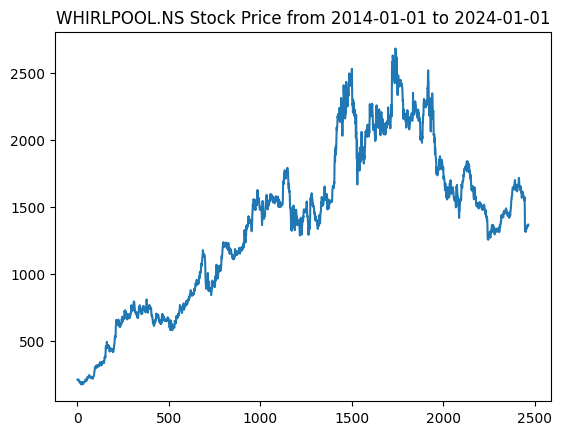

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0269, Validation Loss: 0.0754
Epoch [2/33], Loss: 0.1678, Validation Loss: 0.0028
Epoch [3/33], Loss: 0.0970, Validation Loss: 0.0135
Epoch [4/33], Loss: 0.0703, Validation Loss: 0.0006
Epoch [5/33], Loss: 0.0202, Validation Loss: 0.0246
Epoch [6/33], Loss: 0.0065, Validation Loss: 0.0059
Epoch [7/33], Loss: 0.0032, Validation Loss: 0.0012
Epoch [8/33], Loss: 0.0028, Validation Loss: 0.0002
Epoch [9/33], Loss: 0.0024, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0030, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0027, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0039, Validation Loss: 0.0019
Epoch [13/33], Loss: 0.0033, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0032, Validation Loss: 0.0013
Epoch [15/33], Loss: 0.0036, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0029, Validation Loss: 0.0009
Epoch [17/33], Loss: 0.0024, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0023, Validation Loss: 0.0029
Epoch [19/33], Loss: 0.0027, Validation Loss: 0.0036
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0126, Validation Loss: 0.0370


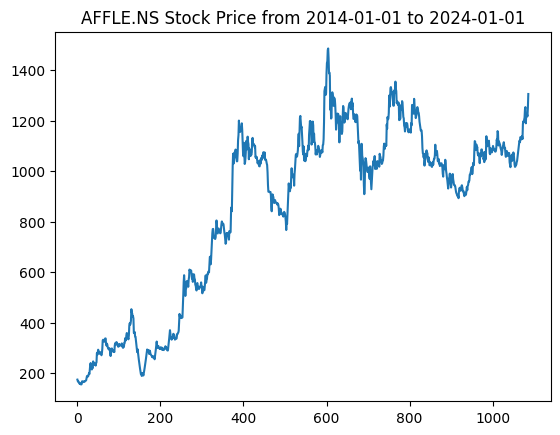

Epoch [1/33], Loss: 0.0497, Validation Loss: 0.0039
Epoch [2/33], Loss: 0.2015, Validation Loss: 0.1316
Epoch [3/33], Loss: 0.0605, Validation Loss: 0.0049
Epoch [4/33], Loss: 0.1077, Validation Loss: 0.0120
Epoch [5/33], Loss: 0.0537, Validation Loss: 0.0028
Epoch [6/33], Loss: 0.0436, Validation Loss: 0.0161
Epoch [7/33], Loss: 0.0272, Validation Loss: 0.0083
Epoch [8/33], Loss: 0.0244, Validation Loss: 0.0222
Epoch [9/33], Loss: 0.0078, Validation Loss: 0.0010
Epoch [10/33], Loss: 0.0069, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0042, Validation Loss: 0.0036
Epoch [12/33], Loss: 0.0049, Validation Loss: 0.0010
Epoch [13/33], Loss: 0.0058, Validation Loss: 0.0004
Epoch [14/33], Loss: 0.0040, Validation Loss: 0.0026
Epoch [15/33], Loss: 0.0044, Validation Loss: 0.0011
Epoch [16/33], Loss: 0.0044, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0037, Validation Loss: 0.0009
Epoch [18/33], Loss: 0.0042, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0035, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0032, Validation Loss: 0.0009


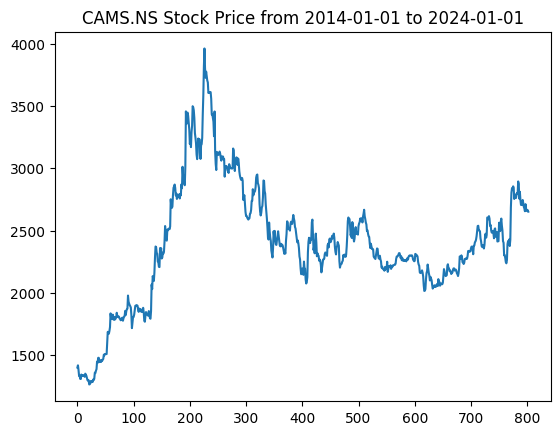

Epoch [1/33], Loss: 0.1252, Validation Loss: 0.0102
Epoch [2/33], Loss: 0.0370, Validation Loss: 0.0007
Epoch [3/33], Loss: 0.0347, Validation Loss: 0.0022
Epoch [4/33], Loss: 0.0297, Validation Loss: 0.0011
Epoch [5/33], Loss: 0.0290, Validation Loss: 0.0013
Epoch [6/33], Loss: 0.0255, Validation Loss: 0.0015
Epoch [7/33], Loss: 0.0206, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0091, Validation Loss: 0.0033
Epoch [9/33], Loss: 0.0607, Validation Loss: 0.0404
Epoch [10/33], Loss: 0.0513, Validation Loss: 0.0008
Epoch [11/33], Loss: 0.0298, Validation Loss: 0.0076
Epoch [12/33], Loss: 0.0242, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0240, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0195, Validation Loss: 0.0016
Epoch [15/33], Loss: 0.0136, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0072, Validation Loss: 0.0005
Epoch [17/33], Loss: 0.0089, Validation Loss: 0.0022
Epoch [18/33], Loss: 0.0089, Validation Loss: 0.0019
Epoch [19/33], Loss: 0.0071, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


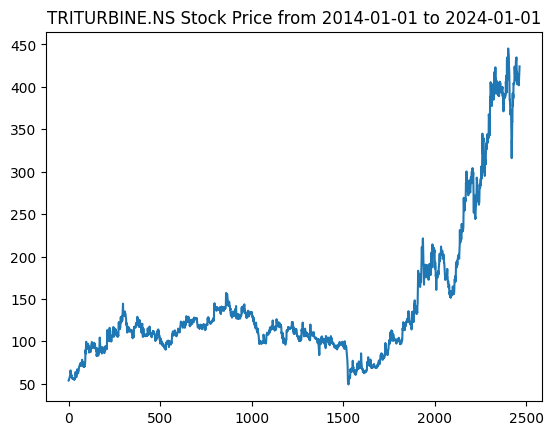

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0100, Validation Loss: 0.1209
Epoch [2/33], Loss: 0.0078, Validation Loss: 0.1216
Epoch [3/33], Loss: 0.0074, Validation Loss: 0.1085
Epoch [4/33], Loss: 0.0068, Validation Loss: 0.1009
Epoch [5/33], Loss: 0.0064, Validation Loss: 0.0950
Epoch [6/33], Loss: 0.0060, Validation Loss: 0.0927
Epoch [7/33], Loss: 0.0060, Validation Loss: 0.0887
Epoch [8/33], Loss: 0.0058, Validation Loss: 0.0882
Epoch [9/33], Loss: 0.0053, Validation Loss: 0.0782
Epoch [10/33], Loss: 0.0048, Validation Loss: 0.0843
Epoch [11/33], Loss: 0.0046, Validation Loss: 0.0654
Epoch [12/33], Loss: 0.0037, Validation Loss: 0.0484
Epoch [13/33], Loss: 0.0012, Validation Loss: 0.0074
Epoch [14/33], Loss: 0.0009, Validation Loss: 0.0004
Epoch [15/33], Loss: 0.0007, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0009, Validation Loss: 0.0044
Epoch [17/33], Loss: 0.0010, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0025, Validation Loss: 0.0339
Epoch [19/33], Loss: 0.0007, Validation Loss: 0.0011
Ep

[*********************100%***********************]  1 of 1 completed


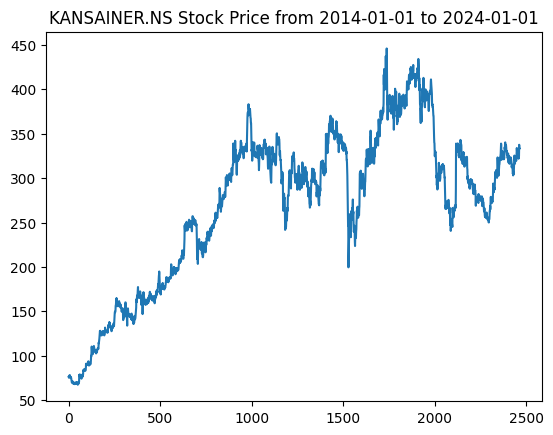

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0212, Validation Loss: 0.1494
Epoch [2/33], Loss: 0.1737, Validation Loss: 0.0046
Epoch [3/33], Loss: 0.0633, Validation Loss: 0.0779
Epoch [4/33], Loss: 0.0553, Validation Loss: 0.0212
Epoch [5/33], Loss: 0.0156, Validation Loss: 0.0018
Epoch [6/33], Loss: 0.0098, Validation Loss: 0.0044
Epoch [7/33], Loss: 0.0117, Validation Loss: 0.0011
Epoch [8/33], Loss: 0.0044, Validation Loss: 0.0063
Epoch [9/33], Loss: 0.0091, Validation Loss: 0.0067
Epoch [10/33], Loss: 0.0058, Validation Loss: 0.0037
Epoch [11/33], Loss: 0.0060, Validation Loss: 0.0009
Epoch [12/33], Loss: 0.0042, Validation Loss: 0.0045
Epoch [13/33], Loss: 0.0085, Validation Loss: 0.0033
Epoch [14/33], Loss: 0.0032, Validation Loss: 0.0038
Epoch [15/33], Loss: 0.0040, Validation Loss: 0.0006
Epoch [16/33], Loss: 0.0026, Validation Loss: 0.0067
Epoch [17/33], Loss: 0.0056, Validation Loss: 0.0018
Epoch [18/33], Loss: 0.0034, Validation Loss: 0.0076
Epoch [19/33], Loss: 0.0057, Validation Loss: 0.0027
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0045, Validation Loss: 0.0009


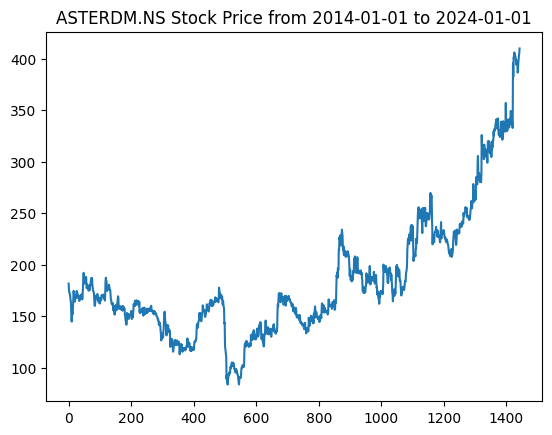

Epoch [1/33], Loss: 0.0267, Validation Loss: 0.0390
Epoch [2/33], Loss: 0.0305, Validation Loss: 0.0883
Epoch [3/33], Loss: 0.0133, Validation Loss: 0.0409
Epoch [4/33], Loss: 0.0202, Validation Loss: 0.0594
Epoch [5/33], Loss: 0.0139, Validation Loss: 0.0410
Epoch [6/33], Loss: 0.0150, Validation Loss: 0.0330
Epoch [7/33], Loss: 0.0071, Validation Loss: 0.0034
Epoch [8/33], Loss: 0.0059, Validation Loss: 0.0005
Epoch [9/33], Loss: 0.0032, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0034, Validation Loss: 0.0003
Epoch [11/33], Loss: 0.0025, Validation Loss: 0.0019
Epoch [12/33], Loss: 0.0017, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0016, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0012, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0013, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0010, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0012, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0010, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0008, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


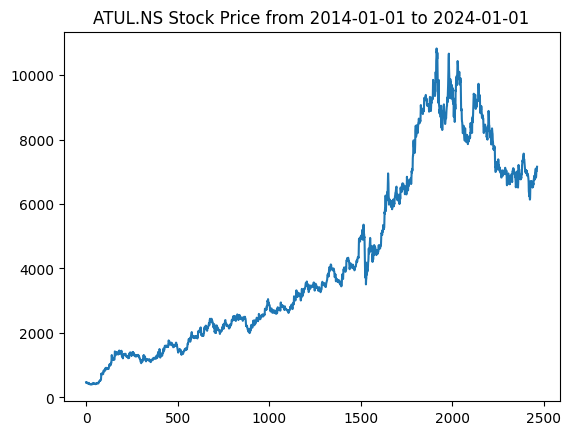

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0066, Validation Loss: 0.0036
Epoch [2/33], Loss: 0.1226, Validation Loss: 0.2750
Epoch [3/33], Loss: 0.0757, Validation Loss: 0.2412
Epoch [4/33], Loss: 0.0632, Validation Loss: 0.1629
Epoch [5/33], Loss: 0.0358, Validation Loss: 0.0486
Epoch [6/33], Loss: 0.0276, Validation Loss: 0.0491
Epoch [7/33], Loss: 0.0064, Validation Loss: 0.0056
Epoch [8/33], Loss: 0.0065, Validation Loss: 0.0046
Epoch [9/33], Loss: 0.0104, Validation Loss: 0.0011
Epoch [10/33], Loss: 0.0154, Validation Loss: 0.0508
Epoch [11/33], Loss: 0.0293, Validation Loss: 0.0449
Epoch [12/33], Loss: 0.0248, Validation Loss: 0.0277
Epoch [13/33], Loss: 0.0282, Validation Loss: 0.0550
Epoch [14/33], Loss: 0.0158, Validation Loss: 0.0024
Epoch [15/33], Loss: 0.0087, Validation Loss: 0.0050
Epoch [16/33], Loss: 0.0164, Validation Loss: 0.0031
Epoch [17/33], Loss: 0.0155, Validation Loss: 0.0306
Epoch [18/33], Loss: 0.0156, Validation Loss: 0.0019
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


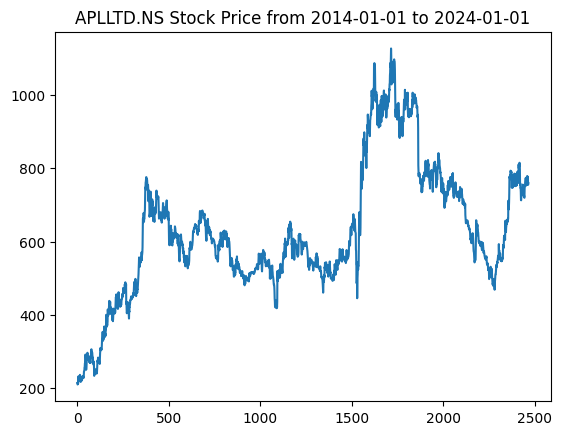

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0363, Validation Loss: 0.1772
Epoch [2/33], Loss: 0.1034, Validation Loss: 0.0071
Epoch [3/33], Loss: 0.0459, Validation Loss: 0.0045
Epoch [4/33], Loss: 0.0409, Validation Loss: 0.0158
Epoch [5/33], Loss: 0.0522, Validation Loss: 0.0039
Epoch [6/33], Loss: 0.0277, Validation Loss: 0.0183
Epoch [7/33], Loss: 0.0169, Validation Loss: 0.0072
Epoch [8/33], Loss: 0.0070, Validation Loss: 0.0012
Epoch [9/33], Loss: 0.0029, Validation Loss: 0.0038
Epoch [10/33], Loss: 0.0028, Validation Loss: 0.0006
Epoch [11/33], Loss: 0.0019, Validation Loss: 0.0020
Epoch [12/33], Loss: 0.0018, Validation Loss: 0.0010
Epoch [13/33], Loss: 0.0018, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0013
Epoch [15/33], Loss: 0.0020, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0016
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0002
Epoch [19/33], Loss: 0.0021, Validation Loss: 0.0028
Ep

[*********************100%***********************]  1 of 1 completed


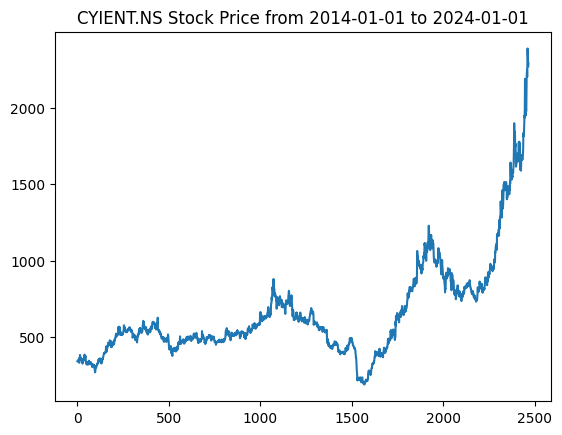

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0119, Validation Loss: 0.0171
Epoch [2/33], Loss: 0.0089, Validation Loss: 0.0138
Epoch [3/33], Loss: 0.0088, Validation Loss: 0.0127
Epoch [4/33], Loss: 0.0083, Validation Loss: 0.0092
Epoch [5/33], Loss: 0.0070, Validation Loss: 0.0031
Epoch [6/33], Loss: 0.0034, Validation Loss: 0.0024
Epoch [7/33], Loss: 0.0013, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0008, Validation Loss: 0.0002
Epoch [9/33], Loss: 0.0006, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0010, Validation Loss: 0.0015
Epoch [11/33], Loss: 0.0042, Validation Loss: 0.0026
Epoch [12/33], Loss: 0.0020, Validation Loss: 0.0042
Epoch [13/33], Loss: 0.0050, Validation Loss: 0.0048
Epoch [14/33], Loss: 0.0008, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0012, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0019, Validation Loss: 0.0002
Epoch [17/33], Loss: 0.0032, Validation Loss: 0.0013
Epoch [18/33], Loss: 0.0009, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0007
Ep

[*********************100%***********************]  1 of 1 completed


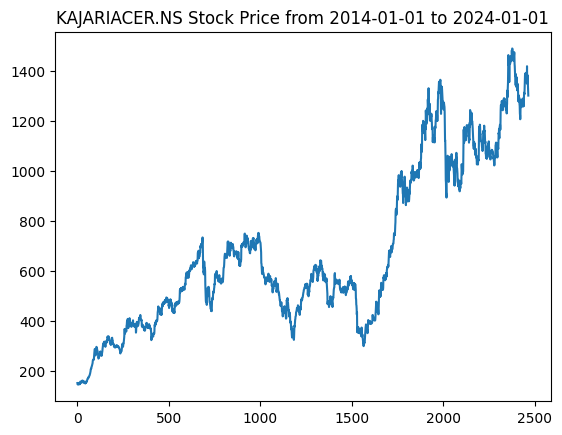

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0447, Validation Loss: 0.1499
Epoch [2/33], Loss: 0.0348, Validation Loss: 0.0728
Epoch [3/33], Loss: 0.0341, Validation Loss: 0.0113
Epoch [4/33], Loss: 0.0134, Validation Loss: 0.0162
Epoch [5/33], Loss: 0.0043, Validation Loss: 0.0019
Epoch [6/33], Loss: 0.0041, Validation Loss: 0.0040
Epoch [7/33], Loss: 0.0094, Validation Loss: 0.0292
Epoch [8/33], Loss: 0.0096, Validation Loss: 0.0031
Epoch [9/33], Loss: 0.0155, Validation Loss: 0.0517
Epoch [10/33], Loss: 0.0239, Validation Loss: 0.0450
Epoch [11/33], Loss: 0.0133, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0069, Validation Loss: 0.0185
Epoch [13/33], Loss: 0.0162, Validation Loss: 0.0313
Epoch [14/33], Loss: 0.0096, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0048, Validation Loss: 0.0031
Epoch [16/33], Loss: 0.0143, Validation Loss: 0.0333
Epoch [17/33], Loss: 0.0092, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0030, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0047, Validation Loss: 0.0073
Ep

[*********************100%***********************]  1 of 1 completed


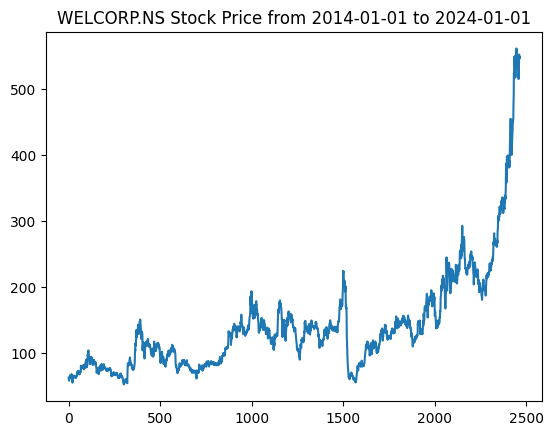

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0050, Validation Loss: 0.0446
Epoch [2/33], Loss: 0.0053, Validation Loss: 0.0283
Epoch [3/33], Loss: 0.0070, Validation Loss: 0.0314
Epoch [4/33], Loss: 0.0065, Validation Loss: 0.0380
Epoch [5/33], Loss: 0.0059, Validation Loss: 0.0411
Epoch [6/33], Loss: 0.0053, Validation Loss: 0.0404
Epoch [7/33], Loss: 0.0052, Validation Loss: 0.0378
Epoch [8/33], Loss: 0.0050, Validation Loss: 0.0340
Epoch [9/33], Loss: 0.0048, Validation Loss: 0.0101
Epoch [10/33], Loss: 0.0039, Validation Loss: 0.0235
Epoch [11/33], Loss: 0.0054, Validation Loss: 0.0152
Epoch [12/33], Loss: 0.0023, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0014, Validation Loss: 0.0054
Epoch [14/33], Loss: 0.0007, Validation Loss: 0.0008
Epoch [15/33], Loss: 0.0004, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0004, Validation Loss: 0.0009
Epoch [17/33], Loss: 0.0004, Validation Loss: 0.0015
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0014
Epoch [19/33], Loss: 0.0004, Validation Loss: 0.0009
Ep

[*********************100%***********************]  1 of 1 completed


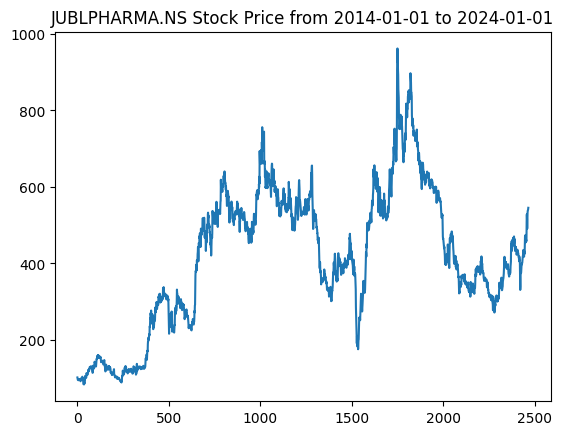

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0574, Validation Loss: 0.0023
Epoch [2/33], Loss: 0.0493, Validation Loss: 0.0784
Epoch [3/33], Loss: 0.0921, Validation Loss: 0.0135
Epoch [4/33], Loss: 0.0398, Validation Loss: 0.0108
Epoch [5/33], Loss: 0.0213, Validation Loss: 0.0129
Epoch [6/33], Loss: 0.0168, Validation Loss: 0.0064
Epoch [7/33], Loss: 0.0105, Validation Loss: 0.0087
Epoch [8/33], Loss: 0.0034, Validation Loss: 0.0010
Epoch [9/33], Loss: 0.0038, Validation Loss: 0.0032
Epoch [10/33], Loss: 0.0044, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0025, Validation Loss: 0.0024
Epoch [12/33], Loss: 0.0032, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0011
Epoch [14/33], Loss: 0.0022, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0020, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0016, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0019, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0017, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0020, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


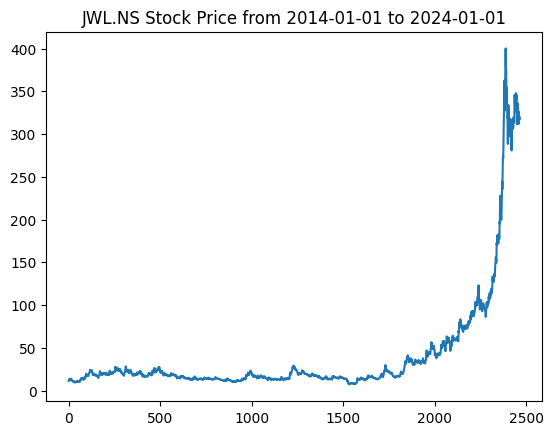

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0010, Validation Loss: 0.0106
Epoch [2/33], Loss: 0.0007, Validation Loss: 0.0111
Epoch [3/33], Loss: 0.0006, Validation Loss: 0.0116
Epoch [4/33], Loss: 0.0006, Validation Loss: 0.0123
Epoch [5/33], Loss: 0.0007, Validation Loss: 0.0125
Epoch [6/33], Loss: 0.0007, Validation Loss: 0.0134
Epoch [7/33], Loss: 0.0008, Validation Loss: 0.0151
Epoch [8/33], Loss: 0.0008, Validation Loss: 0.0160
Epoch [9/33], Loss: 0.0007, Validation Loss: 0.0170
Epoch [10/33], Loss: 0.0007, Validation Loss: 0.0169
Epoch [11/33], Loss: 0.0006, Validation Loss: 0.0169
Epoch [12/33], Loss: 0.0006, Validation Loss: 0.0167
Epoch [13/33], Loss: 0.0006, Validation Loss: 0.0167
Epoch [14/33], Loss: 0.0006, Validation Loss: 0.0166
Epoch [15/33], Loss: 0.0006, Validation Loss: 0.0166
Epoch [16/33], Loss: 0.0006, Validation Loss: 0.0166
Epoch [17/33], Loss: 0.0005, Validation Loss: 0.0165
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0165
Epoch [19/33], Loss: 0.0005, Validation Loss: 0.0165
Ep

[*********************100%***********************]  1 of 1 completed


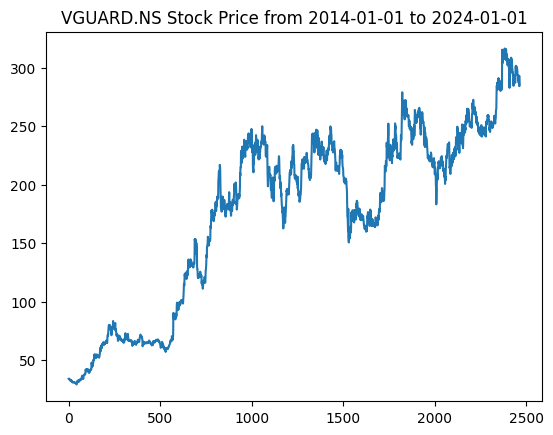

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0367, Validation Loss: 0.0202
Epoch [2/33], Loss: 0.1100, Validation Loss: 0.0028
Epoch [3/33], Loss: 0.0978, Validation Loss: 0.0030
Epoch [4/33], Loss: 0.0490, Validation Loss: 0.0097
Epoch [5/33], Loss: 0.0144, Validation Loss: 0.0004
Epoch [6/33], Loss: 0.0068, Validation Loss: 0.0010
Epoch [7/33], Loss: 0.0073, Validation Loss: 0.0008
Epoch [8/33], Loss: 0.0029, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0043, Validation Loss: 0.0004
Epoch [10/33], Loss: 0.0058, Validation Loss: 0.0018
Epoch [11/33], Loss: 0.0063, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0033, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0043, Validation Loss: 0.0004
Epoch [14/33], Loss: 0.0029, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0041, Validation Loss: 0.0011
Epoch [16/33], Loss: 0.0058, Validation Loss: 0.0033
Epoch [17/33], Loss: 0.0057, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0045, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0065, Validation Loss: 0.0043
Ep

[*********************100%***********************]  1 of 1 completed


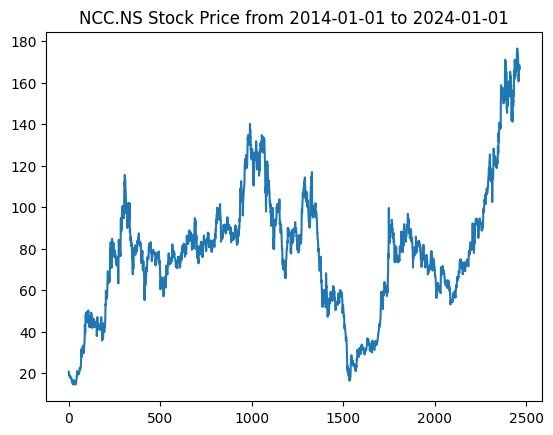

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0363, Validation Loss: 0.0187
Epoch [2/33], Loss: 0.0504, Validation Loss: 0.0025
Epoch [3/33], Loss: 0.0344, Validation Loss: 0.0033
Epoch [4/33], Loss: 0.0287, Validation Loss: 0.0018
Epoch [5/33], Loss: 0.0217, Validation Loss: 0.0018
Epoch [6/33], Loss: 0.0124, Validation Loss: 0.0039
Epoch [7/33], Loss: 0.0069, Validation Loss: 0.0084
Epoch [8/33], Loss: 0.0330, Validation Loss: 0.0021
Epoch [9/33], Loss: 0.0148, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0069, Validation Loss: 0.0013
Epoch [11/33], Loss: 0.0028, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0018, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0018, Validation Loss: 0.0007
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0005
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0015, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0014, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


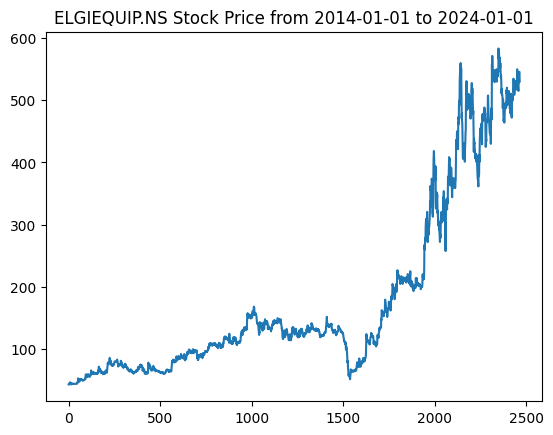

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0106, Validation Loss: 0.2930
Epoch [2/33], Loss: 0.0127, Validation Loss: 0.2567
Epoch [3/33], Loss: 0.0160, Validation Loss: 0.2845
Epoch [4/33], Loss: 0.0146, Validation Loss: 0.2962
Epoch [5/33], Loss: 0.0125, Validation Loss: 0.2855
Epoch [6/33], Loss: 0.0121, Validation Loss: 0.2491
Epoch [7/33], Loss: 0.0106, Validation Loss: 0.1412
Epoch [8/33], Loss: 0.0299, Validation Loss: 0.0943
Epoch [9/33], Loss: 0.0083, Validation Loss: 0.1524
Epoch [10/33], Loss: 0.0067, Validation Loss: 0.0880
Epoch [11/33], Loss: 0.0048, Validation Loss: 0.0316
Epoch [12/33], Loss: 0.0044, Validation Loss: 0.0267
Epoch [13/33], Loss: 0.0056, Validation Loss: 0.1233
Epoch [14/33], Loss: 0.0040, Validation Loss: 0.0457
Epoch [15/33], Loss: 0.0020, Validation Loss: 0.0258
Epoch [16/33], Loss: 0.0028, Validation Loss: 0.0951
Epoch [17/33], Loss: 0.0039, Validation Loss: 0.0361
Epoch [18/33], Loss: 0.0019, Validation Loss: 0.0173
Epoch [19/33], Loss: 0.0026, Validation Loss: 0.0840
Ep

[*********************100%***********************]  1 of 1 completed


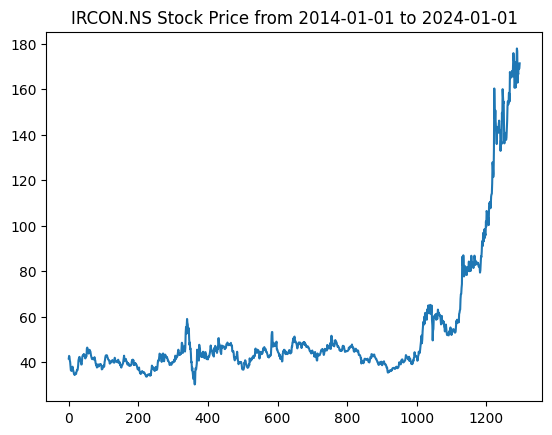

Epoch [1/33], Loss: 0.0022, Validation Loss: 0.0316
Epoch [2/33], Loss: 0.0018, Validation Loss: 0.0320
Epoch [3/33], Loss: 0.0017, Validation Loss: 0.0351
Epoch [4/33], Loss: 0.0015, Validation Loss: 0.0332
Epoch [5/33], Loss: 0.0016, Validation Loss: 0.0339
Epoch [6/33], Loss: 0.0015, Validation Loss: 0.0336
Epoch [7/33], Loss: 0.0015, Validation Loss: 0.0335
Epoch [8/33], Loss: 0.0015, Validation Loss: 0.0334
Epoch [9/33], Loss: 0.0015, Validation Loss: 0.0333
Epoch [10/33], Loss: 0.0015, Validation Loss: 0.0331
Epoch [11/33], Loss: 0.0015, Validation Loss: 0.0324
Epoch [12/33], Loss: 0.0015, Validation Loss: 0.0326
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0311
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0304
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0281
Epoch [16/33], Loss: 0.0014, Validation Loss: 0.0248
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0231
Epoch [18/33], Loss: 0.0013, Validation Loss: 0.0174
Epoch [19/33], Loss: 0.0012, Validation Loss: 0.0123
Ep

[*********************100%***********************]  1 of 1 completed


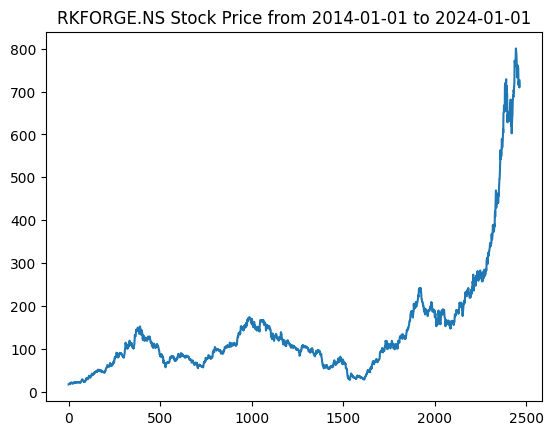

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0070, Validation Loss: 0.0223
Epoch [2/33], Loss: 0.0045, Validation Loss: 0.0199
Epoch [3/33], Loss: 0.0043, Validation Loss: 0.0179
Epoch [4/33], Loss: 0.0042, Validation Loss: 0.0166
Epoch [5/33], Loss: 0.0041, Validation Loss: 0.0158
Epoch [6/33], Loss: 0.0040, Validation Loss: 0.0176
Epoch [7/33], Loss: 0.0024, Validation Loss: 0.0022
Epoch [8/33], Loss: 0.0025, Validation Loss: 0.0038
Epoch [9/33], Loss: 0.0012, Validation Loss: 0.0002
Epoch [10/33], Loss: 0.0019, Validation Loss: 0.0030
Epoch [11/33], Loss: 0.0010, Validation Loss: 0.0023
Epoch [12/33], Loss: 0.0006, Validation Loss: 0.0001
Epoch [13/33], Loss: 0.0005, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0003, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0005, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0003, Validation Loss: 0.0001
Epoch [17/33], Loss: 0.0003, Validation Loss: 0.0001
Epoch [18/33], Loss: 0.0004, Validation Loss: 0.0002
Epoch [19/33], Loss: 0.0006, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


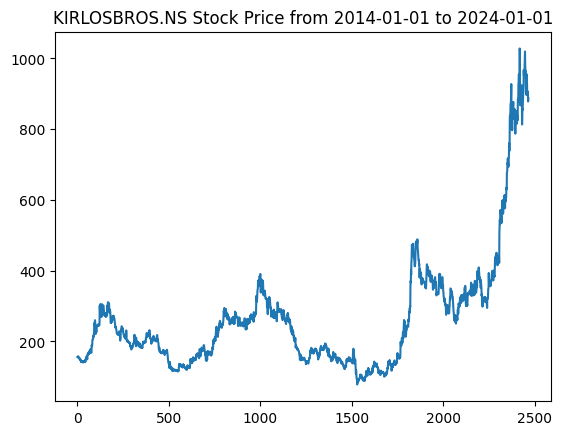

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0136, Validation Loss: 0.0186
Epoch [2/33], Loss: 0.0100, Validation Loss: 0.0207
Epoch [3/33], Loss: 0.0093, Validation Loss: 0.0192
Epoch [4/33], Loss: 0.0036, Validation Loss: 0.0009
Epoch [5/33], Loss: 0.0075, Validation Loss: 0.0102
Epoch [6/33], Loss: 0.0016, Validation Loss: 0.0008
Epoch [7/33], Loss: 0.0010, Validation Loss: 0.0009
Epoch [8/33], Loss: 0.0017, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0011, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0008, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0009, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0009, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0011, Validation Loss: 0.0003
Epoch [14/33], Loss: 0.0012, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0011, Validation Loss: 0.0003
Epoch [16/33], Loss: 0.0007, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0005, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0007, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0005, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


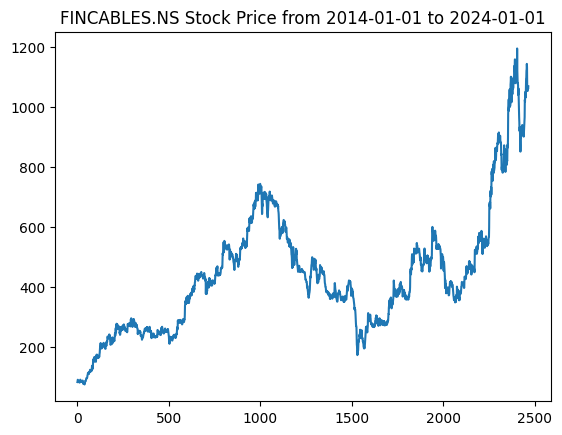

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0259, Validation Loss: 0.0359
Epoch [2/33], Loss: 0.0266, Validation Loss: 0.0054
Epoch [3/33], Loss: 0.0243, Validation Loss: 0.0031
Epoch [4/33], Loss: 0.0234, Validation Loss: 0.0029
Epoch [5/33], Loss: 0.0217, Validation Loss: 0.0023
Epoch [6/33], Loss: 0.0185, Validation Loss: 0.0035
Epoch [7/33], Loss: 0.0131, Validation Loss: 0.0031
Epoch [8/33], Loss: 0.0063, Validation Loss: 0.0026
Epoch [9/33], Loss: 0.0015, Validation Loss: 0.0012
Epoch [10/33], Loss: 0.0011, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0010, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0014, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0007, Validation Loss: 0.0001
Epoch [14/33], Loss: 0.0007, Validation Loss: 0.0001
Epoch [15/33], Loss: 0.0006, Validation Loss: 0.0001
Epoch [16/33], Loss: 0.0007, Validation Loss: 0.0002
Epoch [17/33], Loss: 0.0009, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0007, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


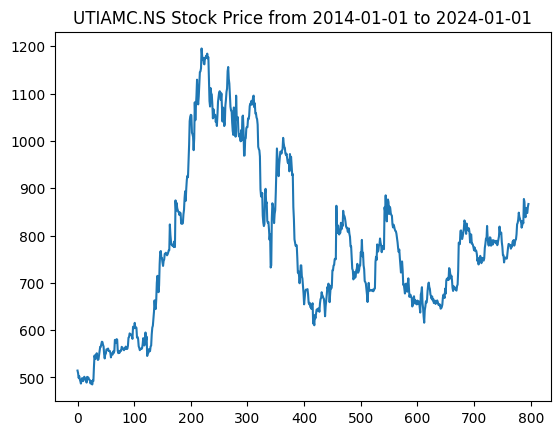

Epoch [1/33], Loss: 0.1680, Validation Loss: 0.0077
Epoch [2/33], Loss: 0.0768, Validation Loss: 0.0011
Epoch [3/33], Loss: 0.0651, Validation Loss: 0.0051
Epoch [4/33], Loss: 0.0535, Validation Loss: 0.0024
Epoch [5/33], Loss: 0.0392, Validation Loss: 0.0036
Epoch [6/33], Loss: 0.0145, Validation Loss: 0.0014
Epoch [7/33], Loss: 0.0096, Validation Loss: 0.0004
Epoch [8/33], Loss: 0.0126, Validation Loss: 0.0083
Epoch [9/33], Loss: 0.0247, Validation Loss: 0.0213
Epoch [10/33], Loss: 0.0428, Validation Loss: 0.0131
Epoch [11/33], Loss: 0.0221, Validation Loss: 0.0008
Epoch [12/33], Loss: 0.0151, Validation Loss: 0.0011
Epoch [13/33], Loss: 0.0060, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0057, Validation Loss: 0.0016
Epoch [15/33], Loss: 0.0040, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0045, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0038, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0039, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0039, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


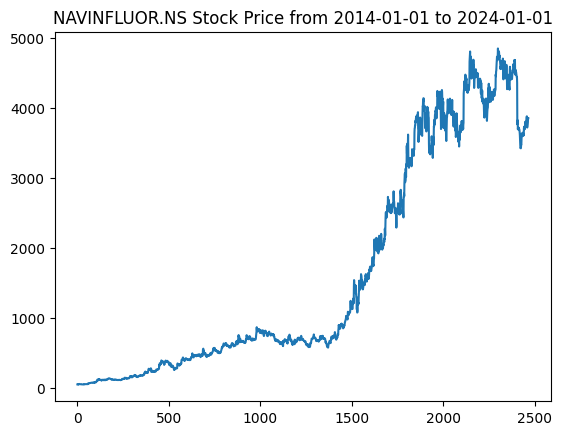

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0342, Validation Loss: 0.0416
Epoch [2/33], Loss: 0.1277, Validation Loss: 0.4899
Epoch [3/33], Loss: 0.0618, Validation Loss: 0.3891
Epoch [4/33], Loss: 0.0566, Validation Loss: 0.2195
Epoch [5/33], Loss: 0.0760, Validation Loss: 0.3078
Epoch [6/33], Loss: 0.0612, Validation Loss: 0.4031
Epoch [7/33], Loss: 0.0349, Validation Loss: 0.1392
Epoch [8/33], Loss: 0.0420, Validation Loss: 0.1853
Epoch [9/33], Loss: 0.0387, Validation Loss: 0.2502
Epoch [10/33], Loss: 0.0418, Validation Loss: 0.1399
Epoch [11/33], Loss: 0.0112, Validation Loss: 0.0098
Epoch [12/33], Loss: 0.0082, Validation Loss: 0.0014
Epoch [13/33], Loss: 0.0050, Validation Loss: 0.0120
Epoch [14/33], Loss: 0.0074, Validation Loss: 0.0012
Epoch [15/33], Loss: 0.0045, Validation Loss: 0.0058
Epoch [16/33], Loss: 0.0063, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0038, Validation Loss: 0.0040
Epoch [18/33], Loss: 0.0058, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0060, Validation Loss: 0.0139
Ep

[*********************100%***********************]  1 of 1 completed


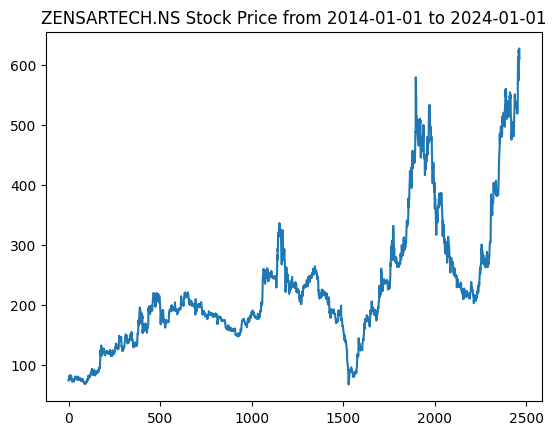

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0304, Validation Loss: 0.0083
Epoch [2/33], Loss: 0.0417, Validation Loss: 0.0136
Epoch [3/33], Loss: 0.0283, Validation Loss: 0.0040
Epoch [4/33], Loss: 0.0279, Validation Loss: 0.0113
Epoch [5/33], Loss: 0.0044, Validation Loss: 0.0033
Epoch [6/33], Loss: 0.0060, Validation Loss: 0.0005
Epoch [7/33], Loss: 0.0284, Validation Loss: 0.0054
Epoch [8/33], Loss: 0.0108, Validation Loss: 0.0005
Epoch [9/33], Loss: 0.0048, Validation Loss: 0.0013
Epoch [10/33], Loss: 0.0104, Validation Loss: 0.0030
Epoch [11/33], Loss: 0.0049, Validation Loss: 0.0008
Epoch [12/33], Loss: 0.0013, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0008, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0009, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0022, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0032, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0051, Validation Loss: 0.0009
Epoch [18/33], Loss: 0.0042, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0057, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


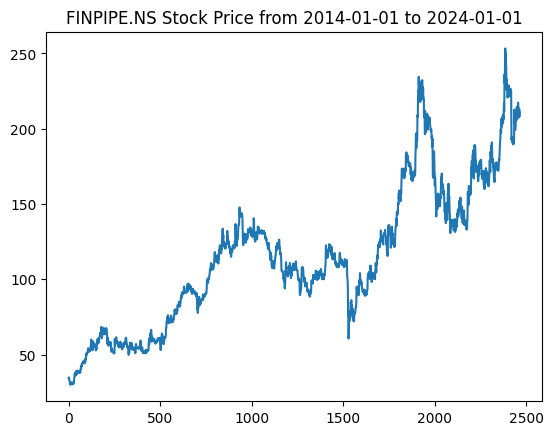

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0429, Validation Loss: 0.0464
Epoch [2/33], Loss: 0.0361, Validation Loss: 0.0027
Epoch [3/33], Loss: 0.0630, Validation Loss: 0.0167
Epoch [4/33], Loss: 0.0238, Validation Loss: 0.0013
Epoch [5/33], Loss: 0.0070, Validation Loss: 0.0016
Epoch [6/33], Loss: 0.0018, Validation Loss: 0.0031
Epoch [7/33], Loss: 0.0025, Validation Loss: 0.0073
Epoch [8/33], Loss: 0.0075, Validation Loss: 0.0036
Epoch [9/33], Loss: 0.0103, Validation Loss: 0.0242
Epoch [10/33], Loss: 0.0079, Validation Loss: 0.0014
Epoch [11/33], Loss: 0.0115, Validation Loss: 0.0120
Epoch [12/33], Loss: 0.0097, Validation Loss: 0.0022
Epoch [13/33], Loss: 0.0142, Validation Loss: 0.0109
Epoch [14/33], Loss: 0.0180, Validation Loss: 0.0028
Epoch [15/33], Loss: 0.0126, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0034, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0065, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0146, Validation Loss: 0.0016
Epoch [19/33], Loss: 0.0160, Validation Loss: 0.0023
Ep

[*********************100%***********************]  1 of 1 completed


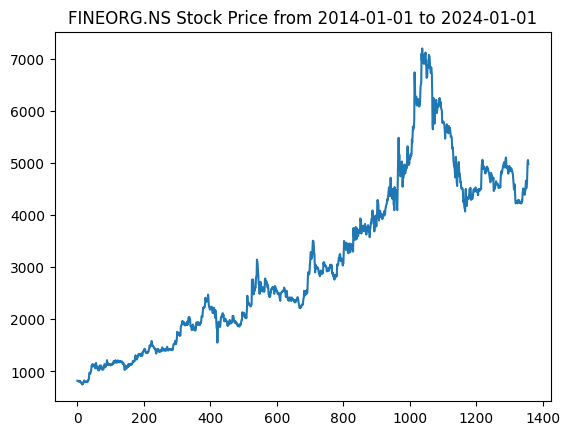

Epoch [1/33], Loss: 0.0079, Validation Loss: 0.1399
Epoch [2/33], Loss: 0.2076, Validation Loss: 0.1557
Epoch [3/33], Loss: 0.0733, Validation Loss: 0.1006
Epoch [4/33], Loss: 0.0536, Validation Loss: 0.0397
Epoch [5/33], Loss: 0.0626, Validation Loss: 0.0362
Epoch [6/33], Loss: 0.0276, Validation Loss: 0.0178
Epoch [7/33], Loss: 0.0587, Validation Loss: 0.0797
Epoch [8/33], Loss: 0.0246, Validation Loss: 0.0053
Epoch [9/33], Loss: 0.0174, Validation Loss: 0.0040
Epoch [10/33], Loss: 0.0044, Validation Loss: 0.0005
Epoch [11/33], Loss: 0.0044, Validation Loss: 0.0041
Epoch [12/33], Loss: 0.0036, Validation Loss: 0.0016
Epoch [13/33], Loss: 0.0064, Validation Loss: 0.0011
Epoch [14/33], Loss: 0.0108, Validation Loss: 0.0059
Epoch [15/33], Loss: 0.0173, Validation Loss: 0.0018
Epoch [16/33], Loss: 0.0179, Validation Loss: 0.0043
Epoch [17/33], Loss: 0.0088, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0076, Validation Loss: 0.0056
Epoch [19/33], Loss: 0.0239, Validation Loss: 0.0102
Ep

[*********************100%***********************]  1 of 1 completed


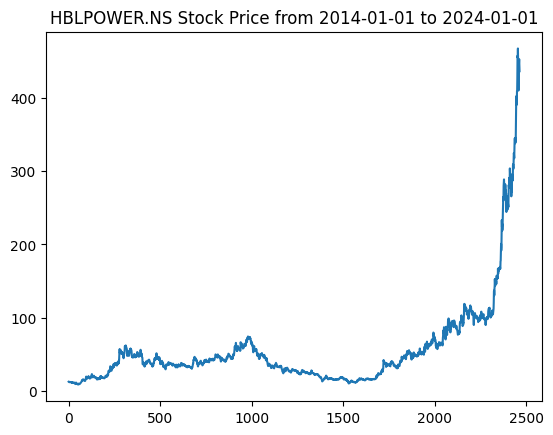

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0023, Validation Loss: 0.0231
Epoch [2/33], Loss: 0.0019, Validation Loss: 0.0241
Epoch [3/33], Loss: 0.0018, Validation Loss: 0.0232
Epoch [4/33], Loss: 0.0018, Validation Loss: 0.0216
Epoch [5/33], Loss: 0.0017, Validation Loss: 0.0186
Epoch [6/33], Loss: 0.0015, Validation Loss: 0.0170
Epoch [7/33], Loss: 0.0014, Validation Loss: 0.0169
Epoch [8/33], Loss: 0.0014, Validation Loss: 0.0168
Epoch [9/33], Loss: 0.0014, Validation Loss: 0.0168
Epoch [10/33], Loss: 0.0014, Validation Loss: 0.0168
Epoch [11/33], Loss: 0.0014, Validation Loss: 0.0167
Epoch [12/33], Loss: 0.0014, Validation Loss: 0.0167
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0167
Epoch [14/33], Loss: 0.0013, Validation Loss: 0.0166
Epoch [15/33], Loss: 0.0013, Validation Loss: 0.0165
Epoch [16/33], Loss: 0.0013, Validation Loss: 0.0165
Epoch [17/33], Loss: 0.0013, Validation Loss: 0.0165
Epoch [18/33], Loss: 0.0013, Validation Loss: 0.0165
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0164
Ep

[*********************100%***********************]  1 of 1 completed


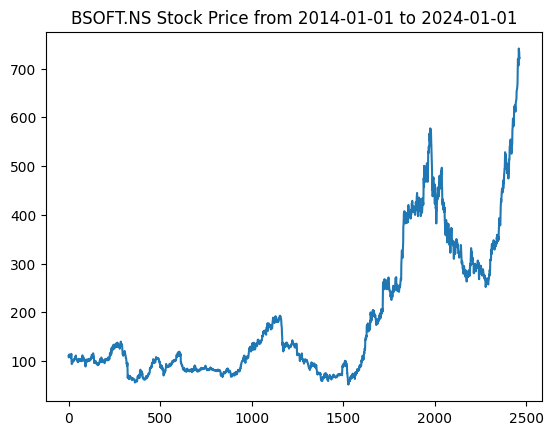

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0288, Validation Loss: 0.0446
Epoch [2/33], Loss: 0.0471, Validation Loss: 0.1053
Epoch [3/33], Loss: 0.0345, Validation Loss: 0.0916
Epoch [4/33], Loss: 0.0311, Validation Loss: 0.0770
Epoch [5/33], Loss: 0.0078, Validation Loss: 0.0097
Epoch [6/33], Loss: 0.0065, Validation Loss: 0.0035
Epoch [7/33], Loss: 0.0101, Validation Loss: 0.0254
Epoch [8/33], Loss: 0.0284, Validation Loss: 0.0813
Epoch [9/33], Loss: 0.0191, Validation Loss: 0.0369
Epoch [10/33], Loss: 0.0035, Validation Loss: 0.0005
Epoch [11/33], Loss: 0.0034, Validation Loss: 0.0028
Epoch [12/33], Loss: 0.0036, Validation Loss: 0.0026
Epoch [13/33], Loss: 0.0154, Validation Loss: 0.0412
Epoch [14/33], Loss: 0.0078, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0047, Validation Loss: 0.0023
Epoch [16/33], Loss: 0.0140, Validation Loss: 0.0290
Epoch [17/33], Loss: 0.0045, Validation Loss: 0.0006
Epoch [18/33], Loss: 0.0030, Validation Loss: 0.0008
Epoch [19/33], Loss: 0.0079, Validation Loss: 0.0110
Ep

[*********************100%***********************]  1 of 1 completed


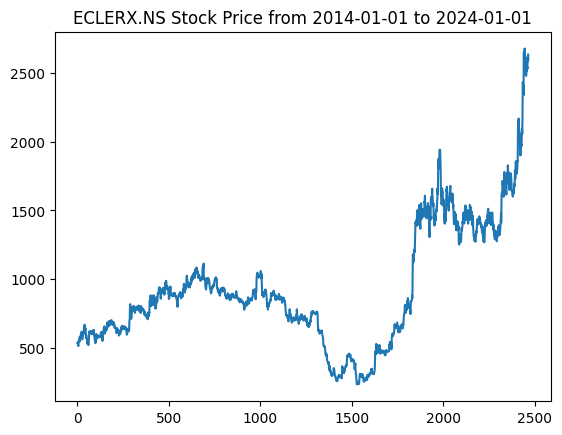

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0306, Validation Loss: 0.1641
Epoch [2/33], Loss: 0.0283, Validation Loss: 0.1453
Epoch [3/33], Loss: 0.0270, Validation Loss: 0.1061
Epoch [4/33], Loss: 0.0221, Validation Loss: 0.0871
Epoch [5/33], Loss: 0.0187, Validation Loss: 0.0780
Epoch [6/33], Loss: 0.0139, Validation Loss: 0.0604
Epoch [7/33], Loss: 0.0071, Validation Loss: 0.0222
Epoch [8/33], Loss: 0.0023, Validation Loss: 0.0015
Epoch [9/33], Loss: 0.0025, Validation Loss: 0.0023
Epoch [10/33], Loss: 0.0082, Validation Loss: 0.0208
Epoch [11/33], Loss: 0.0020, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0017, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0027, Validation Loss: 0.0019
Epoch [14/33], Loss: 0.0024, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0009, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0006, Validation Loss: 0.0003
Epoch [17/33], Loss: 0.0006, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed


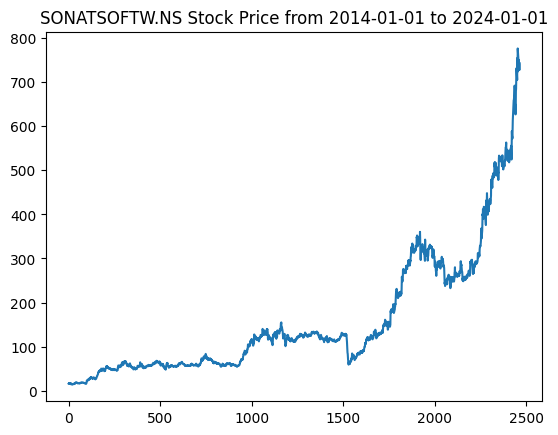

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0085, Validation Loss: 0.0153
Epoch [2/33], Loss: 0.0184, Validation Loss: 0.0304
Epoch [3/33], Loss: 0.0160, Validation Loss: 0.0381
Epoch [4/33], Loss: 0.0145, Validation Loss: 0.0410
Epoch [5/33], Loss: 0.0129, Validation Loss: 0.0402
Epoch [6/33], Loss: 0.0130, Validation Loss: 0.0392
Epoch [7/33], Loss: 0.0123, Validation Loss: 0.0351
Epoch [8/33], Loss: 0.0116, Validation Loss: 0.0294
Epoch [9/33], Loss: 0.0090, Validation Loss: 0.0014
Epoch [10/33], Loss: 0.0099, Validation Loss: 0.0282
Epoch [11/33], Loss: 0.0217, Validation Loss: 0.0316
Epoch [12/33], Loss: 0.0107, Validation Loss: 0.0368
Epoch [13/33], Loss: 0.0041, Validation Loss: 0.0008
Epoch [14/33], Loss: 0.0023, Validation Loss: 0.0048
Epoch [15/33], Loss: 0.0031, Validation Loss: 0.0050
Epoch [16/33], Loss: 0.0034, Validation Loss: 0.0087
Epoch [17/33], Loss: 0.0086, Validation Loss: 0.0272
Epoch [18/33], Loss: 0.0027, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0008, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


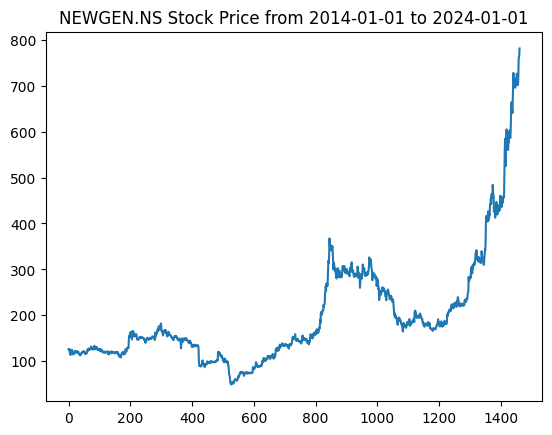

Epoch [1/33], Loss: 0.0205, Validation Loss: 0.0147
Epoch [2/33], Loss: 0.0134, Validation Loss: 0.0111
Epoch [3/33], Loss: 0.0118, Validation Loss: 0.0106
Epoch [4/33], Loss: 0.0111, Validation Loss: 0.0099
Epoch [5/33], Loss: 0.0110, Validation Loss: 0.0088
Epoch [6/33], Loss: 0.0104, Validation Loss: 0.0050
Epoch [7/33], Loss: 0.0081, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0104, Validation Loss: 0.0034
Epoch [9/33], Loss: 0.0031, Validation Loss: 0.0027
Epoch [10/33], Loss: 0.0016, Validation Loss: 0.0020
Epoch [11/33], Loss: 0.0010, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0008, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0013, Validation Loss: 0.0049
Epoch [14/33], Loss: 0.0039, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0019, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0009, Validation Loss: 0.0024
Epoch [17/33], Loss: 0.0022, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0013, Validation Loss: 0.0002
Epoch [19/33], Loss: 0.0011, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


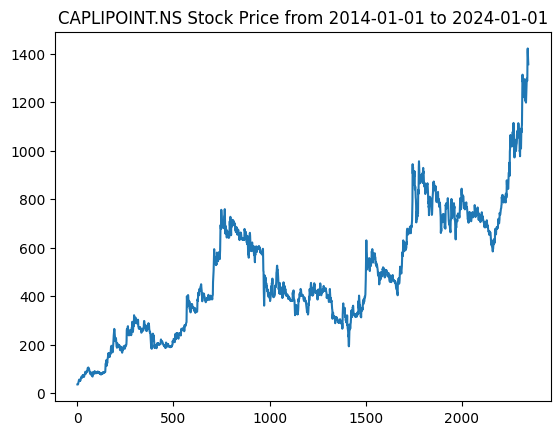

Epoch [1/33], Loss: 0.0295, Validation Loss: 0.0737
Epoch [2/33], Loss: 0.0189, Validation Loss: 0.0130
Epoch [3/33], Loss: 0.0259, Validation Loss: 0.0020
Epoch [4/33], Loss: 0.0214, Validation Loss: 0.0028
Epoch [5/33], Loss: 0.0048, Validation Loss: 0.0003
Epoch [6/33], Loss: 0.0043, Validation Loss: 0.0051
Epoch [7/33], Loss: 0.0066, Validation Loss: 0.0026
Epoch [8/33], Loss: 0.0052, Validation Loss: 0.0095
Epoch [9/33], Loss: 0.0072, Validation Loss: 0.0016
Epoch [10/33], Loss: 0.0050, Validation Loss: 0.0078
Epoch [11/33], Loss: 0.0078, Validation Loss: 0.0024
Epoch [12/33], Loss: 0.0065, Validation Loss: 0.0051
Epoch [13/33], Loss: 0.0056, Validation Loss: 0.0022
Epoch [14/33], Loss: 0.0041, Validation Loss: 0.0034
Epoch [15/33], Loss: 0.0067, Validation Loss: 0.0019
Epoch [16/33], Loss: 0.0057, Validation Loss: 0.0018
Epoch [17/33], Loss: 0.0058, Validation Loss: 0.0016
Epoch [18/33], Loss: 0.0048, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0043, Validation Loss: 0.0012
Ep

[*********************100%***********************]  1 of 1 completed


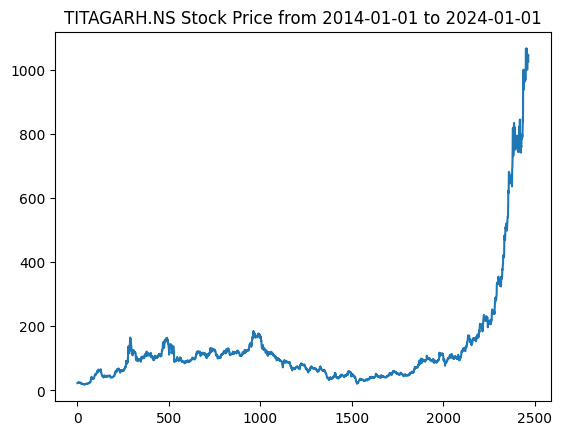

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0018, Validation Loss: 0.0118
Epoch [2/33], Loss: 0.0014, Validation Loss: 0.0112
Epoch [3/33], Loss: 0.0022, Validation Loss: 0.0107
Epoch [4/33], Loss: 0.0023, Validation Loss: 0.0087
Epoch [5/33], Loss: 0.0024, Validation Loss: 0.0063
Epoch [6/33], Loss: 0.0022, Validation Loss: 0.0045
Epoch [7/33], Loss: 0.0018, Validation Loss: 0.0040
Epoch [8/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [9/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [10/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [11/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [12/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [13/33], Loss: 0.0016, Validation Loss: 0.0040
Epoch [14/33], Loss: 0.0016, Validation Loss: 0.0039
Epoch [15/33], Loss: 0.0016, Validation Loss: 0.0039
Epoch [16/33], Loss: 0.0016, Validation Loss: 0.0039
Epoch [17/33], Loss: 0.0015, Validation Loss: 0.0039
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0039
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0039
Ep

[*********************100%***********************]  1 of 1 completed


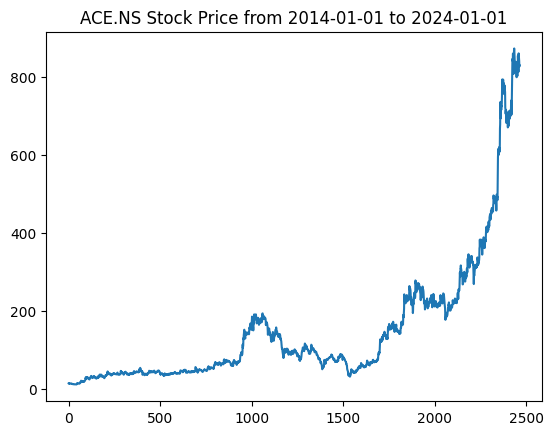

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0072, Validation Loss: 0.0443
Epoch [2/33], Loss: 0.0061, Validation Loss: 0.0238
Epoch [3/33], Loss: 0.0087, Validation Loss: 0.0303
Epoch [4/33], Loss: 0.0081, Validation Loss: 0.0346
Epoch [5/33], Loss: 0.0072, Validation Loss: 0.0356
Epoch [6/33], Loss: 0.0067, Validation Loss: 0.0351
Epoch [7/33], Loss: 0.0065, Validation Loss: 0.0326
Epoch [8/33], Loss: 0.0062, Validation Loss: 0.0281
Epoch [9/33], Loss: 0.0055, Validation Loss: 0.0149
Epoch [10/33], Loss: 0.0047, Validation Loss: 0.0604
Epoch [11/33], Loss: 0.0295, Validation Loss: 0.0397
Epoch [12/33], Loss: 0.0074, Validation Loss: 0.0338
Epoch [13/33], Loss: 0.0064, Validation Loss: 0.0322
Epoch [14/33], Loss: 0.0041, Validation Loss: 0.0047
Epoch [15/33], Loss: 0.0073, Validation Loss: 0.0334
Epoch [16/33], Loss: 0.0061, Validation Loss: 0.0304
Epoch [17/33], Loss: 0.0061, Validation Loss: 0.0310
Epoch [18/33], Loss: 0.0048, Validation Loss: 0.0237
Epoch [19/33], Loss: 0.0043, Validation Loss: 0.0147
Ep

[*********************100%***********************]  1 of 1 completed


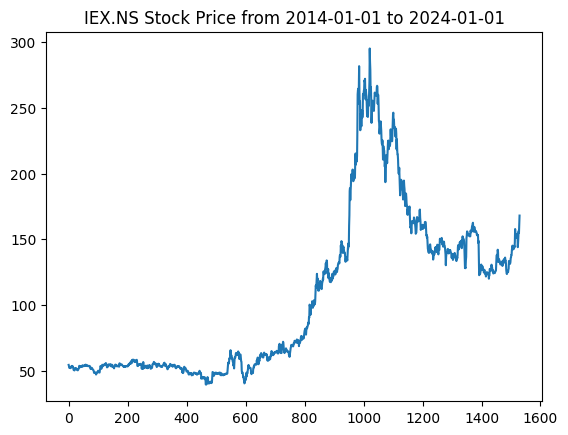

Epoch [1/33], Loss: 0.0774, Validation Loss: 0.0168
Epoch [2/33], Loss: 0.1005, Validation Loss: 0.0479
Epoch [3/33], Loss: 0.0727, Validation Loss: 0.0338
Epoch [4/33], Loss: 0.0579, Validation Loss: 0.0011
Epoch [5/33], Loss: 0.0970, Validation Loss: 0.0208
Epoch [6/33], Loss: 0.0413, Validation Loss: 0.0338
Epoch [7/33], Loss: 0.0083, Validation Loss: 0.0084
Epoch [8/33], Loss: 0.0053, Validation Loss: 0.0062
Epoch [9/33], Loss: 0.0190, Validation Loss: 0.0094
Epoch [10/33], Loss: 0.0037, Validation Loss: 0.0017
Epoch [11/33], Loss: 0.0033, Validation Loss: 0.0021
Epoch [12/33], Loss: 0.0031, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0027, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0027, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0023, Validation Loss: 0.0008
Epoch [16/33], Loss: 0.0026, Validation Loss: 0.0006
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0031, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0026, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


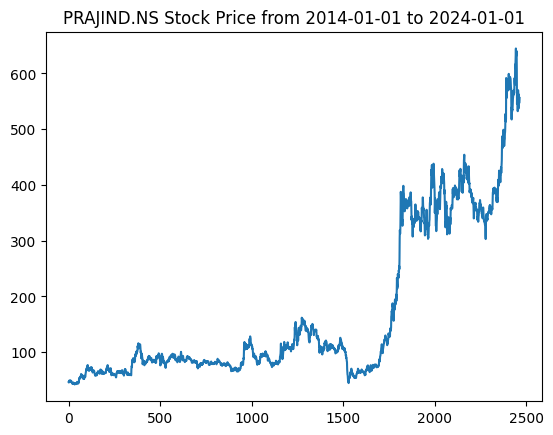

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0190, Validation Loss: 0.1649
Epoch [2/33], Loss: 0.0246, Validation Loss: 0.1796
Epoch [3/33], Loss: 0.0239, Validation Loss: 0.1858
Epoch [4/33], Loss: 0.0235, Validation Loss: 0.1956
Epoch [5/33], Loss: 0.0203, Validation Loss: 0.1631
Epoch [6/33], Loss: 0.0039, Validation Loss: 0.0045
Epoch [7/33], Loss: 0.0069, Validation Loss: 0.0272
Epoch [8/33], Loss: 0.0036, Validation Loss: 0.0051
Epoch [9/33], Loss: 0.0028, Validation Loss: 0.0040
Epoch [10/33], Loss: 0.0211, Validation Loss: 0.0600
Epoch [11/33], Loss: 0.0212, Validation Loss: 0.1979
Epoch [12/33], Loss: 0.0177, Validation Loss: 0.1614
Epoch [13/33], Loss: 0.0108, Validation Loss: 0.0656
Epoch [14/33], Loss: 0.0131, Validation Loss: 0.0608
Epoch [15/33], Loss: 0.0150, Validation Loss: 0.1485
Epoch [16/33], Loss: 0.0138, Validation Loss: 0.1121
Epoch [17/33], Loss: 0.0098, Validation Loss: 0.0576
Epoch [18/33], Loss: 0.0035, Validation Loss: 0.0019
Epoch [19/33], Loss: 0.0051, Validation Loss: 0.0072
Ep

[*********************100%***********************]  1 of 1 completed


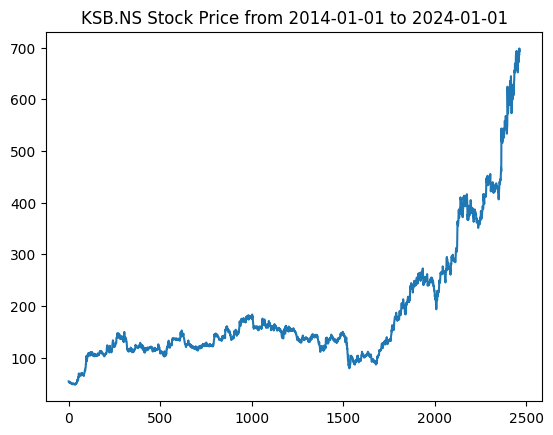

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0070, Validation Loss: 0.1027
Epoch [2/33], Loss: 0.0046, Validation Loss: 0.0832
Epoch [3/33], Loss: 0.0049, Validation Loss: 0.0791
Epoch [4/33], Loss: 0.0050, Validation Loss: 0.0788
Epoch [5/33], Loss: 0.0050, Validation Loss: 0.0773
Epoch [6/33], Loss: 0.0049, Validation Loss: 0.0730
Epoch [7/33], Loss: 0.0044, Validation Loss: 0.0636
Epoch [8/33], Loss: 0.0046, Validation Loss: 0.0546
Epoch [9/33], Loss: 0.0035, Validation Loss: 0.0146
Epoch [10/33], Loss: 0.0024, Validation Loss: 0.2856
Epoch [11/33], Loss: 0.0020, Validation Loss: 0.0076
Epoch [12/33], Loss: 0.0027, Validation Loss: 0.0190
Epoch [13/33], Loss: 0.0015, Validation Loss: 0.0132
Epoch [14/33], Loss: 0.0011, Validation Loss: 0.0023
Epoch [15/33], Loss: 0.0032, Validation Loss: 0.0569
Epoch [16/33], Loss: 0.0023, Validation Loss: 0.0265
Epoch [17/33], Loss: 0.0012, Validation Loss: 0.0016
Epoch [18/33], Loss: 0.0004, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0010, Validation Loss: 0.0099
Ep

[*********************100%***********************]  1 of 1 completed


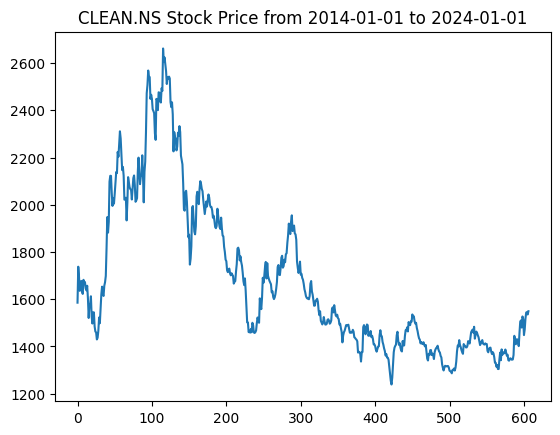

Epoch [1/33], Loss: 0.1548, Validation Loss: 0.0272
Epoch [2/33], Loss: 0.0845, Validation Loss: 0.0503
Epoch [3/33], Loss: 0.0465, Validation Loss: 0.0242
Epoch [4/33], Loss: 0.0554, Validation Loss: 0.0272
Epoch [5/33], Loss: 0.0518, Validation Loss: 0.0344
Epoch [6/33], Loss: 0.0337, Validation Loss: 0.0166
Epoch [7/33], Loss: 0.0126, Validation Loss: 0.0002
Epoch [8/33], Loss: 0.0368, Validation Loss: 0.0034
Epoch [9/33], Loss: 0.0730, Validation Loss: 0.0051
Epoch [10/33], Loss: 0.0529, Validation Loss: 0.0407
Epoch [11/33], Loss: 0.0407, Validation Loss: 0.0403
Epoch [12/33], Loss: 0.0200, Validation Loss: 0.0103
Epoch [13/33], Loss: 0.0160, Validation Loss: 0.0021
Epoch [14/33], Loss: 0.0042, Validation Loss: 0.0003
Epoch [15/33], Loss: 0.0060, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0049, Validation Loss: 0.0027
Epoch [17/33], Loss: 0.0053, Validation Loss: 0.0001
Epoch [18/33], Loss: 0.0069, Validation Loss: 0.0009
Epoch [19/33], Loss: 0.0045, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


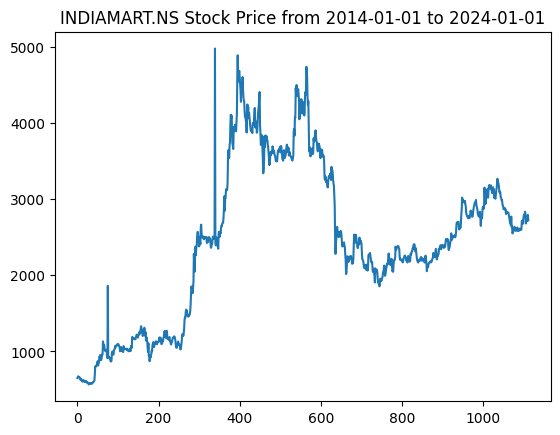

Epoch [1/33], Loss: 0.0990, Validation Loss: 0.0060
Epoch [2/33], Loss: 0.1190, Validation Loss: 0.0714
Epoch [3/33], Loss: 0.0754, Validation Loss: 0.0064
Epoch [4/33], Loss: 0.0615, Validation Loss: 0.0005
Epoch [5/33], Loss: 0.0633, Validation Loss: 0.0034
Epoch [6/33], Loss: 0.0501, Validation Loss: 0.0009
Epoch [7/33], Loss: 0.0239, Validation Loss: 0.0323
Epoch [8/33], Loss: 0.0520, Validation Loss: 0.0688
Epoch [9/33], Loss: 0.0581, Validation Loss: 0.0074
Epoch [10/33], Loss: 0.0327, Validation Loss: 0.0024
Epoch [11/33], Loss: 0.0216, Validation Loss: 0.0005
Epoch [12/33], Loss: 0.0049, Validation Loss: 0.0006
Epoch [13/33], Loss: 0.0035, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0040, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0035, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0037, Validation Loss: 0.0014
Epoch [17/33], Loss: 0.0036, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0033, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0031, Validation Loss: 0.0010
Ep

[*********************100%***********************]  1 of 1 completed


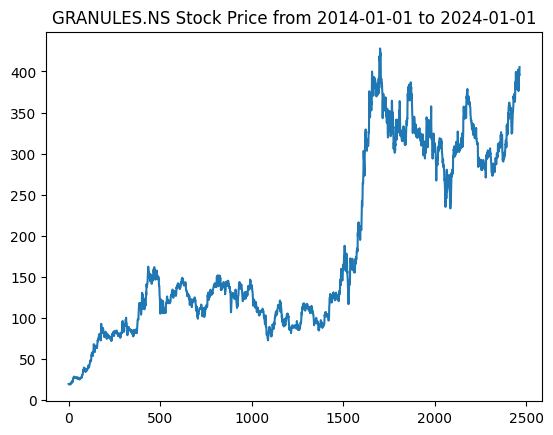

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0397, Validation Loss: 0.1015
Epoch [2/33], Loss: 0.1605, Validation Loss: 0.2110
Epoch [3/33], Loss: 0.0646, Validation Loss: 0.0908
Epoch [4/33], Loss: 0.0684, Validation Loss: 0.0629
Epoch [5/33], Loss: 0.0154, Validation Loss: 0.0024
Epoch [6/33], Loss: 0.0053, Validation Loss: 0.0084
Epoch [7/33], Loss: 0.0022, Validation Loss: 0.0007
Epoch [8/33], Loss: 0.0026, Validation Loss: 0.0011
Epoch [9/33], Loss: 0.0027, Validation Loss: 0.0010
Epoch [10/33], Loss: 0.0018, Validation Loss: 0.0011
Epoch [11/33], Loss: 0.0021, Validation Loss: 0.0030
Epoch [12/33], Loss: 0.0019, Validation Loss: 0.0031
Epoch [13/33], Loss: 0.0038, Validation Loss: 0.0013
Epoch [14/33], Loss: 0.0073, Validation Loss: 0.0256
Epoch [15/33], Loss: 0.0099, Validation Loss: 0.0244
Epoch [16/33], Loss: 0.0042, Validation Loss: 0.0016
Epoch [17/33], Loss: 0.0043, Validation Loss: 0.0126
Epoch [18/33], Loss: 0.0076, Validation Loss: 0.0309
Epoch [19/33], Loss: 0.0189, Validation Loss: 0.0068
Ep

[*********************100%***********************]  1 of 1 completed


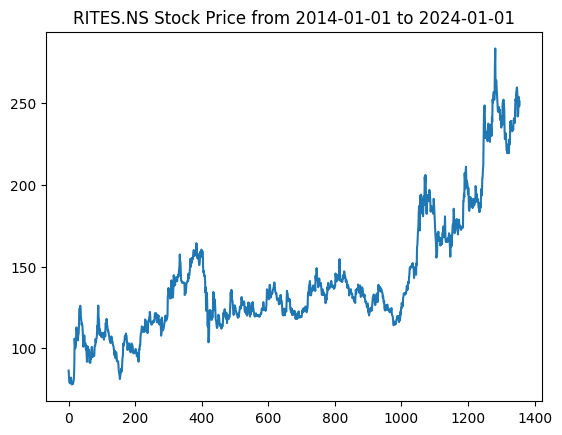

Epoch [1/33], Loss: 0.0217, Validation Loss: 0.0677
Epoch [2/33], Loss: 0.0132, Validation Loss: 0.0461
Epoch [3/33], Loss: 0.0154, Validation Loss: 0.0485
Epoch [4/33], Loss: 0.0126, Validation Loss: 0.0376
Epoch [5/33], Loss: 0.0104, Validation Loss: 0.0084
Epoch [6/33], Loss: 0.0081, Validation Loss: 0.0036
Epoch [7/33], Loss: 0.0096, Validation Loss: 0.0243
Epoch [8/33], Loss: 0.0121, Validation Loss: 0.0315
Epoch [9/33], Loss: 0.0041, Validation Loss: 0.0046
Epoch [10/33], Loss: 0.0032, Validation Loss: 0.0011
Epoch [11/33], Loss: 0.0050, Validation Loss: 0.0125
Epoch [12/33], Loss: 0.0081, Validation Loss: 0.0150
Epoch [13/33], Loss: 0.0029, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0017, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0019, Validation Loss: 0.0035
Epoch [16/33], Loss: 0.0020, Validation Loss: 0.0012
Epoch [17/33], Loss: 0.0011, Validation Loss: 0.0009
Epoch [18/33], Loss: 0.0011, Validation Loss: 0.0009
Epoch [19/33], Loss: 0.0012, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


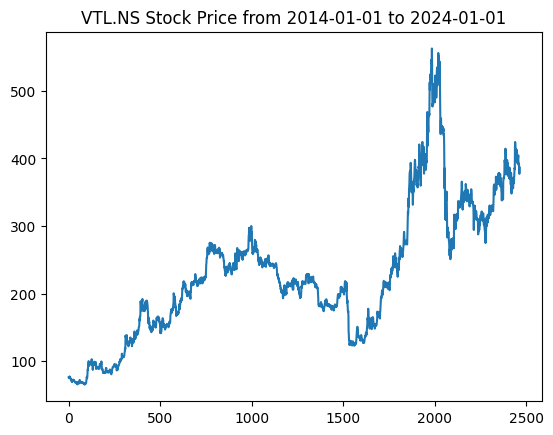

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0279, Validation Loss: 0.0926
Epoch [2/33], Loss: 0.0348, Validation Loss: 0.0521
Epoch [3/33], Loss: 0.0330, Validation Loss: 0.0280
Epoch [4/33], Loss: 0.0204, Validation Loss: 0.0485
Epoch [5/33], Loss: 0.0776, Validation Loss: 0.1024
Epoch [6/33], Loss: 0.0289, Validation Loss: 0.0514
Epoch [7/33], Loss: 0.0185, Validation Loss: 0.0105
Epoch [8/33], Loss: 0.0077, Validation Loss: 0.0059
Epoch [9/33], Loss: 0.0169, Validation Loss: 0.0304
Epoch [10/33], Loss: 0.0135, Validation Loss: 0.0057
Epoch [11/33], Loss: 0.0049, Validation Loss: 0.0028
Epoch [12/33], Loss: 0.0068, Validation Loss: 0.0141
Epoch [13/33], Loss: 0.0048, Validation Loss: 0.0019
Epoch [14/33], Loss: 0.0023, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0050
Epoch [16/33], Loss: 0.0020, Validation Loss: 0.0015
Epoch [17/33], Loss: 0.0012, Validation Loss: 0.0025
Epoch [18/33], Loss: 0.0012, Validation Loss: 0.0010
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0030
Ep

[*********************100%***********************]  1 of 1 completed


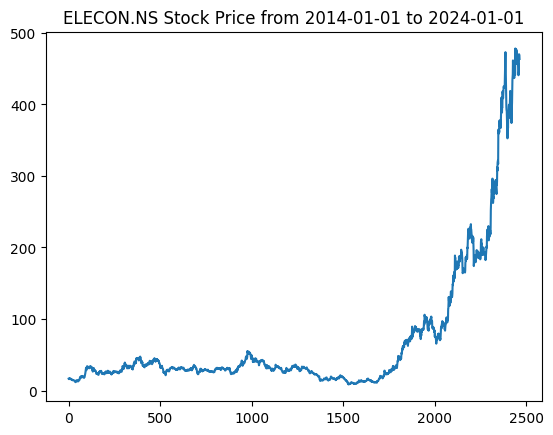

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0029, Validation Loss: 0.0797
Epoch [2/33], Loss: 0.0028, Validation Loss: 0.0760
Epoch [3/33], Loss: 0.0028, Validation Loss: 0.0787
Epoch [4/33], Loss: 0.0028, Validation Loss: 0.0834
Epoch [5/33], Loss: 0.0025, Validation Loss: 0.0821
Epoch [6/33], Loss: 0.0023, Validation Loss: 0.0800
Epoch [7/33], Loss: 0.0023, Validation Loss: 0.0799
Epoch [8/33], Loss: 0.0022, Validation Loss: 0.0796
Epoch [9/33], Loss: 0.0022, Validation Loss: 0.0795
Epoch [10/33], Loss: 0.0022, Validation Loss: 0.0793
Epoch [11/33], Loss: 0.0022, Validation Loss: 0.0788
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0788
Epoch [13/33], Loss: 0.0021, Validation Loss: 0.0786
Epoch [14/33], Loss: 0.0021, Validation Loss: 0.0783
Epoch [15/33], Loss: 0.0022, Validation Loss: 0.0783
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0776
Epoch [17/33], Loss: 0.0020, Validation Loss: 0.0776
Epoch [18/33], Loss: 0.0020, Validation Loss: 0.0773
Epoch [19/33], Loss: 0.0020, Validation Loss: 0.0763
Ep

[*********************100%***********************]  1 of 1 completed


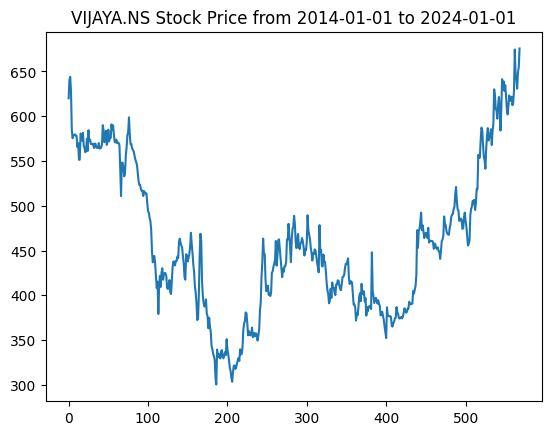

Epoch [1/33], Loss: 0.1172, Validation Loss: 0.0156
Epoch [2/33], Loss: 0.0600, Validation Loss: 0.0426
Epoch [3/33], Loss: 0.0324, Validation Loss: 0.0701
Epoch [4/33], Loss: 0.0372, Validation Loss: 0.0416
Epoch [5/33], Loss: 0.0311, Validation Loss: 0.0183
Epoch [6/33], Loss: 0.0296, Validation Loss: 0.0205
Epoch [7/33], Loss: 0.0263, Validation Loss: 0.0302
Epoch [8/33], Loss: 0.0262, Validation Loss: 0.0276
Epoch [9/33], Loss: 0.0241, Validation Loss: 0.0180
Epoch [10/33], Loss: 0.0216, Validation Loss: 0.0161
Epoch [11/33], Loss: 0.0152, Validation Loss: 0.0100
Epoch [12/33], Loss: 0.0080, Validation Loss: 0.0076
Epoch [13/33], Loss: 0.1498, Validation Loss: 0.1051
Epoch [14/33], Loss: 0.0469, Validation Loss: 0.0678
Epoch [15/33], Loss: 0.0293, Validation Loss: 0.0190
Epoch [16/33], Loss: 0.0258, Validation Loss: 0.0081
Epoch [17/33], Loss: 0.0221, Validation Loss: 0.0206
Epoch [18/33], Loss: 0.0185, Validation Loss: 0.0260
Epoch [19/33], Loss: 0.0189, Validation Loss: 0.0151
Ep

[*********************100%***********************]  1 of 1 completed


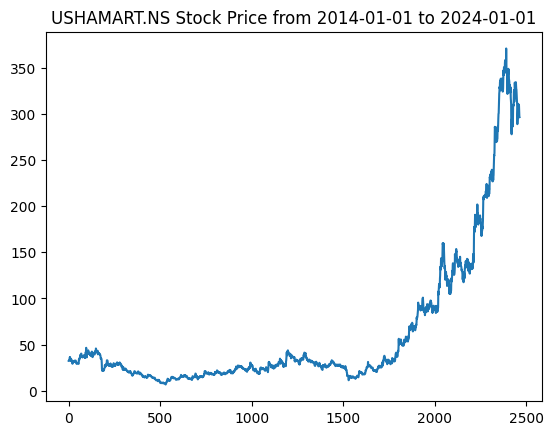

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0042, Validation Loss: 0.0526
Epoch [2/33], Loss: 0.0059, Validation Loss: 0.0738
Epoch [3/33], Loss: 0.0054, Validation Loss: 0.0853
Epoch [4/33], Loss: 0.0042, Validation Loss: 0.0847
Epoch [5/33], Loss: 0.0038, Validation Loss: 0.0836
Epoch [6/33], Loss: 0.0036, Validation Loss: 0.0830
Epoch [7/33], Loss: 0.0037, Validation Loss: 0.0829
Epoch [8/33], Loss: 0.0038, Validation Loss: 0.0831
Epoch [9/33], Loss: 0.0037, Validation Loss: 0.0829
Epoch [10/33], Loss: 0.0035, Validation Loss: 0.0823
Epoch [11/33], Loss: 0.0037, Validation Loss: 0.0825
Epoch [12/33], Loss: 0.0035, Validation Loss: 0.0819
Epoch [13/33], Loss: 0.0034, Validation Loss: 0.0814
Epoch [14/33], Loss: 0.0035, Validation Loss: 0.0806
Epoch [15/33], Loss: 0.0034, Validation Loss: 0.0797
Epoch [16/33], Loss: 0.0036, Validation Loss: 0.0795
Epoch [17/33], Loss: 0.0033, Validation Loss: 0.0763
Epoch [18/33], Loss: 0.0036, Validation Loss: 0.0790
Epoch [19/33], Loss: 0.0033, Validation Loss: 0.0743
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0004, Validation Loss: 0.0009


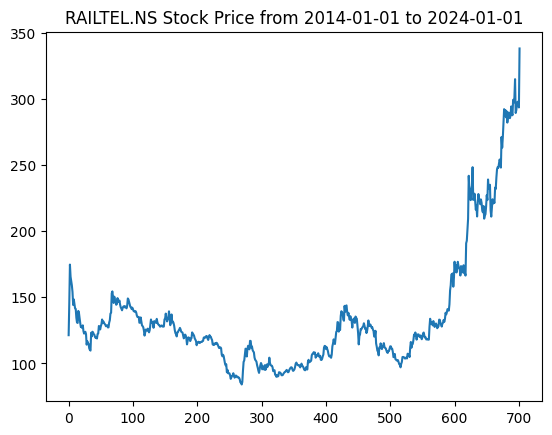

Epoch [1/33], Loss: 0.0127, Validation Loss: 0.1224
Epoch [2/33], Loss: 0.0044, Validation Loss: 0.1391
Epoch [3/33], Loss: 0.0046, Validation Loss: 0.1322
Epoch [4/33], Loss: 0.0048, Validation Loss: 0.1252
Epoch [5/33], Loss: 0.0044, Validation Loss: 0.1289
Epoch [6/33], Loss: 0.0041, Validation Loss: 0.1267
Epoch [7/33], Loss: 0.0044, Validation Loss: 0.1211
Epoch [8/33], Loss: 0.0042, Validation Loss: 0.1186
Epoch [9/33], Loss: 0.0040, Validation Loss: 0.1115
Epoch [10/33], Loss: 0.0038, Validation Loss: 0.0918
Epoch [11/33], Loss: 0.0031, Validation Loss: 0.0363
Epoch [12/33], Loss: 0.0021, Validation Loss: 0.0725
Epoch [13/33], Loss: 0.0029, Validation Loss: 0.0414
Epoch [14/33], Loss: 0.0010, Validation Loss: 0.0153
Epoch [15/33], Loss: 0.0009, Validation Loss: 0.0192
Epoch [16/33], Loss: 0.0010, Validation Loss: 0.0241
Epoch [17/33], Loss: 0.0010, Validation Loss: 0.0080
Epoch [18/33], Loss: 0.0009, Validation Loss: 0.0112
Epoch [19/33], Loss: 0.0009, Validation Loss: 0.0391
Ep

[*********************100%***********************]  1 of 1 completed


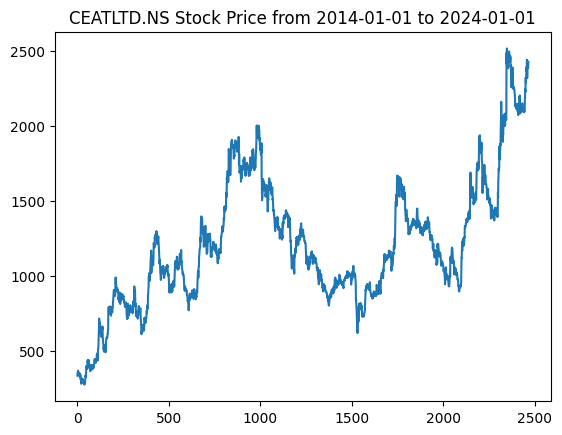

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0272, Validation Loss: 0.0675
Epoch [2/33], Loss: 0.0318, Validation Loss: 0.0239
Epoch [3/33], Loss: 0.0309, Validation Loss: 0.0187
Epoch [4/33], Loss: 0.0290, Validation Loss: 0.0153
Epoch [5/33], Loss: 0.0239, Validation Loss: 0.0209
Epoch [6/33], Loss: 0.0194, Validation Loss: 0.0092
Epoch [7/33], Loss: 0.0069, Validation Loss: 0.0082
Epoch [8/33], Loss: 0.0023, Validation Loss: 0.0023
Epoch [9/33], Loss: 0.0013, Validation Loss: 0.0015
Epoch [10/33], Loss: 0.0014, Validation Loss: 0.0014
Epoch [11/33], Loss: 0.0014, Validation Loss: 0.0011
Epoch [12/33], Loss: 0.0015, Validation Loss: 0.0008
Epoch [13/33], Loss: 0.0012, Validation Loss: 0.0010
Epoch [14/33], Loss: 0.0016, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0013, Validation Loss: 0.0014
Epoch [16/33], Loss: 0.0014, Validation Loss: 0.0014
Epoch [17/33], Loss: 0.0014, Validation Loss: 0.0014
Epoch [18/33], Loss: 0.0013, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0015, Validation Loss: 0.0018
Ep

[*********************100%***********************]  1 of 1 completed


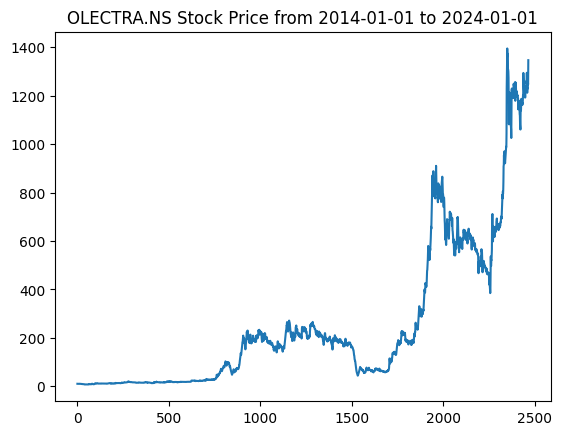

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0165, Validation Loss: 0.1100
Epoch [2/33], Loss: 0.0184, Validation Loss: 0.0976
Epoch [3/33], Loss: 0.0193, Validation Loss: 0.1006
Epoch [4/33], Loss: 0.0175, Validation Loss: 0.0940
Epoch [5/33], Loss: 0.0164, Validation Loss: 0.0801
Epoch [6/33], Loss: 0.0095, Validation Loss: 0.0369
Epoch [7/33], Loss: 0.0128, Validation Loss: 0.0282
Epoch [8/33], Loss: 0.0127, Validation Loss: 0.0014
Epoch [9/33], Loss: 0.0037, Validation Loss: 0.0183
Epoch [10/33], Loss: 0.0040, Validation Loss: 0.0069
Epoch [11/33], Loss: 0.0031, Validation Loss: 0.0068
Epoch [12/33], Loss: 0.0037, Validation Loss: 0.0067
Epoch [13/33], Loss: 0.0085, Validation Loss: 0.0232
Epoch [14/33], Loss: 0.0032, Validation Loss: 0.0078
Epoch [15/33], Loss: 0.0014, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0015, Validation Loss: 0.0069
Epoch [17/33], Loss: 0.0013, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0015, Validation Loss: 0.0102
Epoch [19/33], Loss: 0.0010, Validation Loss: 0.0023
Ep

[*********************100%***********************]  1 of 1 completed


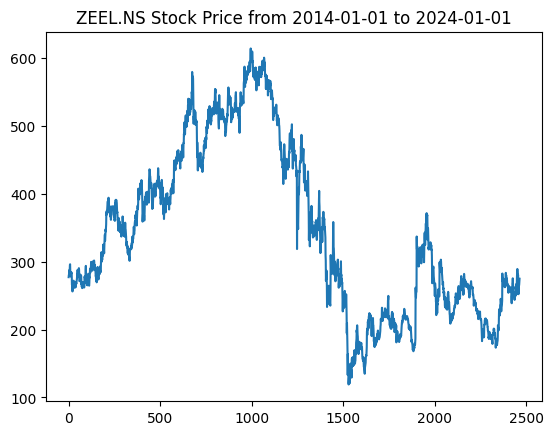

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0469, Validation Loss: 0.0262
Epoch [2/33], Loss: 0.1803, Validation Loss: 0.0045
Epoch [3/33], Loss: 0.1304, Validation Loss: 0.0310
Epoch [4/33], Loss: 0.0840, Validation Loss: 0.0137
Epoch [5/33], Loss: 0.0448, Validation Loss: 0.0017
Epoch [6/33], Loss: 0.0156, Validation Loss: 0.0027
Epoch [7/33], Loss: 0.0070, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0042, Validation Loss: 0.0003
Epoch [9/33], Loss: 0.0036, Validation Loss: 0.0007
Epoch [10/33], Loss: 0.0032, Validation Loss: 0.0013
Epoch [11/33], Loss: 0.0036, Validation Loss: 0.0019
Epoch [12/33], Loss: 0.0053, Validation Loss: 0.0039
Epoch [13/33], Loss: 0.0084, Validation Loss: 0.0054
Epoch [14/33], Loss: 0.0115, Validation Loss: 0.0044
Epoch [15/33], Loss: 0.0110, Validation Loss: 0.0038
Epoch [16/33], Loss: 0.0087, Validation Loss: 0.0011
Epoch [17/33], Loss: 0.0072, Validation Loss: 0.0005
Epoch [18/33], Loss: 0.0054, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0047, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


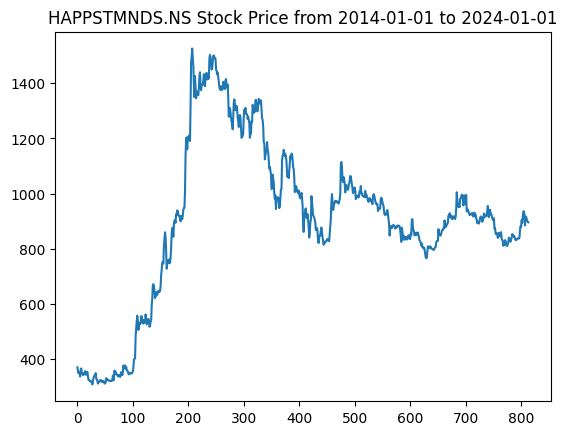

Epoch [1/33], Loss: 0.1886, Validation Loss: 0.0164
Epoch [2/33], Loss: 0.0711, Validation Loss: 0.0040
Epoch [3/33], Loss: 0.0571, Validation Loss: 0.0034
Epoch [4/33], Loss: 0.0458, Validation Loss: 0.0062
Epoch [5/33], Loss: 0.0288, Validation Loss: 0.0021
Epoch [6/33], Loss: 0.0184, Validation Loss: 0.0027
Epoch [7/33], Loss: 0.0074, Validation Loss: 0.0002
Epoch [8/33], Loss: 0.0085, Validation Loss: 0.0018
Epoch [9/33], Loss: 0.0103, Validation Loss: 0.0014
Epoch [10/33], Loss: 0.0052, Validation Loss: 0.0002
Epoch [11/33], Loss: 0.0093, Validation Loss: 0.0036
Epoch [12/33], Loss: 0.0058, Validation Loss: 0.0012
Epoch [13/33], Loss: 0.0054, Validation Loss: 0.0001
Epoch [14/33], Loss: 0.0091, Validation Loss: 0.0034
Epoch [15/33], Loss: 0.0048, Validation Loss: 0.0019
Epoch [16/33], Loss: 0.0065, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0079, Validation Loss: 0.0026
Epoch [18/33], Loss: 0.0050, Validation Loss: 0.0015
Epoch [19/33], Loss: 0.0049, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


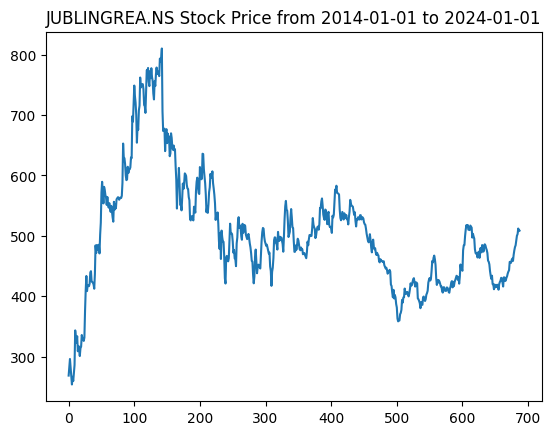

Epoch [1/33], Loss: 0.1466, Validation Loss: 0.0120
Epoch [2/33], Loss: 0.0321, Validation Loss: 0.0011
Epoch [3/33], Loss: 0.0329, Validation Loss: 0.0011
Epoch [4/33], Loss: 0.0375, Validation Loss: 0.0048
Epoch [5/33], Loss: 0.0275, Validation Loss: 0.0021
Epoch [6/33], Loss: 0.0261, Validation Loss: 0.0013
Epoch [7/33], Loss: 0.0269, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0199, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0124, Validation Loss: 0.0083
Epoch [10/33], Loss: 0.0271, Validation Loss: 0.0155
Epoch [11/33], Loss: 0.0338, Validation Loss: 0.0060
Epoch [12/33], Loss: 0.0211, Validation Loss: 0.0018
Epoch [13/33], Loss: 0.0149, Validation Loss: 0.0008
Epoch [14/33], Loss: 0.0168, Validation Loss: 0.0010
Epoch [15/33], Loss: 0.0076, Validation Loss: 0.0012
Epoch [16/33], Loss: 0.0042, Validation Loss: 0.0017
Epoch [17/33], Loss: 0.0084, Validation Loss: 0.0063
Epoch [18/33], Loss: 0.0124, Validation Loss: 0.0021
Epoch [19/33], Loss: 0.0037, Validation Loss: 0.0039
Ep

[*********************100%***********************]  1 of 1 completed


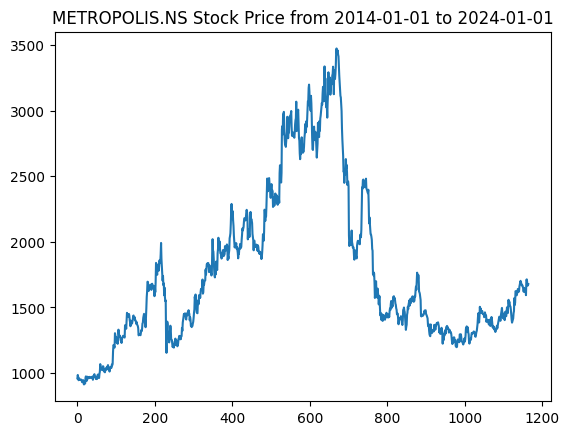

Epoch [1/33], Loss: 0.1144, Validation Loss: 0.1316
Epoch [2/33], Loss: 0.1130, Validation Loss: 0.0021
Epoch [3/33], Loss: 0.0876, Validation Loss: 0.0159
Epoch [4/33], Loss: 0.0607, Validation Loss: 0.0729
Epoch [5/33], Loss: 0.0625, Validation Loss: 0.0586
Epoch [6/33], Loss: 0.0569, Validation Loss: 0.0500
Epoch [7/33], Loss: 0.0443, Validation Loss: 0.0440
Epoch [8/33], Loss: 0.0199, Validation Loss: 0.0007
Epoch [9/33], Loss: 0.0448, Validation Loss: 0.0261
Epoch [10/33], Loss: 0.0167, Validation Loss: 0.0125
Epoch [11/33], Loss: 0.0072, Validation Loss: 0.0015
Epoch [12/33], Loss: 0.0040, Validation Loss: 0.0028
Epoch [13/33], Loss: 0.0074, Validation Loss: 0.0030
Epoch [14/33], Loss: 0.0085, Validation Loss: 0.0070
Epoch [15/33], Loss: 0.0170, Validation Loss: 0.0275
Epoch [16/33], Loss: 0.0102, Validation Loss: 0.0007
Epoch [17/33], Loss: 0.0045, Validation Loss: 0.0012
Epoch [18/33], Loss: 0.0031, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0032, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


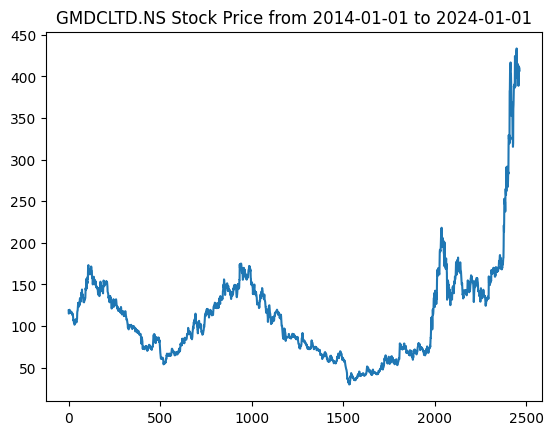

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0163, Validation Loss: 0.0500
Epoch [2/33], Loss: 0.0132, Validation Loss: 0.0454
Epoch [3/33], Loss: 0.0126, Validation Loss: 0.0389
Epoch [4/33], Loss: 0.0111, Validation Loss: 0.0378
Epoch [5/33], Loss: 0.0107, Validation Loss: 0.0371
Epoch [6/33], Loss: 0.0099, Validation Loss: 0.0331
Epoch [7/33], Loss: 0.0072, Validation Loss: 0.0352
Epoch [8/33], Loss: 0.0073, Validation Loss: 0.0215
Epoch [9/33], Loss: 0.0037, Validation Loss: 0.0071
Epoch [10/33], Loss: 0.0024, Validation Loss: 0.0121
Epoch [11/33], Loss: 0.0014, Validation Loss: 0.0086
Epoch [12/33], Loss: 0.0010, Validation Loss: 0.0014
Epoch [13/33], Loss: 0.0004, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0004, Validation Loss: 0.0015
Epoch [15/33], Loss: 0.0004, Validation Loss: 0.0010
Epoch [16/33], Loss: 0.0004, Validation Loss: 0.0026
Epoch [17/33], Loss: 0.0006, Validation Loss: 0.0008
Epoch [18/33], Loss: 0.0005, Validation Loss: 0.0076
Epoch [19/33], Loss: 0.0010, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed


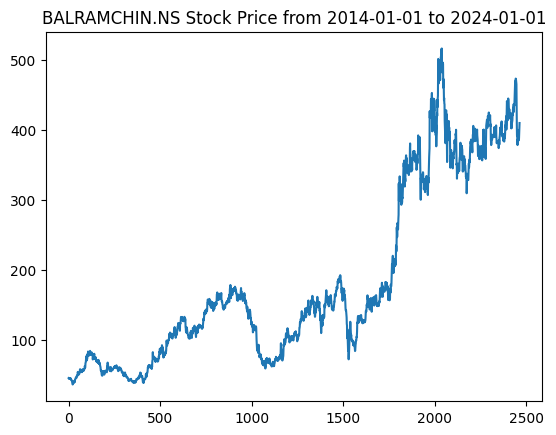

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0311, Validation Loss: 0.2102
Epoch [2/33], Loss: 0.0461, Validation Loss: 0.2676
Epoch [3/33], Loss: 0.0325, Validation Loss: 0.1750
Epoch [4/33], Loss: 0.0167, Validation Loss: 0.0733
Epoch [5/33], Loss: 0.0134, Validation Loss: 0.0434
Epoch [6/33], Loss: 0.0092, Validation Loss: 0.0192
Epoch [7/33], Loss: 0.0078, Validation Loss: 0.0063
Epoch [8/33], Loss: 0.0092, Validation Loss: 0.0152
Epoch [9/33], Loss: 0.0196, Validation Loss: 0.1408
Epoch [10/33], Loss: 0.0085, Validation Loss: 0.0045
Epoch [11/33], Loss: 0.0047, Validation Loss: 0.0047
Epoch [12/33], Loss: 0.0075, Validation Loss: 0.0415
Epoch [13/33], Loss: 0.0068, Validation Loss: 0.0021
Epoch [14/33], Loss: 0.0015, Validation Loss: 0.0031
Epoch [15/33], Loss: 0.0023, Validation Loss: 0.0020
Epoch [16/33], Loss: 0.0055, Validation Loss: 0.0281
Epoch [17/33], Loss: 0.0054, Validation Loss: 0.0022
Epoch [18/33], Loss: 0.0071, Validation Loss: 0.0447
Epoch [19/33], Loss: 0.0050, Validation Loss: 0.0020
Ep

[*********************100%***********************]  1 of 1 completed


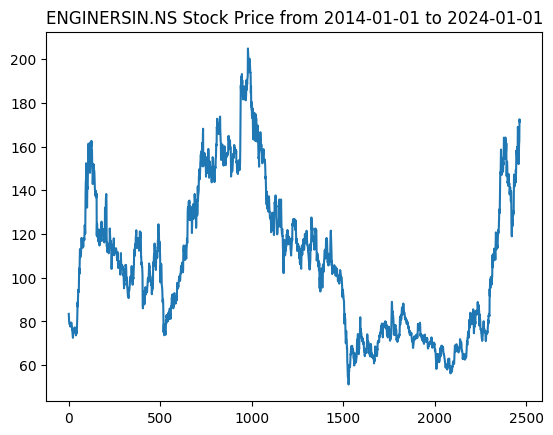

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0633, Validation Loss: 0.0022
Epoch [2/33], Loss: 0.1140, Validation Loss: 0.0493
Epoch [3/33], Loss: 0.0696, Validation Loss: 0.0492
Epoch [4/33], Loss: 0.0557, Validation Loss: 0.0163
Epoch [5/33], Loss: 0.0190, Validation Loss: 0.0007
Epoch [6/33], Loss: 0.0176, Validation Loss: 0.0015
Epoch [7/33], Loss: 0.0132, Validation Loss: 0.0036
Epoch [8/33], Loss: 0.0049, Validation Loss: 0.0009
Epoch [9/33], Loss: 0.0038, Validation Loss: 0.0006
Epoch [10/33], Loss: 0.0036, Validation Loss: 0.0005
Epoch [11/33], Loss: 0.0027, Validation Loss: 0.0006
Epoch [12/33], Loss: 0.0026, Validation Loss: 0.0005
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0026, Validation Loss: 0.0004
Epoch [15/33], Loss: 0.0024, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0024, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0026, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0026, Validation Loss: 0.0006
Epoch [19/33], Loss: 0.0025, Validation Loss: 0.0003
Ep

[*********************100%***********************]  1 of 1 completed


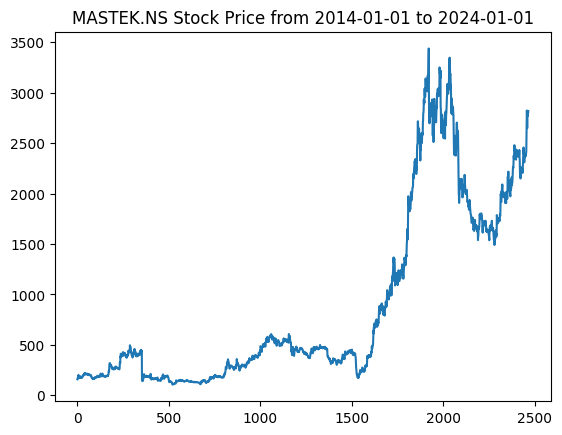

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0442, Validation Loss: 0.1079
Epoch [2/33], Loss: 0.0866, Validation Loss: 0.2522
Epoch [3/33], Loss: 0.0631, Validation Loss: 0.2261
Epoch [4/33], Loss: 0.0602, Validation Loss: 0.2018
Epoch [5/33], Loss: 0.0237, Validation Loss: 0.0069
Epoch [6/33], Loss: 0.0097, Validation Loss: 0.0636
Epoch [7/33], Loss: 0.0111, Validation Loss: 0.0184
Epoch [8/33], Loss: 0.0112, Validation Loss: 0.0030
Epoch [9/33], Loss: 0.0437, Validation Loss: 0.1010
Epoch [10/33], Loss: 0.0488, Validation Loss: 0.0464
Epoch [11/33], Loss: 0.0894, Validation Loss: 0.1834
Epoch [12/33], Loss: 0.0748, Validation Loss: 0.2533
Epoch [13/33], Loss: 0.0556, Validation Loss: 0.2233
Epoch [14/33], Loss: 0.0557, Validation Loss: 0.2068
Epoch [15/33], Loss: 0.0497, Validation Loss: 0.1722
Epoch [16/33], Loss: 0.0308, Validation Loss: 0.0610
Epoch [17/33], Loss: 0.0094, Validation Loss: 0.0015
Epoch [18/33], Loss: 0.0173, Validation Loss: 0.0411
Epoch [19/33], Loss: 0.0075, Validation Loss: 0.0032
Ep

[*********************100%***********************]  1 of 1 completed


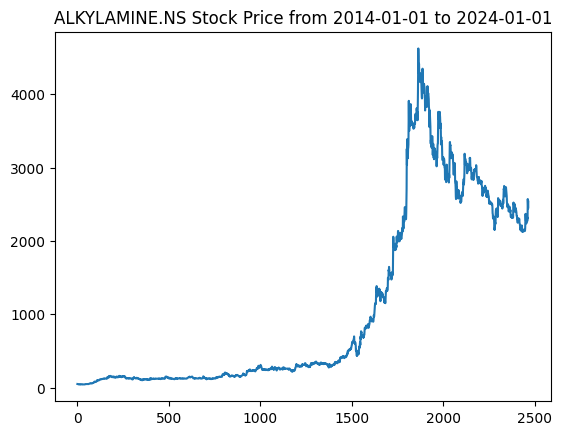

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0371, Validation Loss: 0.0044
Epoch [2/33], Loss: 0.1181, Validation Loss: 0.2798
Epoch [3/33], Loss: 0.0642, Validation Loss: 0.2300
Epoch [4/33], Loss: 0.0604, Validation Loss: 0.1669
Epoch [5/33], Loss: 0.0358, Validation Loss: 0.1376
Epoch [6/33], Loss: 0.0503, Validation Loss: 0.1650
Epoch [7/33], Loss: 0.0072, Validation Loss: 0.0273
Epoch [8/33], Loss: 0.0358, Validation Loss: 0.1157
Epoch [9/33], Loss: 0.0371, Validation Loss: 0.1197
Epoch [10/33], Loss: 0.0170, Validation Loss: 0.0096
Epoch [11/33], Loss: 0.0111, Validation Loss: 0.0011
Epoch [12/33], Loss: 0.0258, Validation Loss: 0.0724
Epoch [13/33], Loss: 0.0059, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0038, Validation Loss: 0.0049
Epoch [15/33], Loss: 0.0029, Validation Loss: 0.0005
Epoch [16/33], Loss: 0.0033, Validation Loss: 0.0037
Epoch [17/33], Loss: 0.0047, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0049, Validation Loss: 0.0042
Epoch [19/33], Loss: 0.0077, Validation Loss: 0.0063
Ep

[*********************100%***********************]  1 of 1 completed


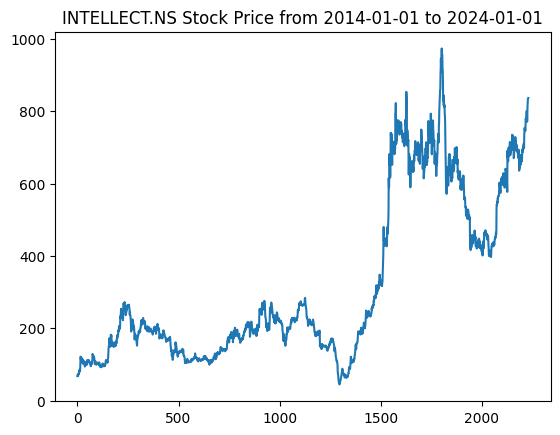

Epoch [1/33], Loss: 0.0501, Validation Loss: 0.0335
Epoch [2/33], Loss: 0.0824, Validation Loss: 0.1378
Epoch [3/33], Loss: 0.0507, Validation Loss: 0.0872
Epoch [4/33], Loss: 0.0210, Validation Loss: 0.0075
Epoch [5/33], Loss: 0.0131, Validation Loss: 0.0019
Epoch [6/33], Loss: 0.0191, Validation Loss: 0.0422
Epoch [7/33], Loss: 0.0317, Validation Loss: 0.0497
Epoch [8/33], Loss: 0.0085, Validation Loss: 0.0029
Epoch [9/33], Loss: 0.0087, Validation Loss: 0.0138
Epoch [10/33], Loss: 0.0207, Validation Loss: 0.0248
Epoch [11/33], Loss: 0.0054, Validation Loss: 0.0031
Epoch [12/33], Loss: 0.0031, Validation Loss: 0.0010
Epoch [13/33], Loss: 0.0022, Validation Loss: 0.0005
Epoch [14/33], Loss: 0.0039, Validation Loss: 0.0007
Epoch [15/33], Loss: 0.0053, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0109, Validation Loss: 0.0077
Epoch [17/33], Loss: 0.0057, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0086, Validation Loss: 0.0046
Epoch [19/33], Loss: 0.0048, Validation Loss: 0.0012
Ep

[*********************100%***********************]  1 of 1 completed


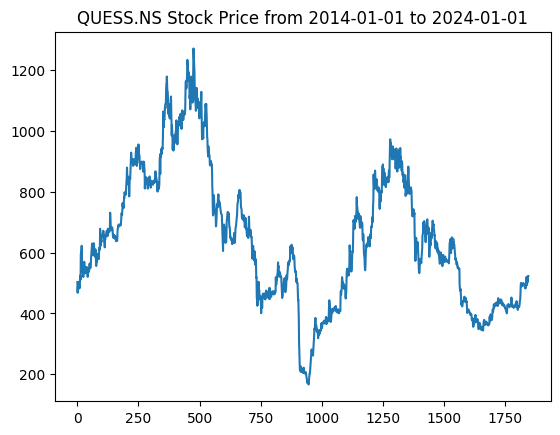

Epoch [1/33], Loss: 0.1429, Validation Loss: 0.0097
Epoch [2/33], Loss: 0.0830, Validation Loss: 0.0381
Epoch [3/33], Loss: 0.0516, Validation Loss: 0.0089
Epoch [4/33], Loss: 0.0511, Validation Loss: 0.0099
Epoch [5/33], Loss: 0.0131, Validation Loss: 0.0041
Epoch [6/33], Loss: 0.0185, Validation Loss: 0.0058
Epoch [7/33], Loss: 0.0101, Validation Loss: 0.0012
Epoch [8/33], Loss: 0.0067, Validation Loss: 0.0005
Epoch [9/33], Loss: 0.0046, Validation Loss: 0.0016
Epoch [10/33], Loss: 0.0030, Validation Loss: 0.0016
Epoch [11/33], Loss: 0.0036, Validation Loss: 0.0003
Epoch [12/33], Loss: 0.0029, Validation Loss: 0.0021
Epoch [13/33], Loss: 0.0033, Validation Loss: 0.0002
Epoch [14/33], Loss: 0.0029, Validation Loss: 0.0014
Epoch [15/33], Loss: 0.0028, Validation Loss: 0.0002
Epoch [16/33], Loss: 0.0025, Validation Loss: 0.0017
Epoch [17/33], Loss: 0.0024, Validation Loss: 0.0003
Epoch [18/33], Loss: 0.0022, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0021, Validation Loss: 0.0004
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0038, Validation Loss: 0.0044


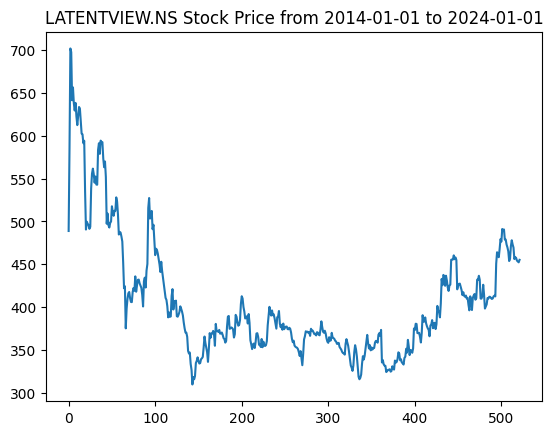

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0346, Validation Loss: 0.0042
Epoch [2/33], Loss: 0.0156, Validation Loss: 0.0055
Epoch [3/33], Loss: 0.0109, Validation Loss: 0.0124
Epoch [4/33], Loss: 0.0126, Validation Loss: 0.0113
Epoch [5/33], Loss: 0.0136, Validation Loss: 0.0074
Epoch [6/33], Loss: 0.0125, Validation Loss: 0.0060
Epoch [7/33], Loss: 0.0115, Validation Loss: 0.0072
Epoch [8/33], Loss: 0.0109, Validation Loss: 0.0084
Epoch [9/33], Loss: 0.0108, Validation Loss: 0.0073
Epoch [10/33], Loss: 0.0100, Validation Loss: 0.0055
Epoch [11/33], Loss: 0.0075, Validation Loss: 0.0048
Epoch [12/33], Loss: 0.0043, Validation Loss: 0.0175
Epoch [13/33], Loss: 0.0387, Validation Loss: 0.0262
Epoch [14/33], Loss: 0.0142, Validation Loss: 0.0166
Epoch [15/33], Loss: 0.0128, Validation Loss: 0.0080
Epoch [16/33], Loss: 0.0117, Validation Loss: 0.0042
Epoch [17/33], Loss: 0.0114, Validation Loss: 0.0043
Epoch [18/33], Loss: 0.0101, Validation Loss: 0.0058
Epoch [19/33], Loss: 0.0100, Validation Loss: 0.0071
Ep

[*********************100%***********************]  1 of 1 completed


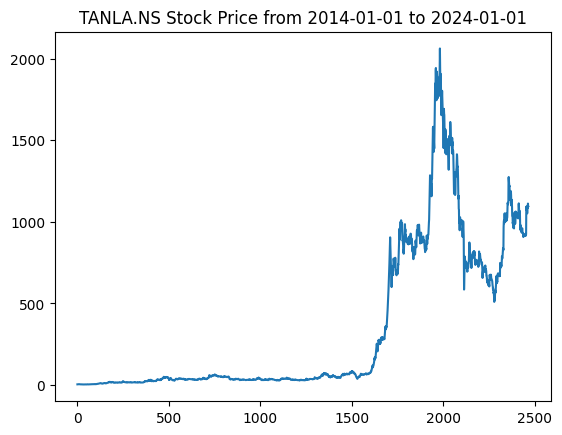

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0374, Validation Loss: 0.0668
Epoch [2/33], Loss: 0.0706, Validation Loss: 0.1523
Epoch [3/33], Loss: 0.0582, Validation Loss: 0.1687
Epoch [4/33], Loss: 0.0510, Validation Loss: 0.1594
Epoch [5/33], Loss: 0.0490, Validation Loss: 0.1529
Epoch [6/33], Loss: 0.0337, Validation Loss: 0.0570
Epoch [7/33], Loss: 0.2078, Validation Loss: 0.1134
Epoch [8/33], Loss: 0.0496, Validation Loss: 0.2116
Epoch [9/33], Loss: 0.0651, Validation Loss: 0.2112
Epoch [10/33], Loss: 0.0505, Validation Loss: 0.1905
Epoch [11/33], Loss: 0.0500, Validation Loss: 0.1773
Epoch [12/33], Loss: 0.0445, Validation Loss: 0.1480
Epoch [13/33], Loss: 0.0231, Validation Loss: 0.0158
Epoch [14/33], Loss: 0.0201, Validation Loss: 0.0496
Epoch [15/33], Loss: 0.0056, Validation Loss: 0.0071
Epoch [16/33], Loss: 0.0082, Validation Loss: 0.0041
Epoch [17/33], Loss: 0.0133, Validation Loss: 0.0111
Epoch [18/33], Loss: 0.0123, Validation Loss: 0.0160
Epoch [19/33], Loss: 0.0059, Validation Loss: 0.0112
Ep

[*********************100%***********************]  1 of 1 completed


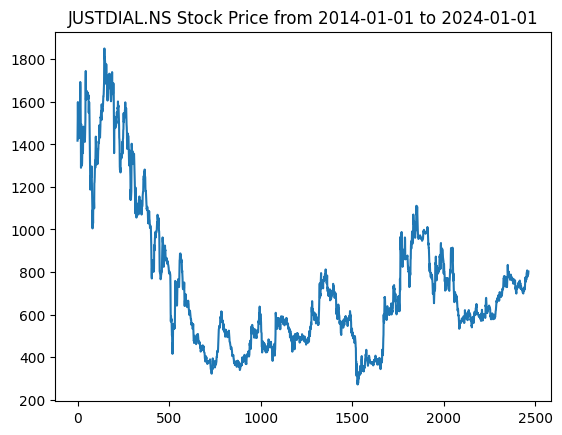

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.1193, Validation Loss: 0.0167
Epoch [2/33], Loss: 0.0831, Validation Loss: 0.0077
Epoch [3/33], Loss: 0.0696, Validation Loss: 0.0075
Epoch [4/33], Loss: 0.0365, Validation Loss: 0.0012
Epoch [5/33], Loss: 0.0075, Validation Loss: 0.0008
Epoch [6/33], Loss: 0.0075, Validation Loss: 0.0006
Epoch [7/33], Loss: 0.0059, Validation Loss: 0.0006
Epoch [8/33], Loss: 0.0059, Validation Loss: 0.0006
Epoch [9/33], Loss: 0.0052, Validation Loss: 0.0005
Epoch [10/33], Loss: 0.0051, Validation Loss: 0.0004
Epoch [11/33], Loss: 0.0041, Validation Loss: 0.0004
Epoch [12/33], Loss: 0.0039, Validation Loss: 0.0004
Epoch [13/33], Loss: 0.0055, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0052, Validation Loss: 0.0006
Epoch [15/33], Loss: 0.0049, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0048, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0036, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0037, Validation Loss: 0.0004
Epoch [19/33], Loss: 0.0048, Validation Loss: 0.0005
Ep

[*********************100%***********************]  1 of 1 completed

Epoch [33/33], Loss: 0.0033, Validation Loss: 0.0004


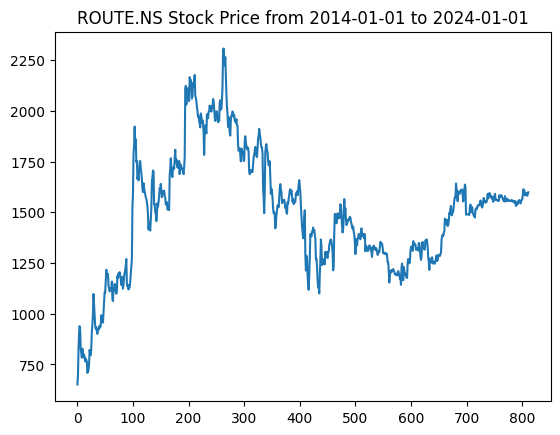

Epoch [1/33], Loss: 0.1816, Validation Loss: 0.0007
Epoch [2/33], Loss: 0.0439, Validation Loss: 0.0002
Epoch [3/33], Loss: 0.0393, Validation Loss: 0.0004
Epoch [4/33], Loss: 0.0354, Validation Loss: 0.0002
Epoch [5/33], Loss: 0.0328, Validation Loss: 0.0004
Epoch [6/33], Loss: 0.0283, Validation Loss: 0.0003
Epoch [7/33], Loss: 0.0249, Validation Loss: 0.0005
Epoch [8/33], Loss: 0.0129, Validation Loss: 0.0009
Epoch [9/33], Loss: 0.0337, Validation Loss: 0.0212
Epoch [10/33], Loss: 0.0356, Validation Loss: 0.0093
Epoch [11/33], Loss: 0.0138, Validation Loss: 0.0013
Epoch [12/33], Loss: 0.0171, Validation Loss: 0.0059
Epoch [13/33], Loss: 0.0052, Validation Loss: 0.0046
Epoch [14/33], Loss: 0.0046, Validation Loss: 0.0009
Epoch [15/33], Loss: 0.0040, Validation Loss: 0.0025
Epoch [16/33], Loss: 0.0057, Validation Loss: 0.0013
Epoch [17/33], Loss: 0.0041, Validation Loss: 0.0015
Epoch [18/33], Loss: 0.0035, Validation Loss: 0.0011
Epoch [19/33], Loss: 0.0043, Validation Loss: 0.0006
Ep

[*********************100%***********************]  1 of 1 completed


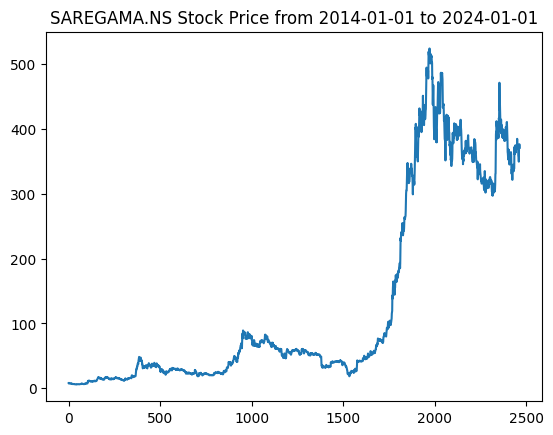

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0554, Validation Loss: 0.3298
Epoch [2/33], Loss: 0.0639, Validation Loss: 0.3356
Epoch [3/33], Loss: 0.0616, Validation Loss: 0.3243
Epoch [4/33], Loss: 0.0507, Validation Loss: 0.2188
Epoch [5/33], Loss: 0.0924, Validation Loss: 0.1477
Epoch [6/33], Loss: 0.0580, Validation Loss: 0.3957
Epoch [7/33], Loss: 0.0467, Validation Loss: 0.2975
Epoch [8/33], Loss: 0.0193, Validation Loss: 0.0153
Epoch [9/33], Loss: 0.0819, Validation Loss: 0.0181
Epoch [10/33], Loss: 0.0569, Validation Loss: 0.3682
Epoch [11/33], Loss: 0.0567, Validation Loss: 0.3420
Epoch [12/33], Loss: 0.0487, Validation Loss: 0.2890
Epoch [13/33], Loss: 0.0313, Validation Loss: 0.1533
Epoch [14/33], Loss: 0.0077, Validation Loss: 0.0014
Epoch [15/33], Loss: 0.0105, Validation Loss: 0.0106
Epoch [16/33], Loss: 0.0191, Validation Loss: 0.0992
Epoch [17/33], Loss: 0.0075, Validation Loss: 0.0029
Epoch [18/33], Loss: 0.0043, Validation Loss: 0.0121
Epoch [19/33], Loss: 0.0038, Validation Loss: 0.0068
Ep

[*********************100%***********************]  1 of 1 completed


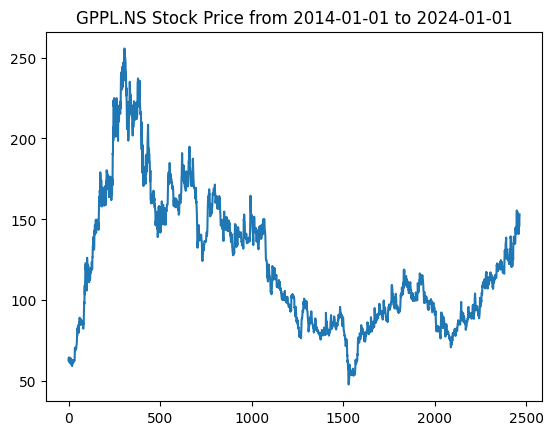

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0765, Validation Loss: 0.0019
Epoch [2/33], Loss: 0.0930, Validation Loss: 0.0025
Epoch [3/33], Loss: 0.0776, Validation Loss: 0.0094
Epoch [4/33], Loss: 0.0570, Validation Loss: 0.0006
Epoch [5/33], Loss: 0.0461, Validation Loss: 0.0033
Epoch [6/33], Loss: 0.0288, Validation Loss: 0.0009
Epoch [7/33], Loss: 0.0155, Validation Loss: 0.0024
Epoch [8/33], Loss: 0.0113, Validation Loss: 0.0008
Epoch [9/33], Loss: 0.0058, Validation Loss: 0.0008
Epoch [10/33], Loss: 0.0046, Validation Loss: 0.0016
Epoch [11/33], Loss: 0.0051, Validation Loss: 0.0021
Epoch [12/33], Loss: 0.0035, Validation Loss: 0.0003
Epoch [13/33], Loss: 0.0023, Validation Loss: 0.0006
Epoch [14/33], Loss: 0.0031, Validation Loss: 0.0002
Epoch [15/33], Loss: 0.0034, Validation Loss: 0.0004
Epoch [16/33], Loss: 0.0039, Validation Loss: 0.0004
Epoch [17/33], Loss: 0.0042, Validation Loss: 0.0004
Epoch [18/33], Loss: 0.0048, Validation Loss: 0.0005
Epoch [19/33], Loss: 0.0050, Validation Loss: 0.0008
Ep

[*********************100%***********************]  1 of 1 completed


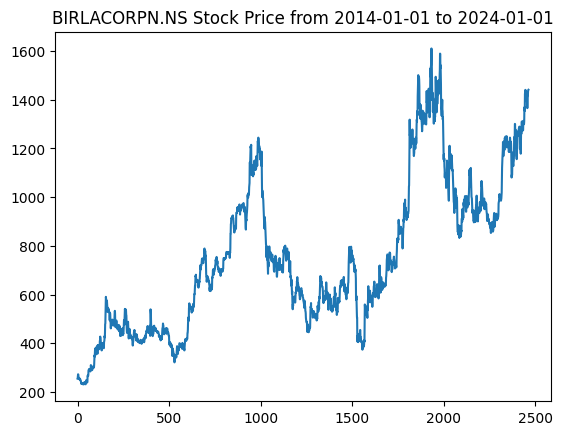

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0682, Validation Loss: 0.0690
Epoch [2/33], Loss: 0.0386, Validation Loss: 0.0029
Epoch [3/33], Loss: 0.0319, Validation Loss: 0.0299
Epoch [4/33], Loss: 0.0118, Validation Loss: 0.0026
Epoch [5/33], Loss: 0.0121, Validation Loss: 0.0011
Epoch [6/33], Loss: 0.0133, Validation Loss: 0.0008
Epoch [7/33], Loss: 0.0081, Validation Loss: 0.0014
Epoch [8/33], Loss: 0.0040, Validation Loss: 0.0013
Epoch [9/33], Loss: 0.0092, Validation Loss: 0.0015
Epoch [10/33], Loss: 0.0083, Validation Loss: 0.0027
Epoch [11/33], Loss: 0.0049, Validation Loss: 0.0010
Epoch [12/33], Loss: 0.0037, Validation Loss: 0.0009
Epoch [13/33], Loss: 0.0026, Validation Loss: 0.0022
Epoch [14/33], Loss: 0.0028, Validation Loss: 0.0017
Epoch [15/33], Loss: 0.0021, Validation Loss: 0.0007
Epoch [16/33], Loss: 0.0021, Validation Loss: 0.0008
Epoch [17/33], Loss: 0.0026, Validation Loss: 0.0007
Epoch [18/33], Loss: 0.0029, Validation Loss: 0.0007
Epoch [19/33], Loss: 0.0017, Validation Loss: 0.0014
Ep

[*********************100%***********************]  1 of 1 completed


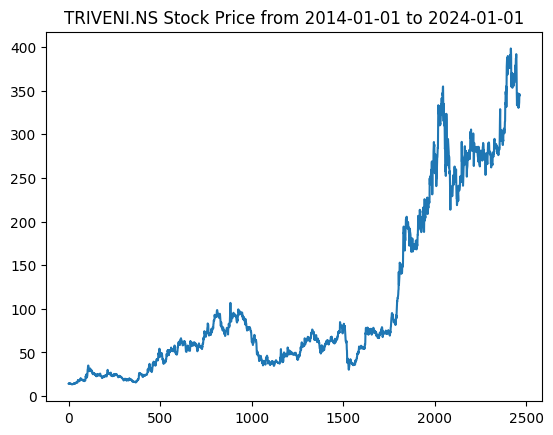

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0219, Validation Loss: 0.2962
Epoch [2/33], Loss: 0.0201, Validation Loss: 0.2713
Epoch [3/33], Loss: 0.0203, Validation Loss: 0.2596
Epoch [4/33], Loss: 0.0156, Validation Loss: 0.1160
Epoch [5/33], Loss: 0.0093, Validation Loss: 0.1835
Epoch [6/33], Loss: 0.0558, Validation Loss: 0.1279
Epoch [7/33], Loss: 0.0112, Validation Loss: 0.0408
Epoch [8/33], Loss: 0.0069, Validation Loss: 0.0111
Epoch [9/33], Loss: 0.0038, Validation Loss: 0.0146
Epoch [10/33], Loss: 0.0079, Validation Loss: 0.1099
Epoch [11/33], Loss: 0.0029, Validation Loss: 0.0150
Epoch [12/33], Loss: 0.0023, Validation Loss: 0.0471
Epoch [13/33], Loss: 0.0024, Validation Loss: 0.0135
Epoch [14/33], Loss: 0.0045, Validation Loss: 0.0683
Epoch [15/33], Loss: 0.0022, Validation Loss: 0.0135
Epoch [16/33], Loss: 0.0012, Validation Loss: 0.0330
Epoch [17/33], Loss: 0.0013, Validation Loss: 0.0144
Epoch [18/33], Loss: 0.0008, Validation Loss: 0.0263
Epoch [19/33], Loss: 0.0009, Validation Loss: 0.0219
Ep

[*********************100%***********************]  1 of 1 completed


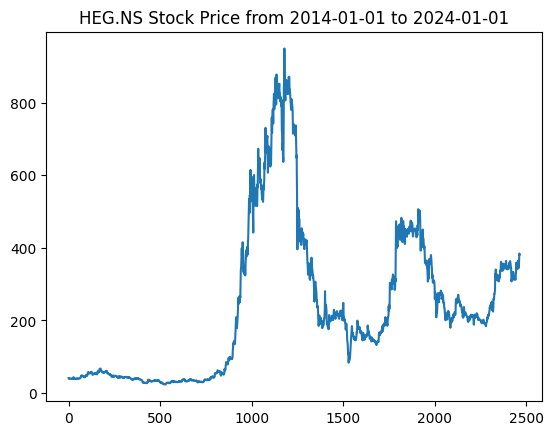

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0824, Validation Loss: 0.0053
Epoch [2/33], Loss: 0.0924, Validation Loss: 0.0018
Epoch [3/33], Loss: 0.0655, Validation Loss: 0.0054
Epoch [4/33], Loss: 0.0481, Validation Loss: 0.0051
Epoch [5/33], Loss: 0.0219, Validation Loss: 0.0075
Epoch [6/33], Loss: 0.0166, Validation Loss: 0.0008
Epoch [7/33], Loss: 0.0029, Validation Loss: 0.0002
Epoch [8/33], Loss: 0.0043, Validation Loss: 0.0003
Epoch [9/33], Loss: 0.0023, Validation Loss: 0.0002
Epoch [10/33], Loss: 0.0042, Validation Loss: 0.0001
Epoch [11/33], Loss: 0.0021, Validation Loss: 0.0002
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0001
Epoch [13/33], Loss: 0.0018, Validation Loss: 0.0001
Epoch [14/33], Loss: 0.0018, Validation Loss: 0.0001
Epoch [15/33], Loss: 0.0017, Validation Loss: 0.0001
Epoch [16/33], Loss: 0.0018, Validation Loss: 0.0001
Epoch [17/33], Loss: 0.0017, Validation Loss: 0.0002
Epoch [18/33], Loss: 0.0020, Validation Loss: 0.0003
Epoch [19/33], Loss: 0.0016, Validation Loss: 0.0002
Ep

[*********************100%***********************]  1 of 1 completed


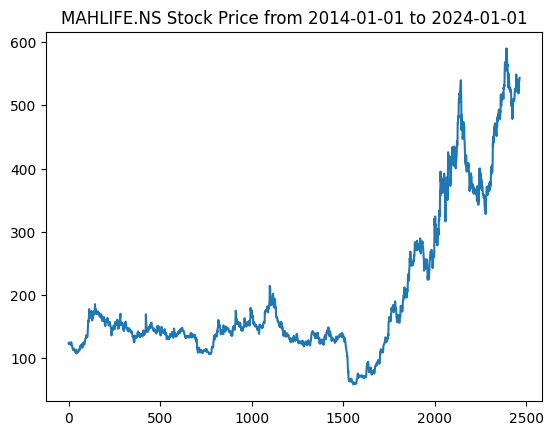

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0121, Validation Loss: 0.2555
Epoch [2/33], Loss: 0.0093, Validation Loss: 0.2769
Epoch [3/33], Loss: 0.0090, Validation Loss: 0.2774
Epoch [4/33], Loss: 0.0088, Validation Loss: 0.2685
Epoch [5/33], Loss: 0.0081, Validation Loss: 0.2623
Epoch [6/33], Loss: 0.0076, Validation Loss: 0.2432
Epoch [7/33], Loss: 0.0070, Validation Loss: 0.2036
Epoch [8/33], Loss: 0.0065, Validation Loss: 0.1814
Epoch [9/33], Loss: 0.0035, Validation Loss: 0.0517
Epoch [10/33], Loss: 0.0033, Validation Loss: 0.0129
Epoch [11/33], Loss: 0.0016, Validation Loss: 0.0243
Epoch [12/33], Loss: 0.0024, Validation Loss: 0.0323
Epoch [13/33], Loss: 0.0066, Validation Loss: 0.1920
Epoch [14/33], Loss: 0.0036, Validation Loss: 0.0776
Epoch [15/33], Loss: 0.0010, Validation Loss: 0.0015
Epoch [16/33], Loss: 0.0005, Validation Loss: 0.0025
Epoch [17/33], Loss: 0.0006, Validation Loss: 0.0050
Epoch [18/33], Loss: 0.0006, Validation Loss: 0.0018
Epoch [19/33], Loss: 0.0004, Validation Loss: 0.0011
Ep

[*********************100%***********************]  1 of 1 completed


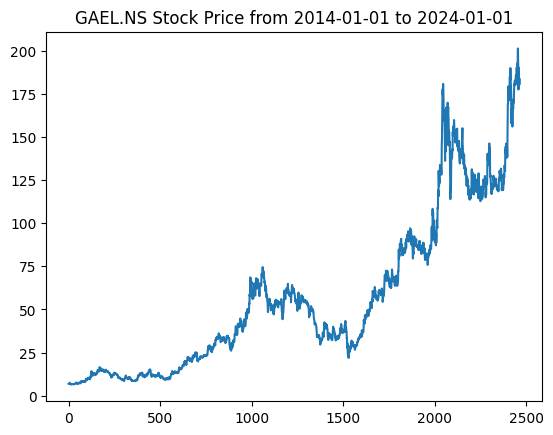

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/33], Loss: 0.0160, Validation Loss: 0.2453
Epoch [2/33], Loss: 0.0234, Validation Loss: 0.2328
Epoch [3/33], Loss: 0.0231, Validation Loss: 0.2277
Epoch [4/33], Loss: 0.0210, Validation Loss: 0.1981
Epoch [5/33], Loss: 0.0141, Validation Loss: 0.0087
Epoch [6/33], Loss: 0.0131, Validation Loss: 0.0404
Epoch [7/33], Loss: 0.0218, Validation Loss: 0.1867
Epoch [8/33], Loss: 0.0051, Validation Loss: 0.0322
Epoch [9/33], Loss: 0.0037, Validation Loss: 0.0048
Epoch [10/33], Loss: 0.0010, Validation Loss: 0.0079
Epoch [11/33], Loss: 0.0011, Validation Loss: 0.0043
Epoch [12/33], Loss: 0.0005, Validation Loss: 0.0058
Epoch [13/33], Loss: 0.0005, Validation Loss: 0.0053
Epoch [14/33], Loss: 0.0004, Validation Loss: 0.0049
Epoch [15/33], Loss: 0.0006, Validation Loss: 0.0035
Epoch [16/33], Loss: 0.0008, Validation Loss: 0.0070
Epoch [17/33], Loss: 0.0009, Validation Loss: 0.0096
Epoch [18/33], Loss: 0.0010, Validation Loss: 0.0035
Epoch [19/33], Loss: 0.0013, Validation Loss: 0.0052
Ep

In [11]:
class EnhancedLSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, output_size=1, num_layers=4, dropout=0.3):
        super(EnhancedLSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout2 = nn.Dropout(dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout3 = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        out, _ = self.lstm2(out)
        out = self.dropout2(out)
        out, _ = self.lstm3(out)
        out = self.dropout3(out)
        out = self.fc(out[:, -1, :])
        return out

# Plotting function for actual vs predicted prices
def plot_predictions(scaler, data, predictions, dataset_type, company):
    data = scaler.inverse_transform(data)  # Inverse transform to original scale
    plt.figure(figsize=(10, 6))
    plt.plot(data, label="Actual Prices")
    plt.plot(np.arange(len(data) - len(predictions), len(data)), predictions, label="Predicted Prices")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"{company} {dataset_type} Data: Actual vs Predicted Stock Prices")
    plt.legend()
    plt.show()

# Processing each company array
for companies, results, results_name in zip(
    [companies_1, companies_2, companies_3],
    [results_1, results_2, results_3],
    ['results_1', 'results_2', 'results_3']
):
    for company in companies:
        # Fetch data
        df = yf.download(company, start=begin_date, end=end_date)
        df = df[['Close']].reset_index(drop=True)

        # Plot stock price
        plt.plot(df['Close'])
        plt.title(f'{company} Stock Price from {begin_date} to {end_date}')
        plt.show()

        # Scale data
        scaler = MinMaxScaler(feature_range=(0, 1))
        df1 = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))

        # Define split sizes
        train_size = int(len(df1) * 0.8)
        validation_size = int(len(df1) * 0.1)
        test_size = int(len(df1) * 0.1)

        # Split data
        train_data = df1[:train_size]
        validation_data = df1[train_size:train_size + validation_size]
        test_data = df1[train_size + validation_size:train_size + validation_size + test_size]

        # Prepare data for model
        time_step = 50
        X_train, y_train = create_dataset(train_data, time_step)
        X_validation, y_validation = create_dataset(validation_data, time_step)
        X_test, y_test = create_dataset(test_data, time_step)

        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Initialize and train model
        model = EnhancedLSTMModel().to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

        X_train_tensor = torch.from_numpy(X_train).float().to(device)
        y_train_tensor = torch.from_numpy(y_train).float().to(device)
        X_validation_tensor = torch.from_numpy(X_validation).float().to(device)
        y_validation_tensor = torch.from_numpy(y_validation).float().to(device)
        X_test_tensor = torch.from_numpy(X_test).float().to(device)
        y_test_tensor = torch.from_numpy(y_test).float().to(device)

        epochs = 33
        batch_size = 64

        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for i in range(0, X_train_tensor.size(0), batch_size):
                X_batch = X_train_tensor[i:i + batch_size]
                y_batch = y_train_tensor[i:i + batch_size]
                outputs = model(X_batch)
                optimizer.zero_grad()
                loss = criterion(outputs.squeeze(), y_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            # Validation loss
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_validation_tensor)
                val_loss = criterion(val_outputs.squeeze(), y_validation_tensor).item()

            avg_loss = total_loss / (X_train_tensor.size(0) / batch_size)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Validation Loss: {val_loss:.4f}')

        # Evaluate model
        model.eval()
        test_predict = model(X_test_tensor).cpu().detach().numpy()
        test_predict = scaler.inverse_transform(test_predict)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate test differences and change percentages
        test_start_price = test_predict[0][0]
        test_end_price = test_predict[-1][0]
        test_difference = test_end_price - test_start_price
        test_change_percent = (test_difference / test_start_price) * 100

        actual_start_price = y_test_actual[0][0]
        actual_end_price = y_test_actual[-1][0]
        actual_difference = actual_end_price - actual_start_price
        actual_change_percent = (actual_difference / actual_start_price) * 100

        weights=0.0
        # Store data in results DataFrame
        new_row = pd.DataFrame([{
            'Company': company,
            'Test Start Price': test_start_price,
            'Test End Price': test_end_price,
            'Test Difference': test_difference,
            'Test Change %': test_change_percent,
            'Actual Start Price': actual_start_price,
            'Actual End Price': actual_end_price,
            'Actual Difference': actual_difference,
            'Actual Change %': actual_change_percent,
            'Weight':weights

        }])
        locals()[results_name] = pd.concat([locals()[results_name], new_row], ignore_index=True)

#Filter results with positive percentage change for test prices

In [12]:
large_cap_increase = results_1[(results_1['Test Change %'] > 0)]
mid_cap_increase = results_2[(results_2['Test Change %'] > 0)]
small_cap_increase = results_3[(results_3['Test Change %'] > 0)]

# Display results for Large, mid and small cap companies after reejcting companies which might probably give losses according to our model

In [13]:
print("Results dataframe for Large Cap Companies:\n", results_1)
print("\n\nResults dataframe for Mid Cap Companies:\n", results_2)
print("\n\nResults dataframe for Small Cap Companies:\n", results_3)

Results dataframe for Large Cap Companies:
           Company  Test Start Price  Test End Price  Test Difference  \
0     RELIANCE.NS        946.522827     1048.915161       102.392334   
1     HDFCBANK.NS       1626.494385     1669.780884        43.286499   
2    ICICIBANK.NS        845.653748      960.262573       114.608826   
3         SBIN.NS        544.318726      619.111877        74.793152   
4          ITC.NS        309.777710      330.226227        20.448517   
5    SUNPHARMA.NS        865.699951     1056.773926       191.073975   
6     AXISBANK.NS        820.378906     1017.195312       196.816406   
7    KOTAKBANK.NS       1805.453003     1923.634399       118.181396   
8       MARUTI.NS       8519.119141     9827.759766      1308.640625   
9   ULTRACEMCO.NS       7286.425781     9474.250977      2187.825195   
10        ONGC.NS        164.138947      222.619629        58.480682   
11       WIPRO.NS        378.873505      437.004120        58.130615   
12  BAJAJ-AUTO.NS   

#List of shortlisted Companies to be considered for buying stocks.

In [14]:
print("\nLarge Cap Companies recommended for buying:", large_cap_increase)
print("\nMid Cap Companies recommended for buying:", mid_cap_increase)
print("\nSmall Cap Companies recommended for buying:", small_cap_increase)


Large Cap Companies recommended for buying:           Company  Test Start Price  Test End Price  Test Difference  \
0     RELIANCE.NS        946.522827     1048.915161       102.392334   
1     HDFCBANK.NS       1626.494385     1669.780884        43.286499   
2    ICICIBANK.NS        845.653748      960.262573       114.608826   
3         SBIN.NS        544.318726      619.111877        74.793152   
4          ITC.NS        309.777710      330.226227        20.448517   
5    SUNPHARMA.NS        865.699951     1056.773926       191.073975   
6     AXISBANK.NS        820.378906     1017.195312       196.816406   
7    KOTAKBANK.NS       1805.453003     1923.634399       118.181396   
8       MARUTI.NS       8519.119141     9827.759766      1308.640625   
9   ULTRACEMCO.NS       7286.425781     9474.250977      2187.825195   
10        ONGC.NS        164.138947      222.619629        58.480682   
11       WIPRO.NS        378.873505      437.004120        58.130615   
12  BAJAJ-AUTO.NS  

#Company and weightage to be bought in the category to which company belongs

In [15]:
sum1,sum2,sum3,j=0.0,0.0,0.0,0.0
for i in range(len(large_cap_increase)):
    sum1=sum1+large_cap_increase.iloc[i, 4]

for i in range(len(mid_cap_increase)):
    sum2=sum2+mid_cap_increase.iloc[i, 4]

for i in range(len(small_cap_increase)):
    sum3=sum3+small_cap_increase.iloc[i, 4]

for i in range(len(large_cap_increase)):
    large_cap_increase.iloc[i,9]=large_cap_increase.iloc[i,4]/sum1*100
    j=j+large_cap_increase.iloc[i,9]

for i in range(len(mid_cap_increase)):
    mid_cap_increase.iloc[i,9]=mid_cap_increase.iloc[i,4]/sum2*100
    j=j+mid_cap_increase.iloc[i,9]

for i in range(len(small_cap_increase)):
    small_cap_increase.iloc[i,9]=small_cap_increase.iloc[i,4]/sum3*100
    j=j+small_cap_increase.iloc[i,9]

print("Company and weightage at which it is to be bought in large cap:\n",large_cap_increase)
print("\n\nCompany and weightage at which it is to be bought in mid cap:\n",mid_cap_increase)
print("\n\nCompany and weightage at which it is to be bought in small cap:\n",small_cap_increase)

Company and weightage at which it is to be bought in large cap:
           Company  Test Start Price  Test End Price  Test Difference  \
0     RELIANCE.NS        946.522827     1048.915161       102.392334   
1     HDFCBANK.NS       1626.494385     1669.780884        43.286499   
2    ICICIBANK.NS        845.653748      960.262573       114.608826   
3         SBIN.NS        544.318726      619.111877        74.793152   
4          ITC.NS        309.777710      330.226227        20.448517   
5    SUNPHARMA.NS        865.699951     1056.773926       191.073975   
6     AXISBANK.NS        820.378906     1017.195312       196.816406   
7    KOTAKBANK.NS       1805.453003     1923.634399       118.181396   
8       MARUTI.NS       8519.119141     9827.759766      1308.640625   
9   ULTRACEMCO.NS       7286.425781     9474.250977      2187.825195   
10        ONGC.NS        164.138947      222.619629        58.480682   
11       WIPRO.NS        378.873505      437.004120        58.130615   

#Profit % achieved when compared with original data.

In [16]:
profit_largecap=0.0
profit_midcap=0.0
profit_smallcap=0.0

for i in range(len(large_cap_increase)):
    profit_largecap=profit_largecap+large_cap_increase.iloc[i,9]*large_cap_increase.iloc[i,8]

for i in range(len(mid_cap_increase)):
    profit_midcap=profit_midcap+mid_cap_increase.iloc[i,9]*mid_cap_increase.iloc[i,8]

for i in range(len(small_cap_increase)):
    profit_smallcap=profit_smallcap+small_cap_increase.iloc[i,9]*small_cap_increase.iloc[i,8]

total_profit=(40*profit_largecap+35*profit_midcap+25*profit_smallcap)/10000

print("Total Profit Percentage: ", total_profit,"% *T&C Applied",sep="")

Total Profit Percentage: 76.04222888984687% *T&C Applied
